# Analysis of PnL

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis

# from ProjectLibrary.pnl_utilities import hitrate, relativepnl, realized_volatility

In [2]:
forecast_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\forecasts_HECLA_(1, 1)_True_5.csv',parse_dates=True,index_col='asofdate')
pnl_df      = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\pnl_armaspreadthreshold_HECLA_(1, 1)_True_5.csv',parse_dates=True,index_col='asofdate')

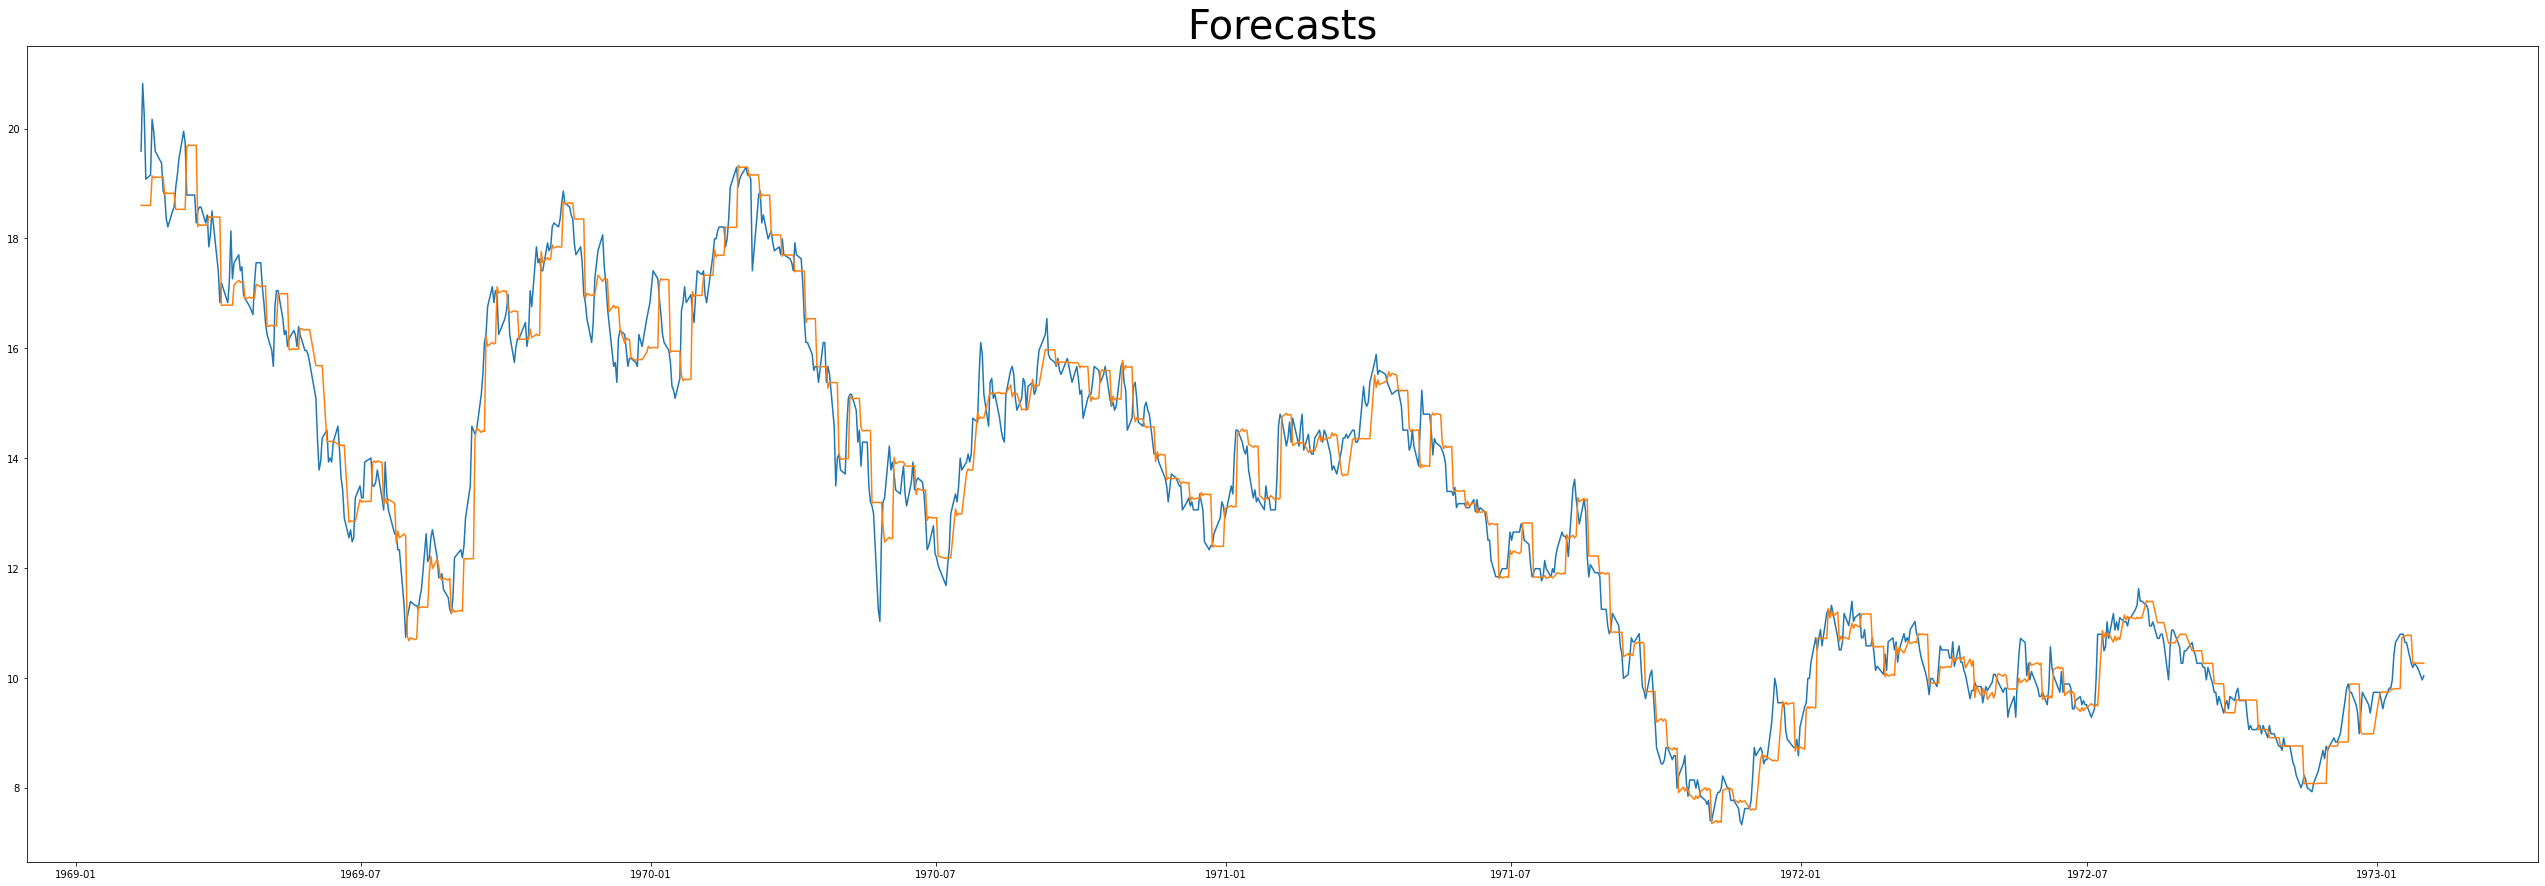

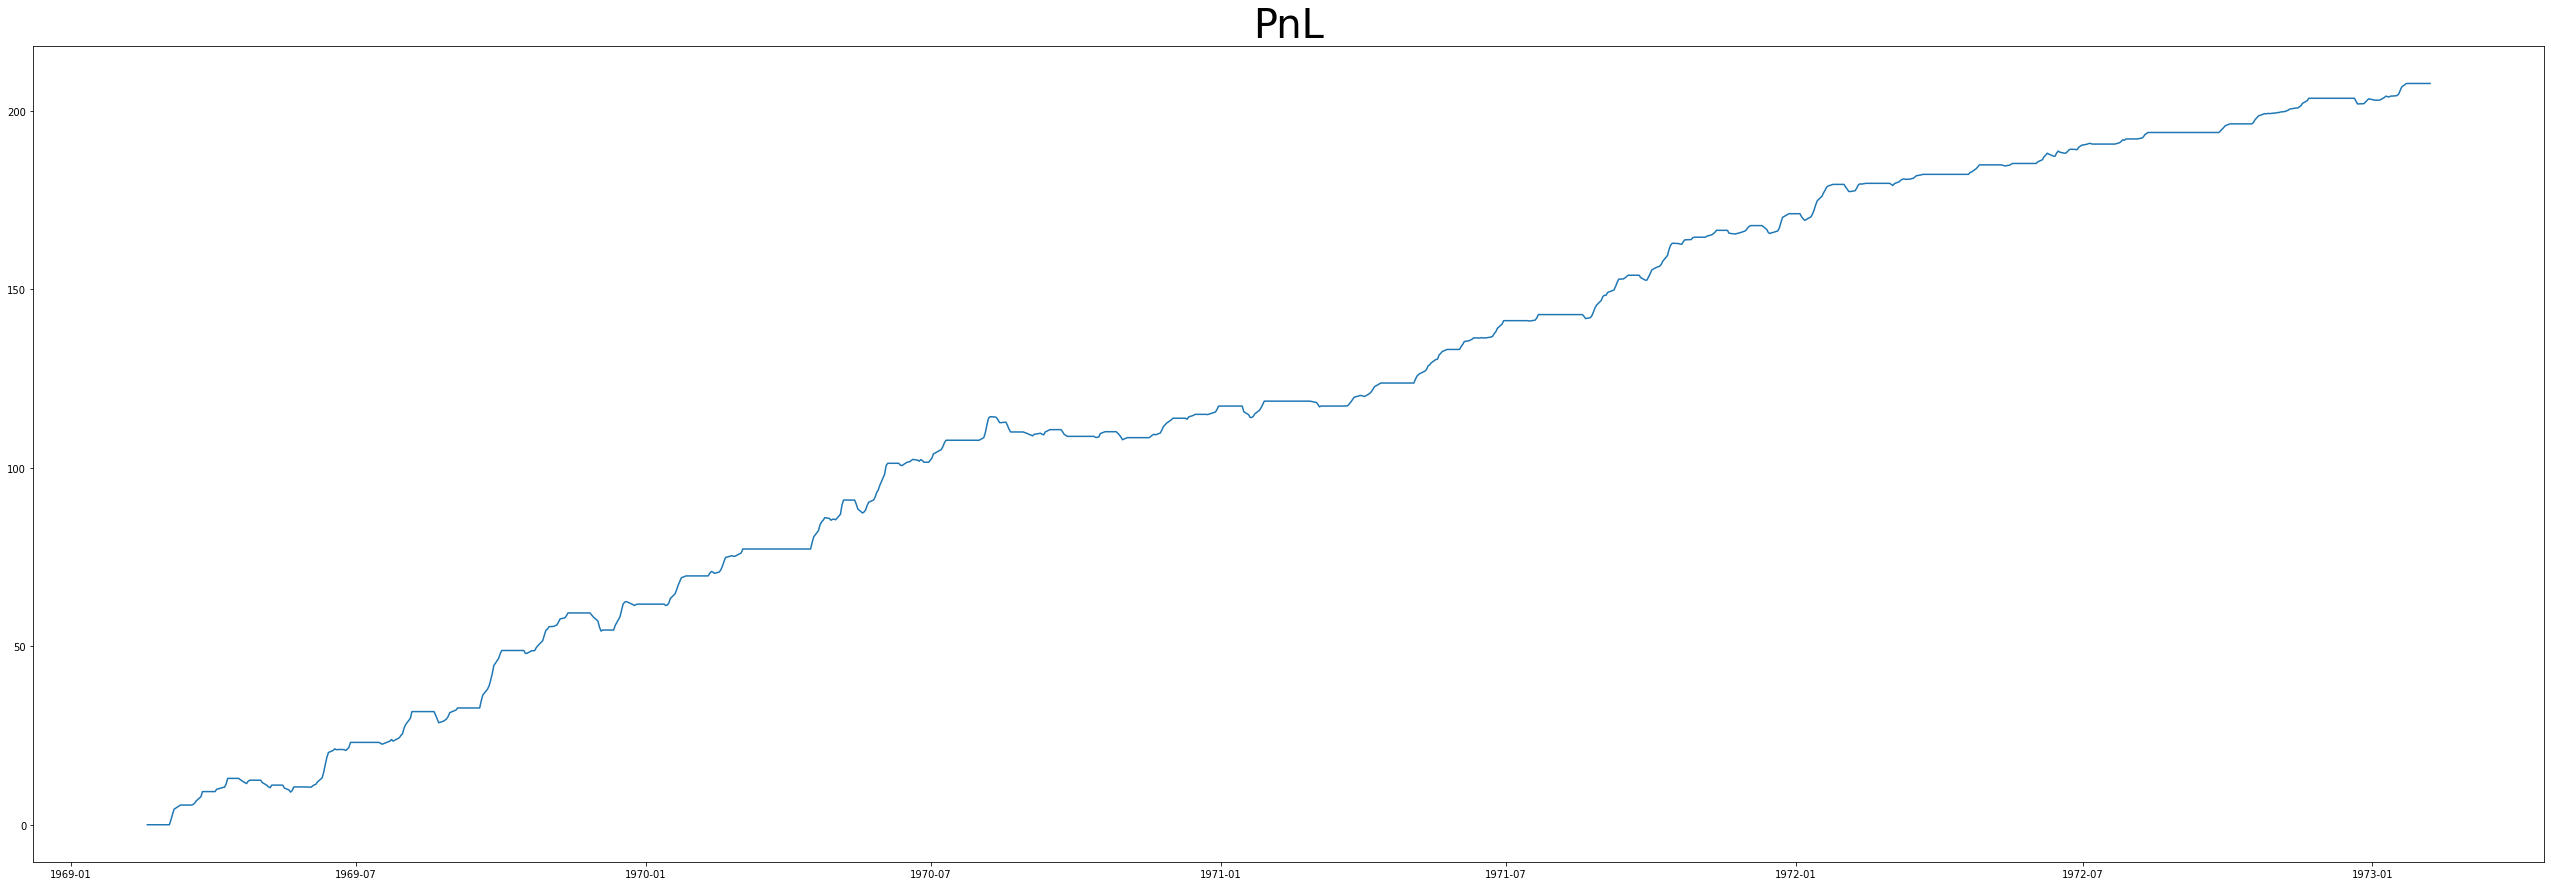

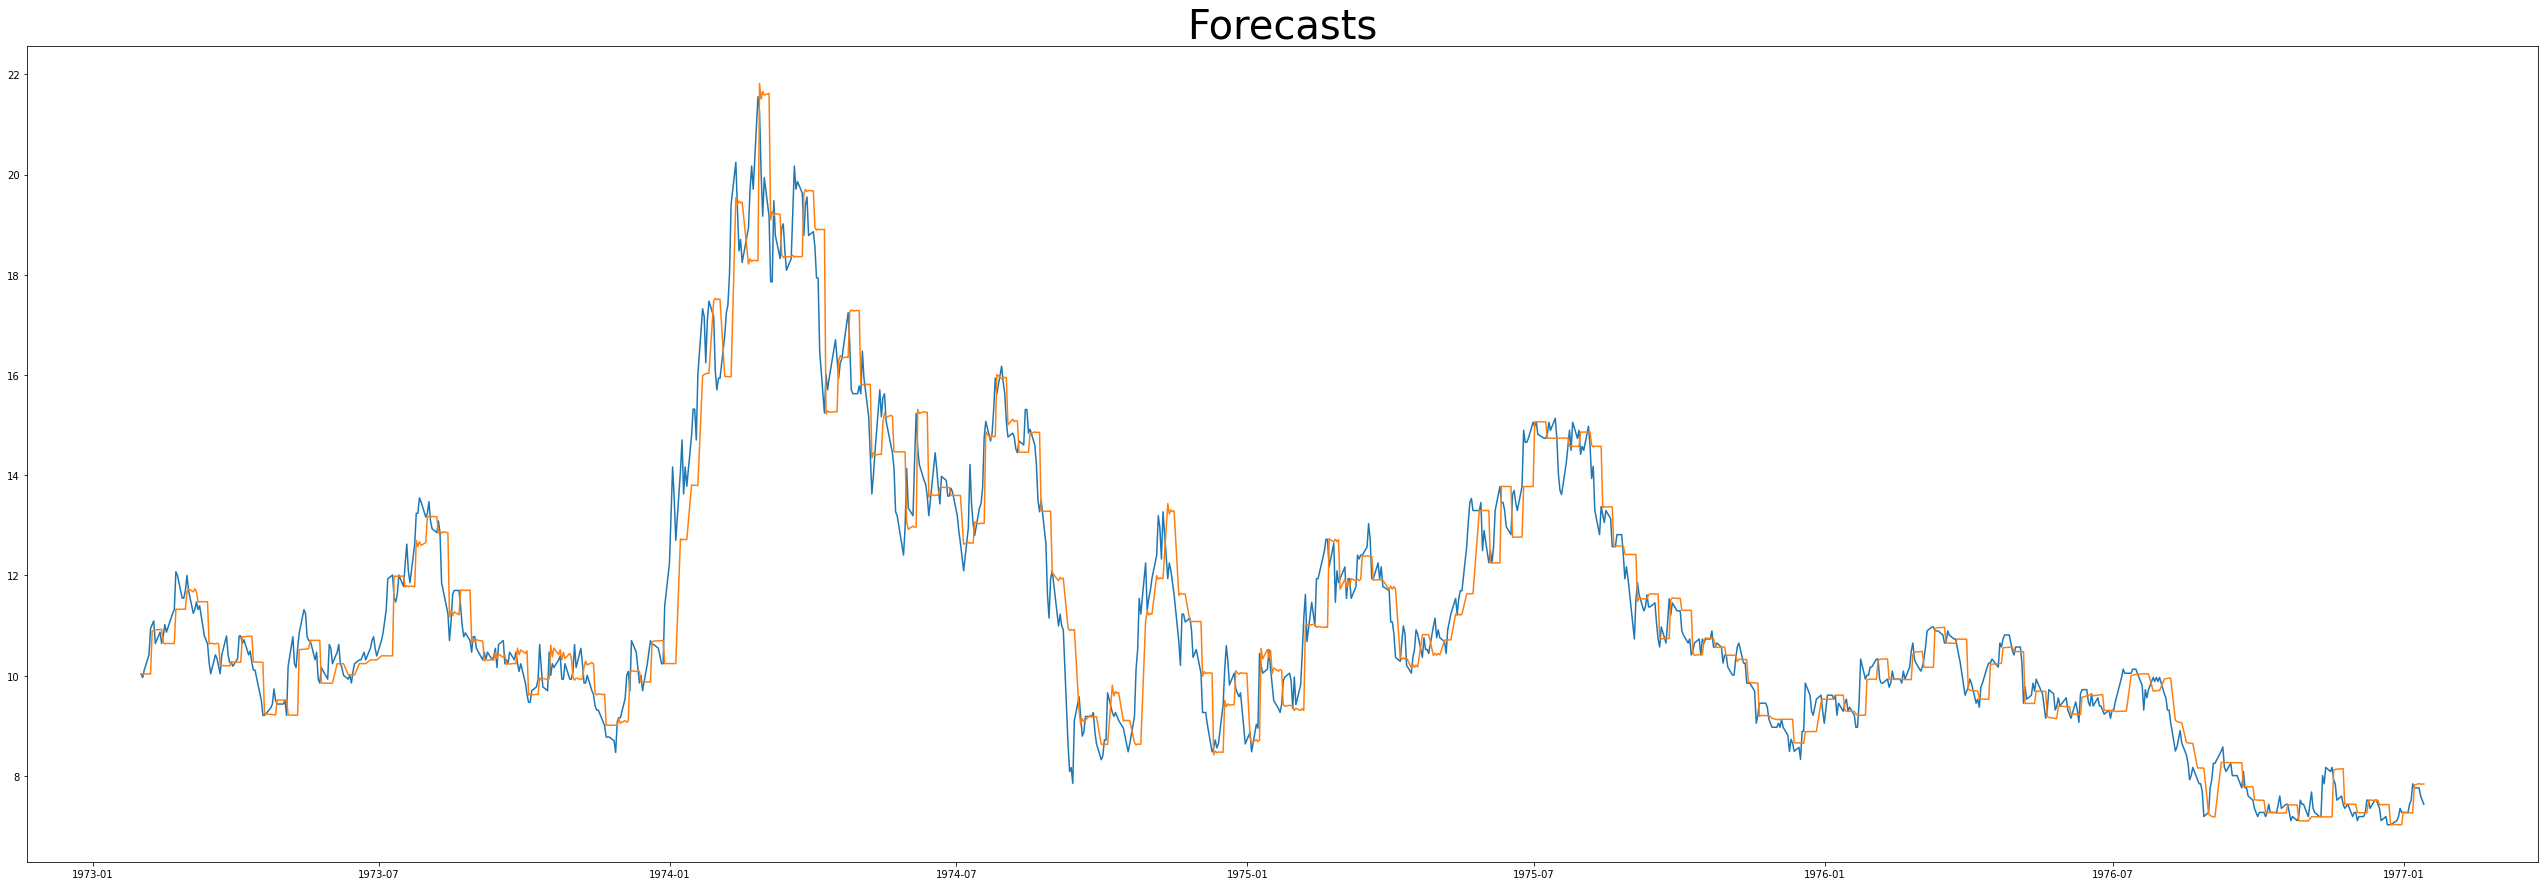

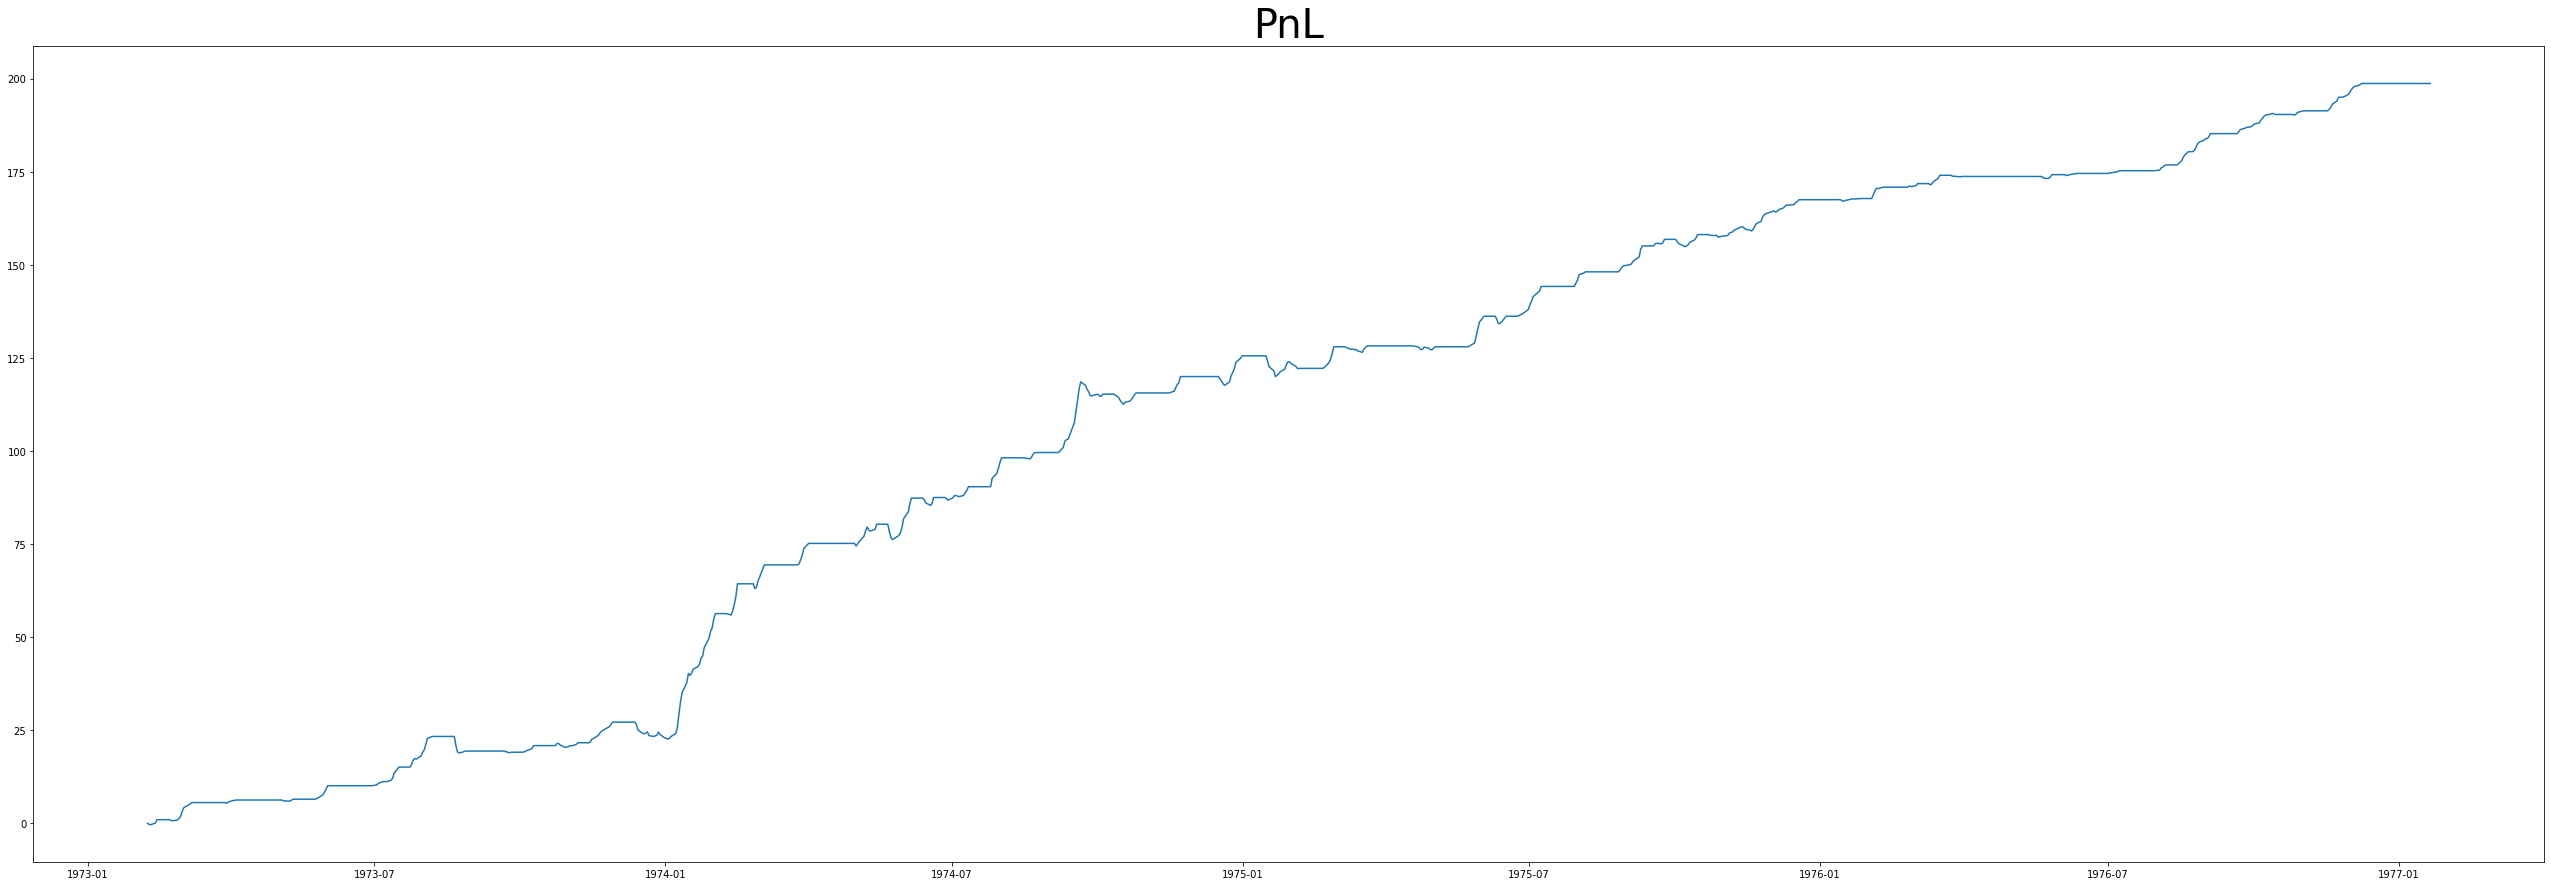

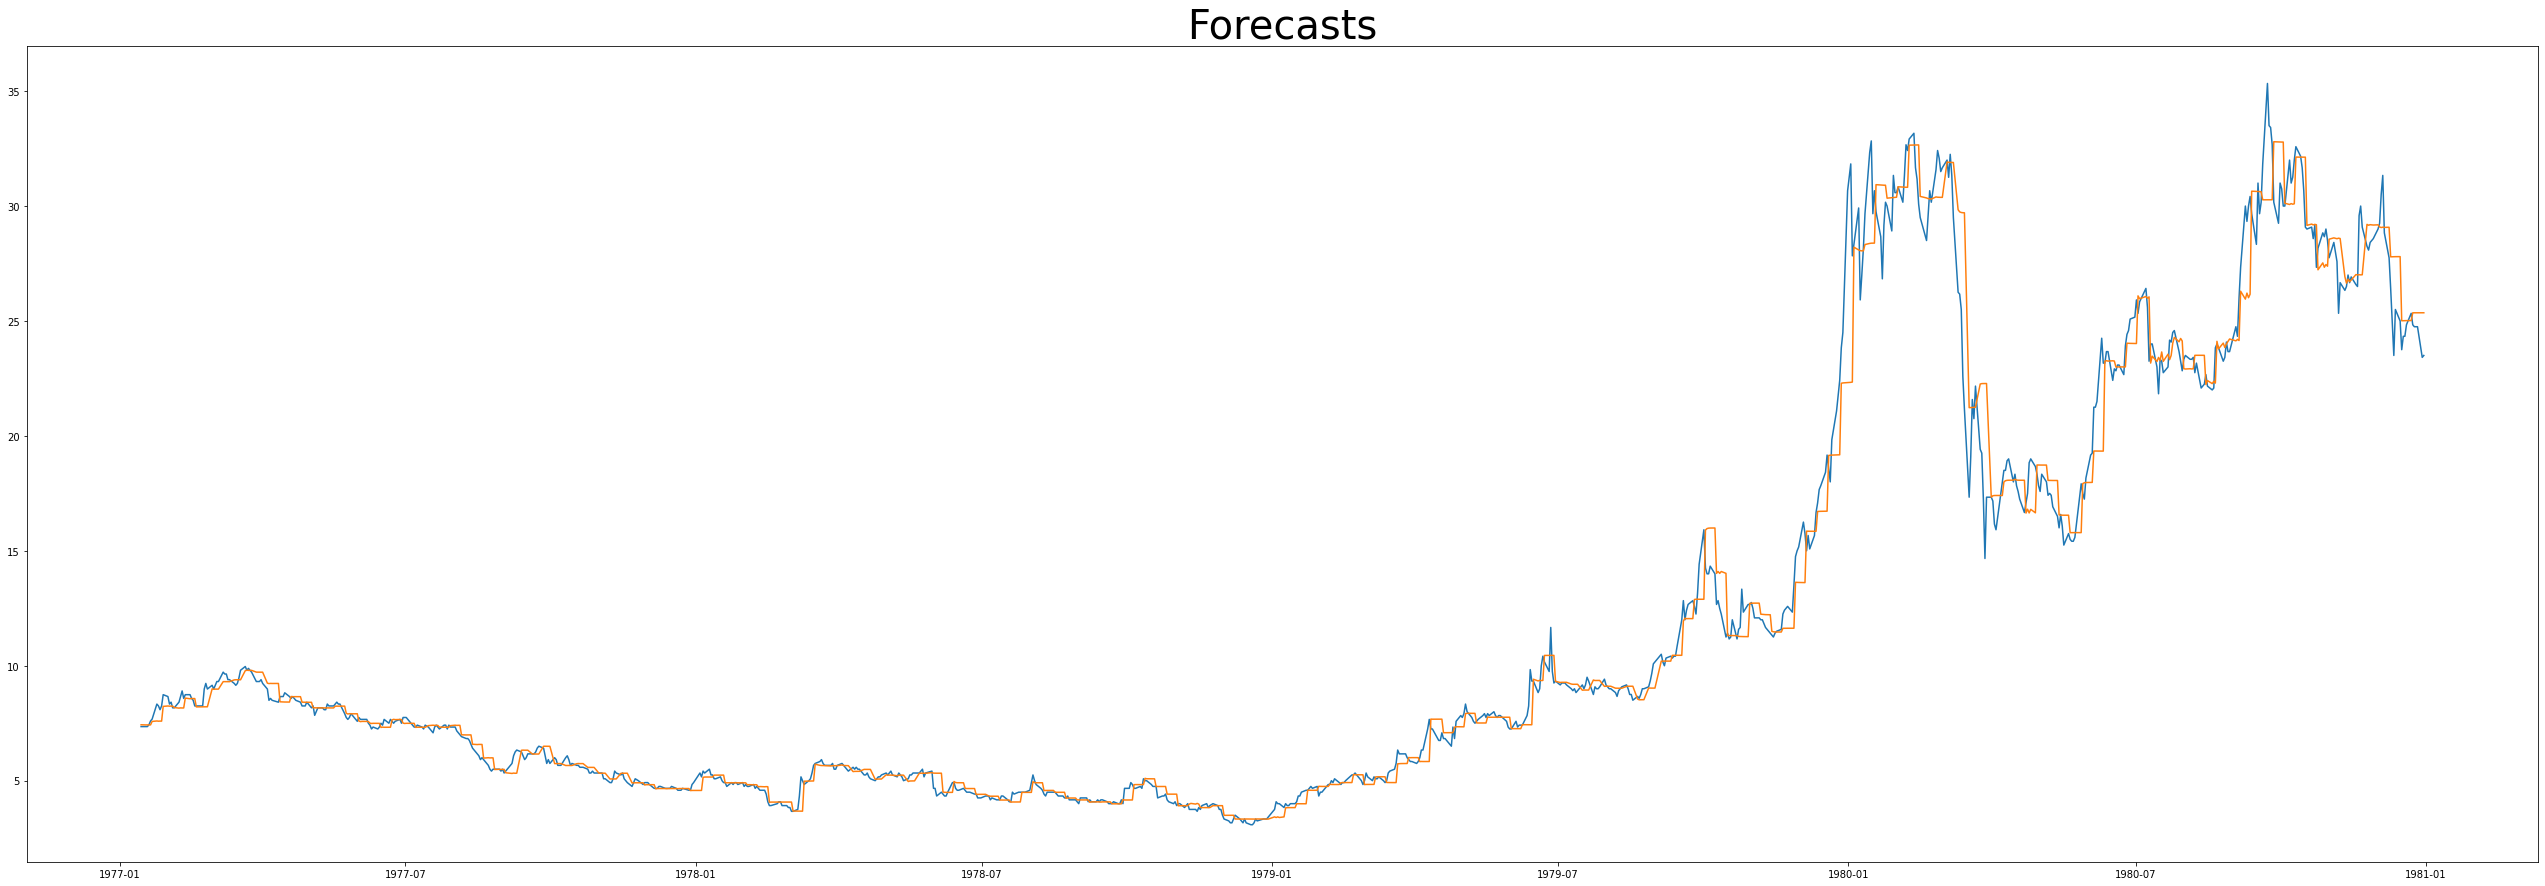

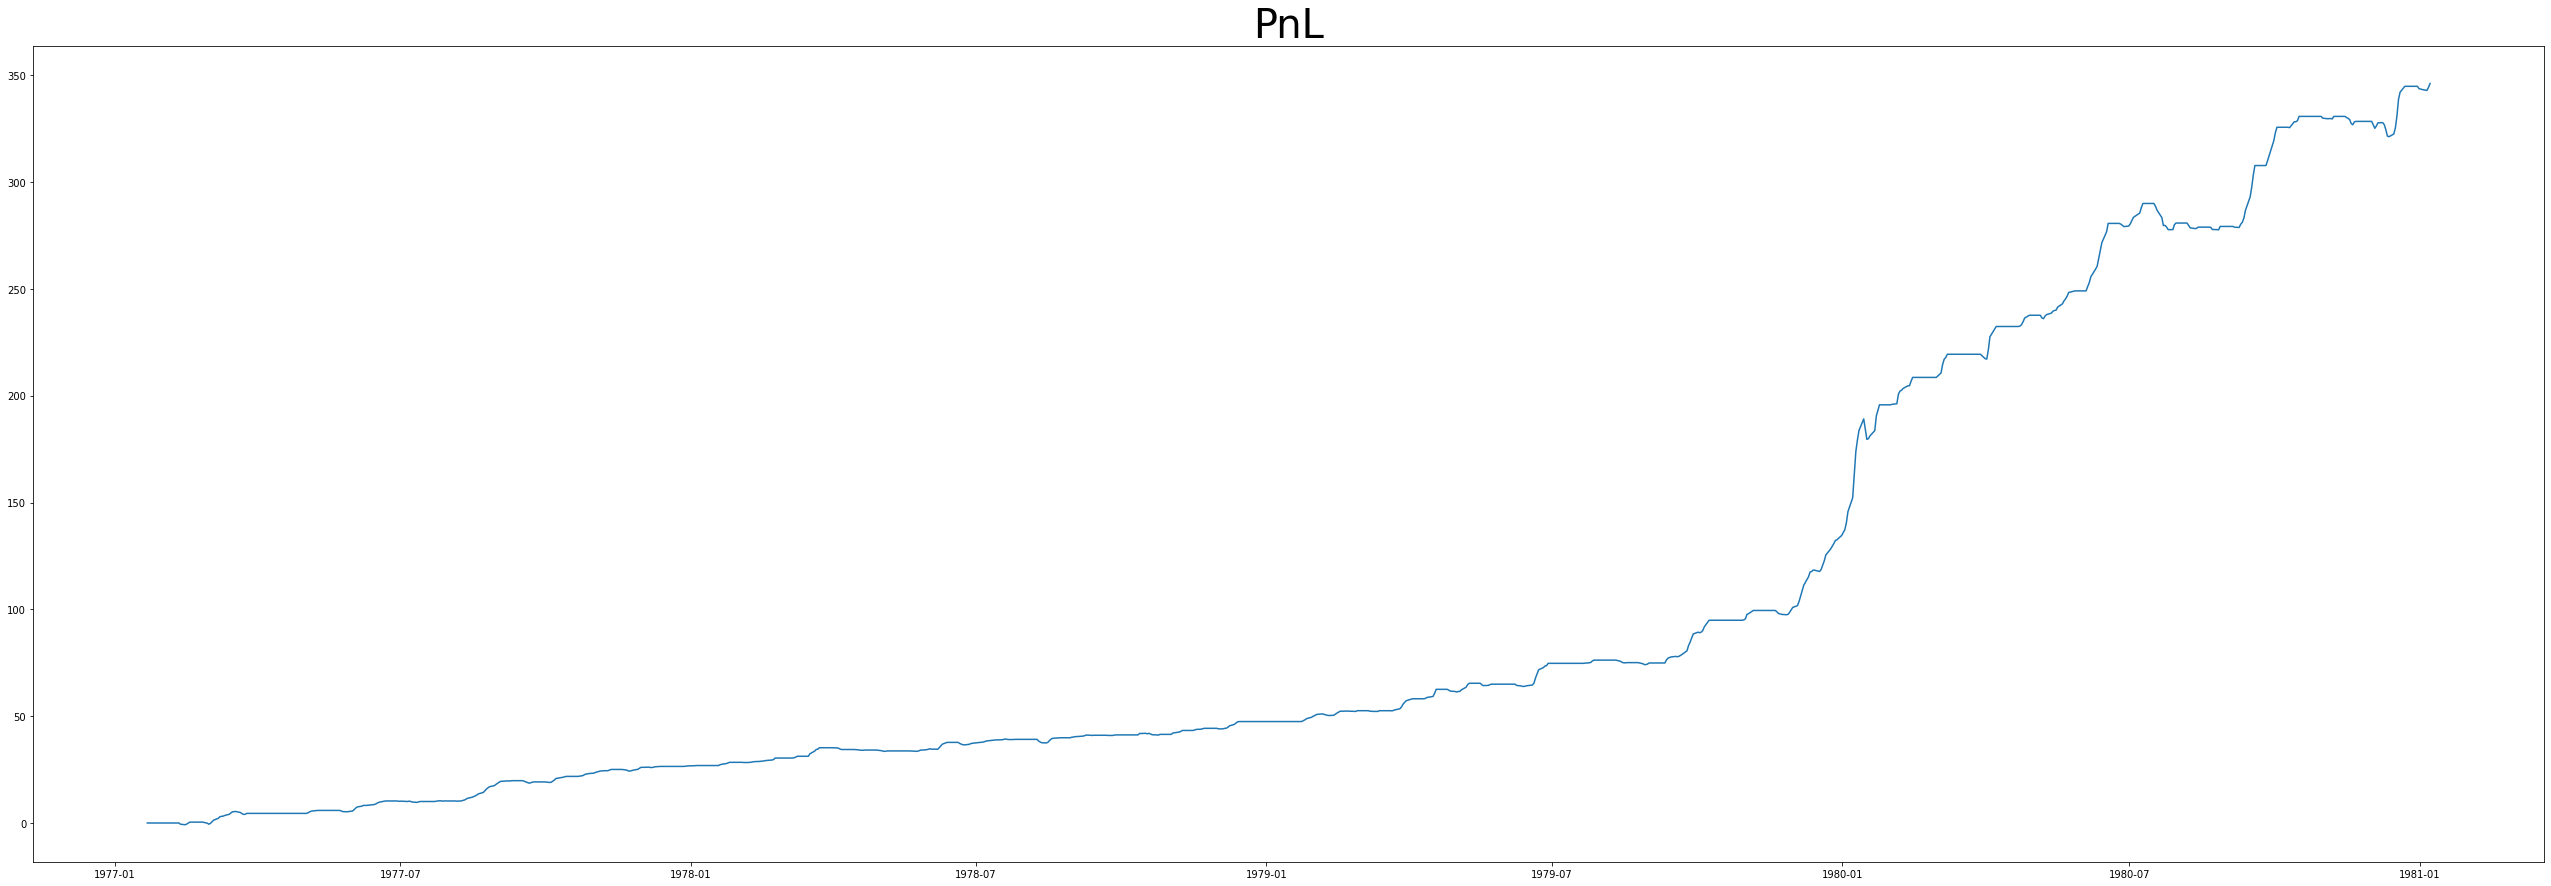

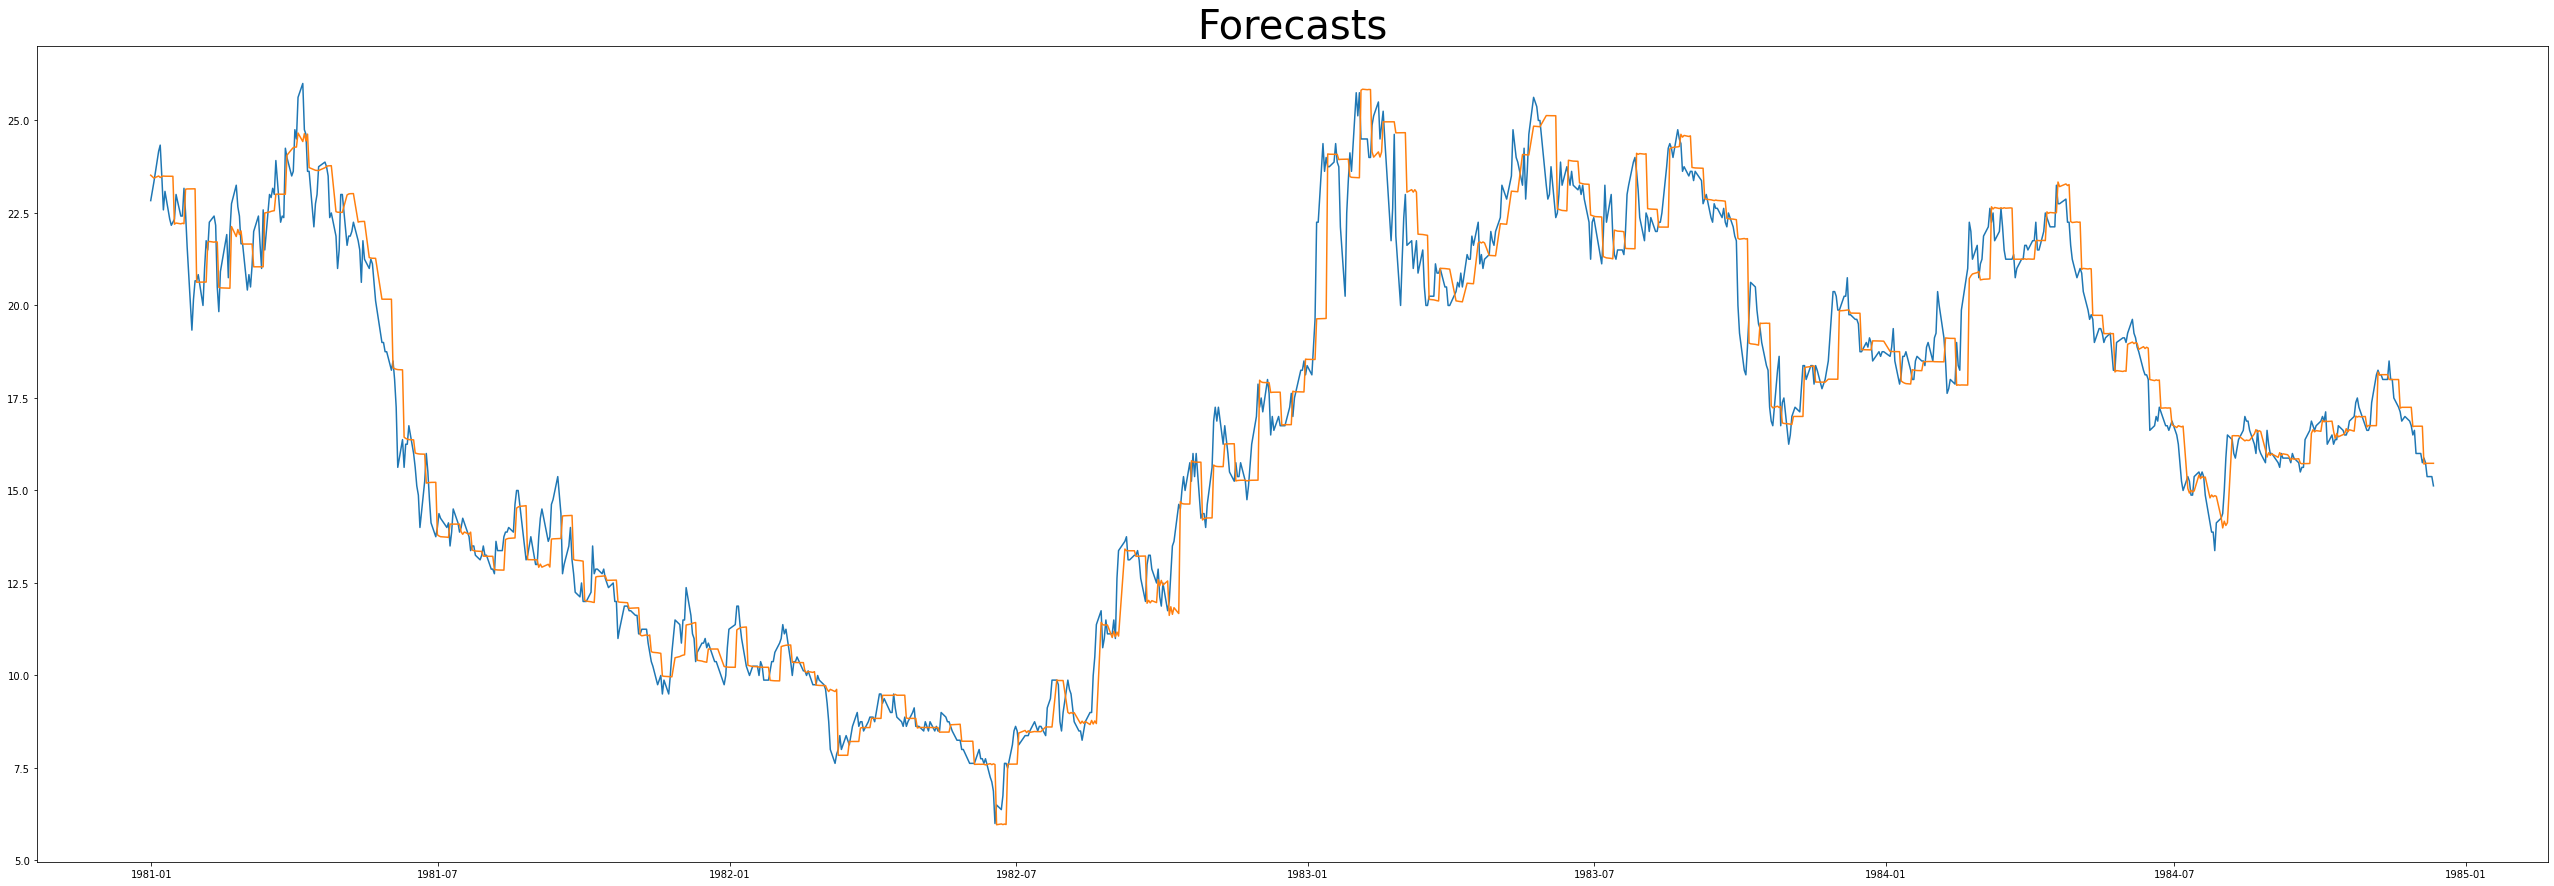

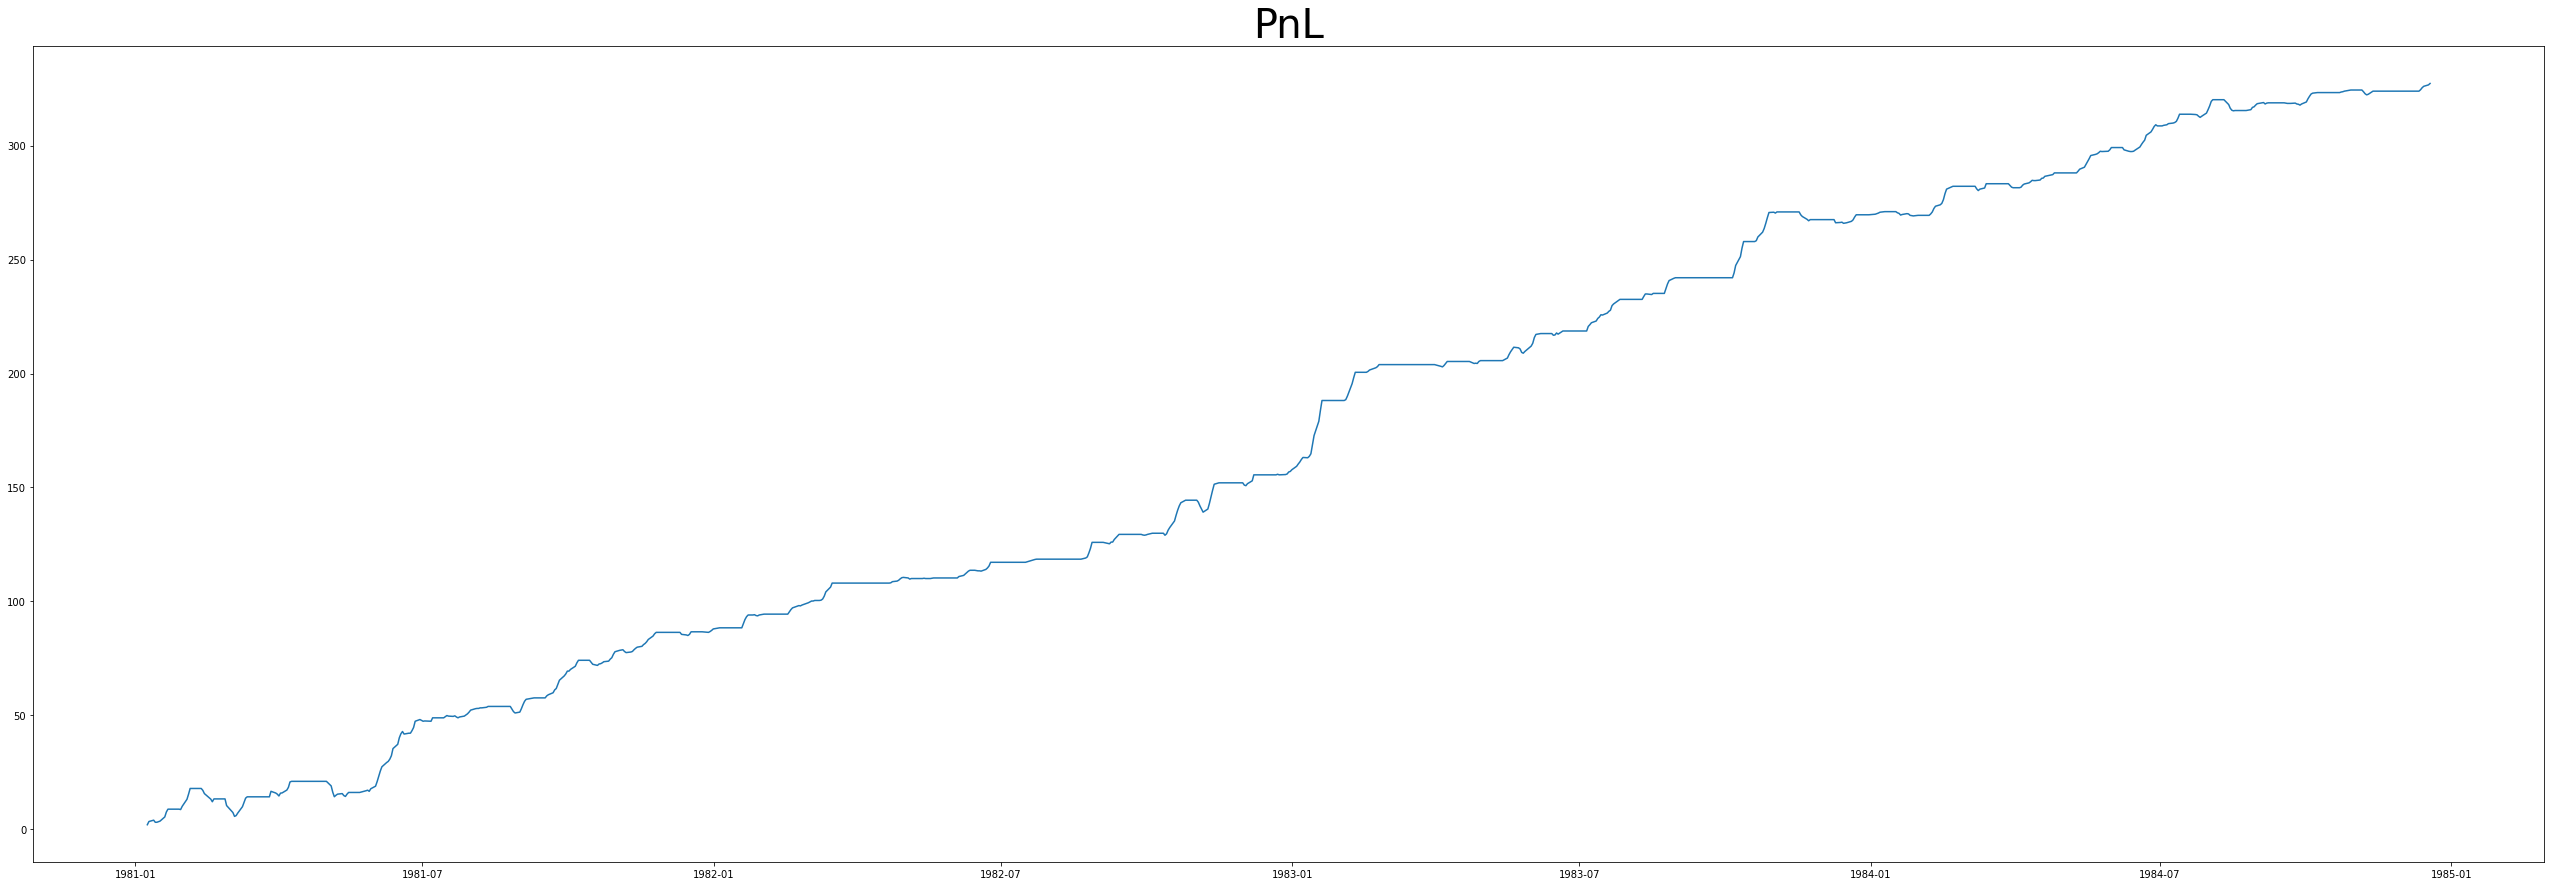

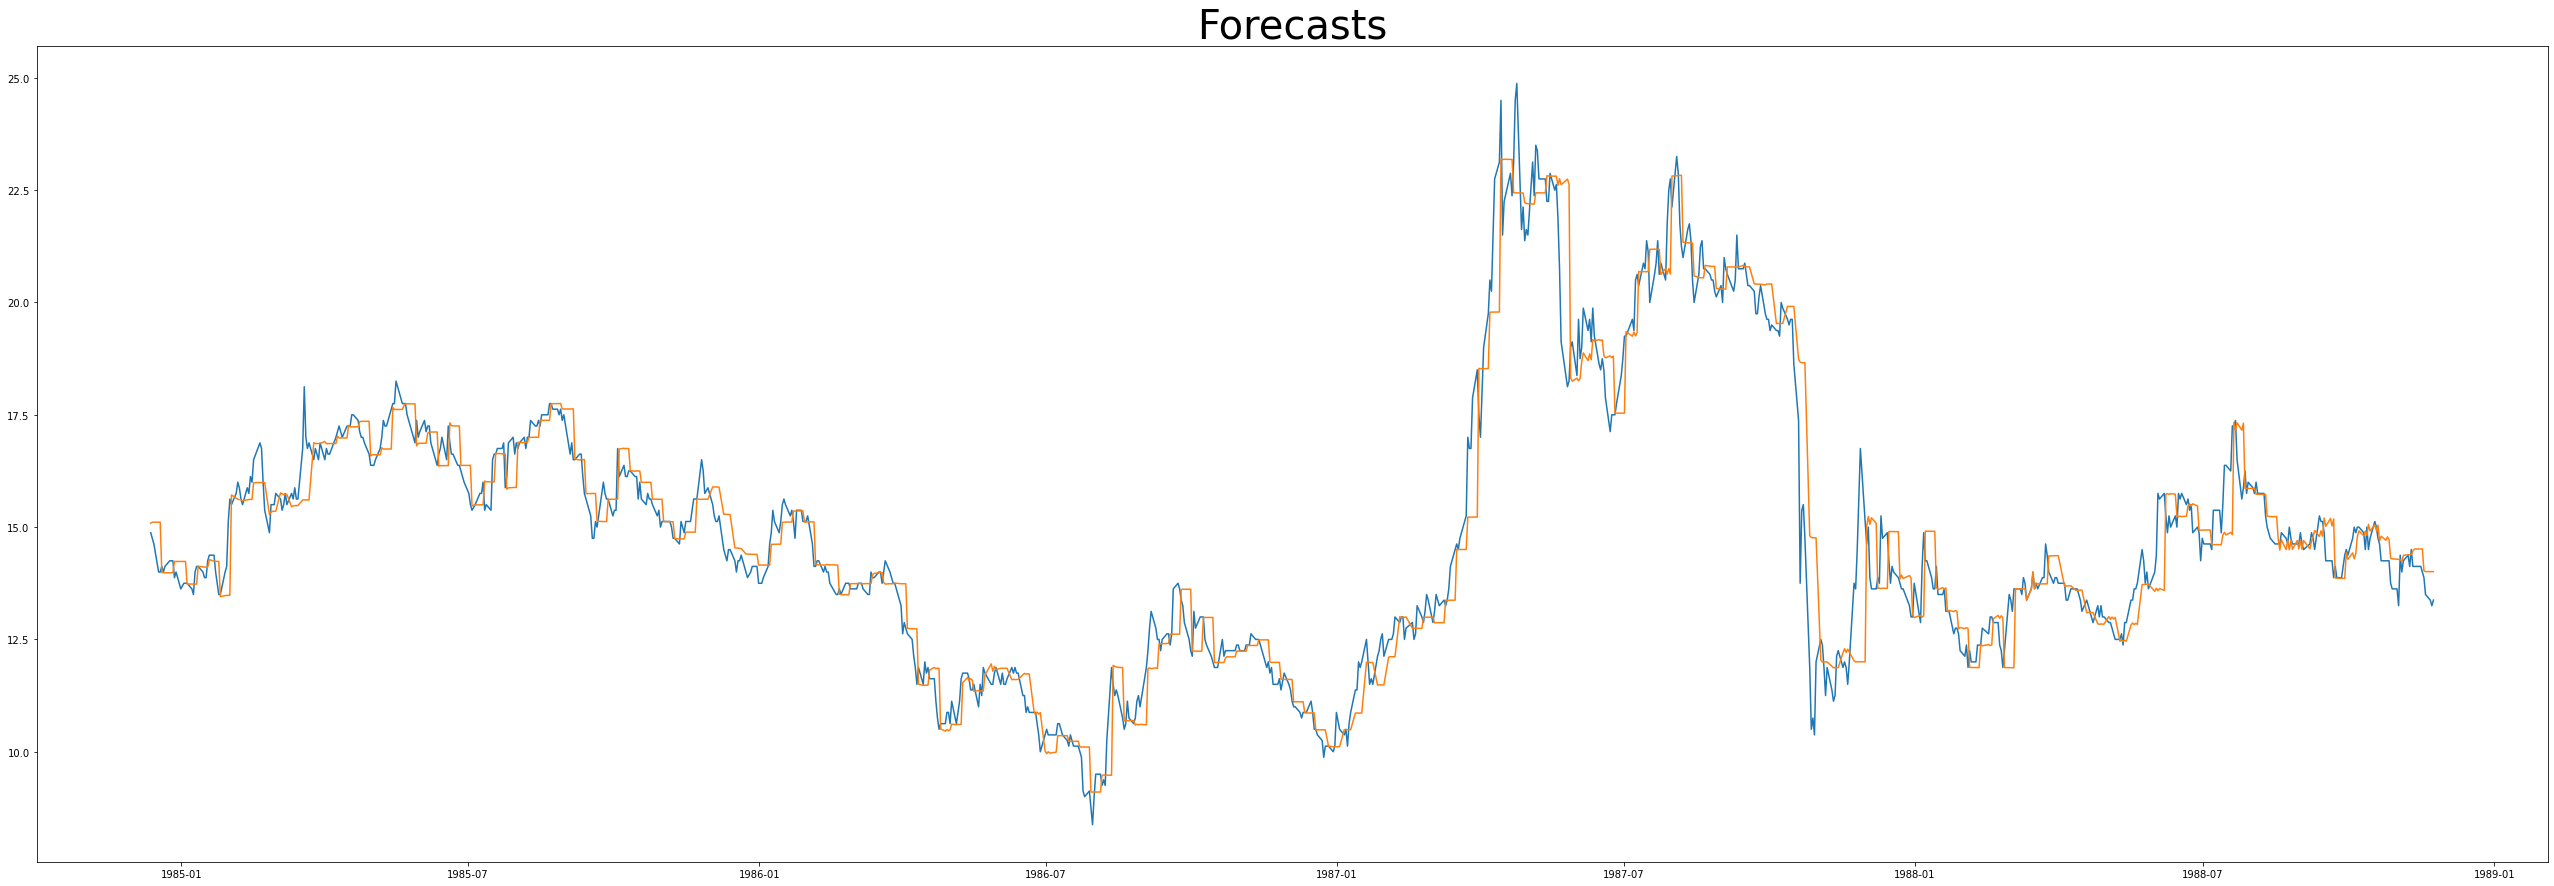

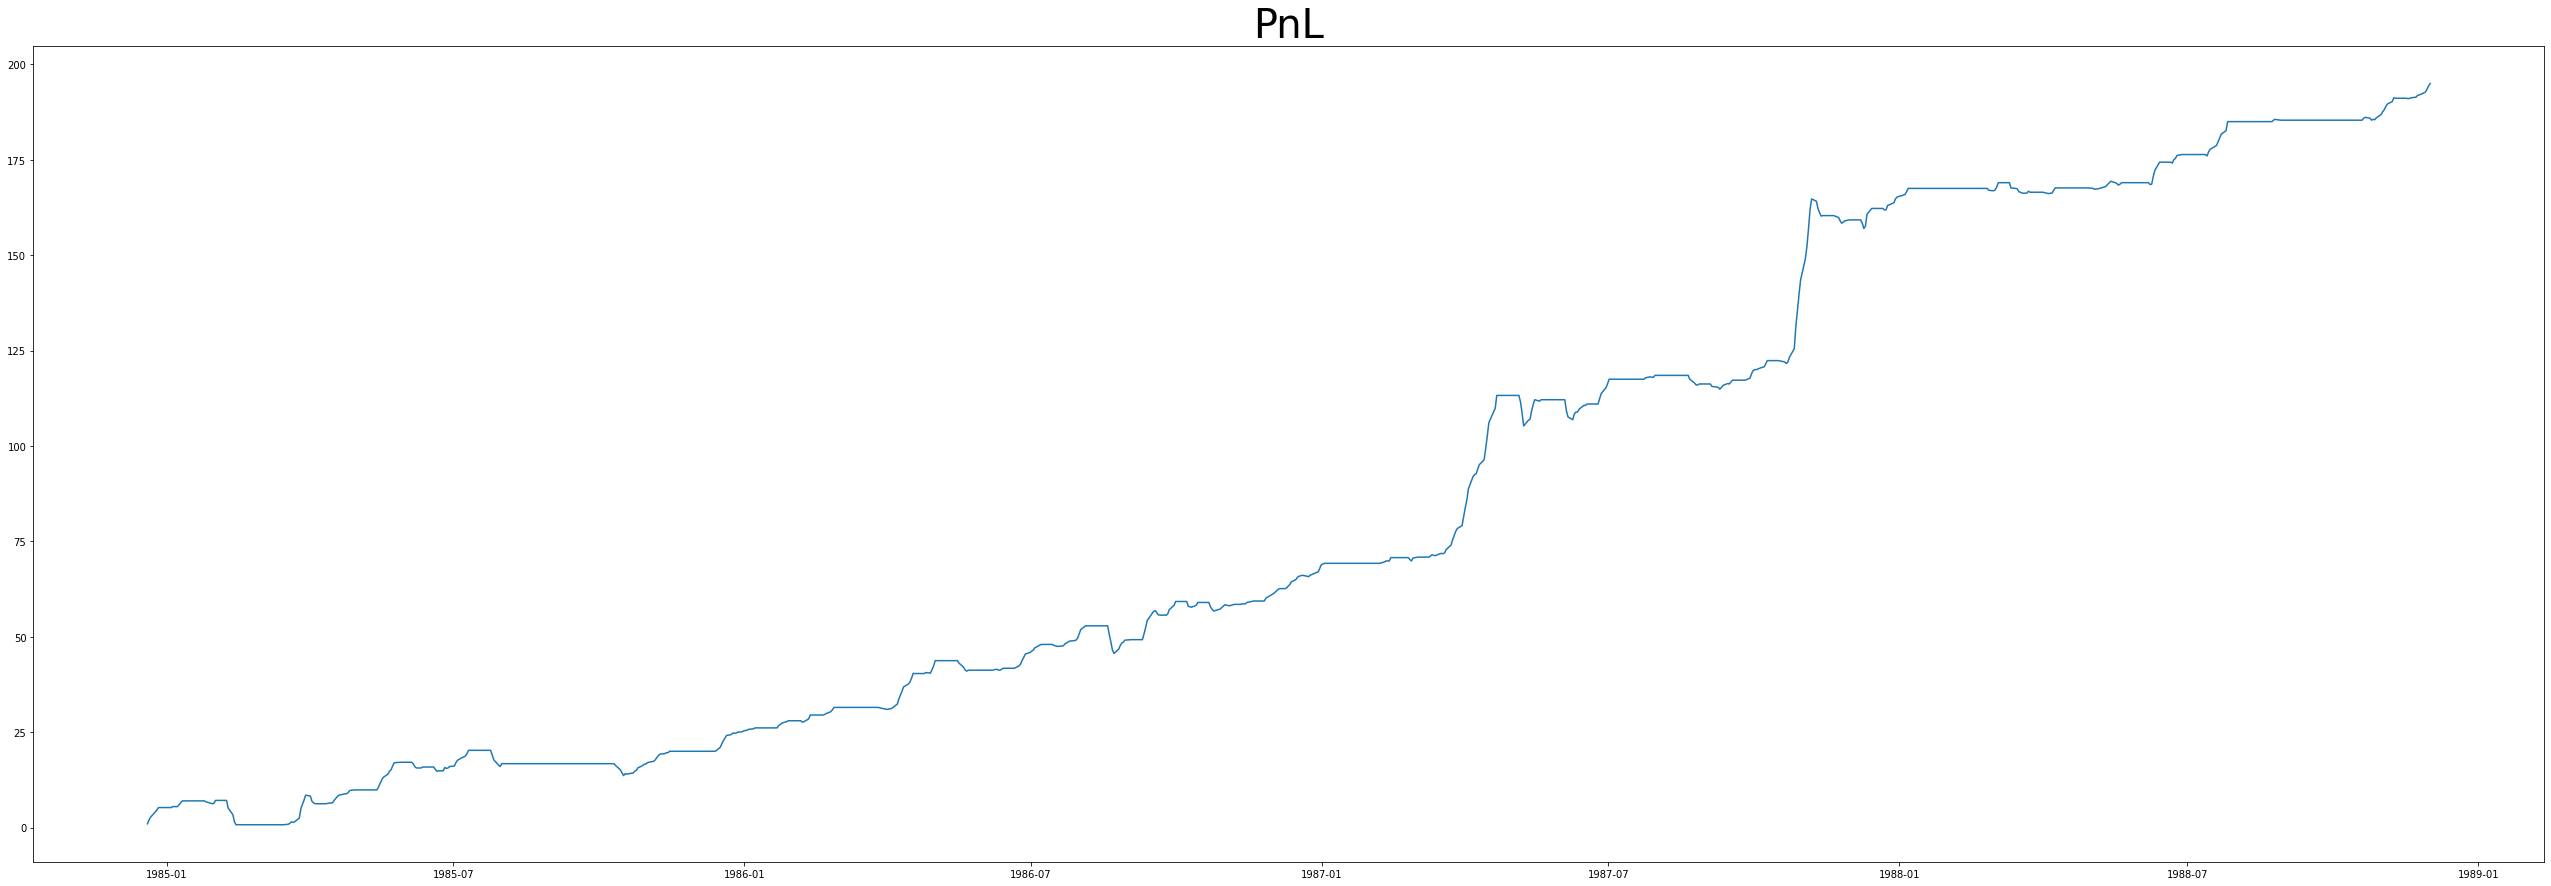

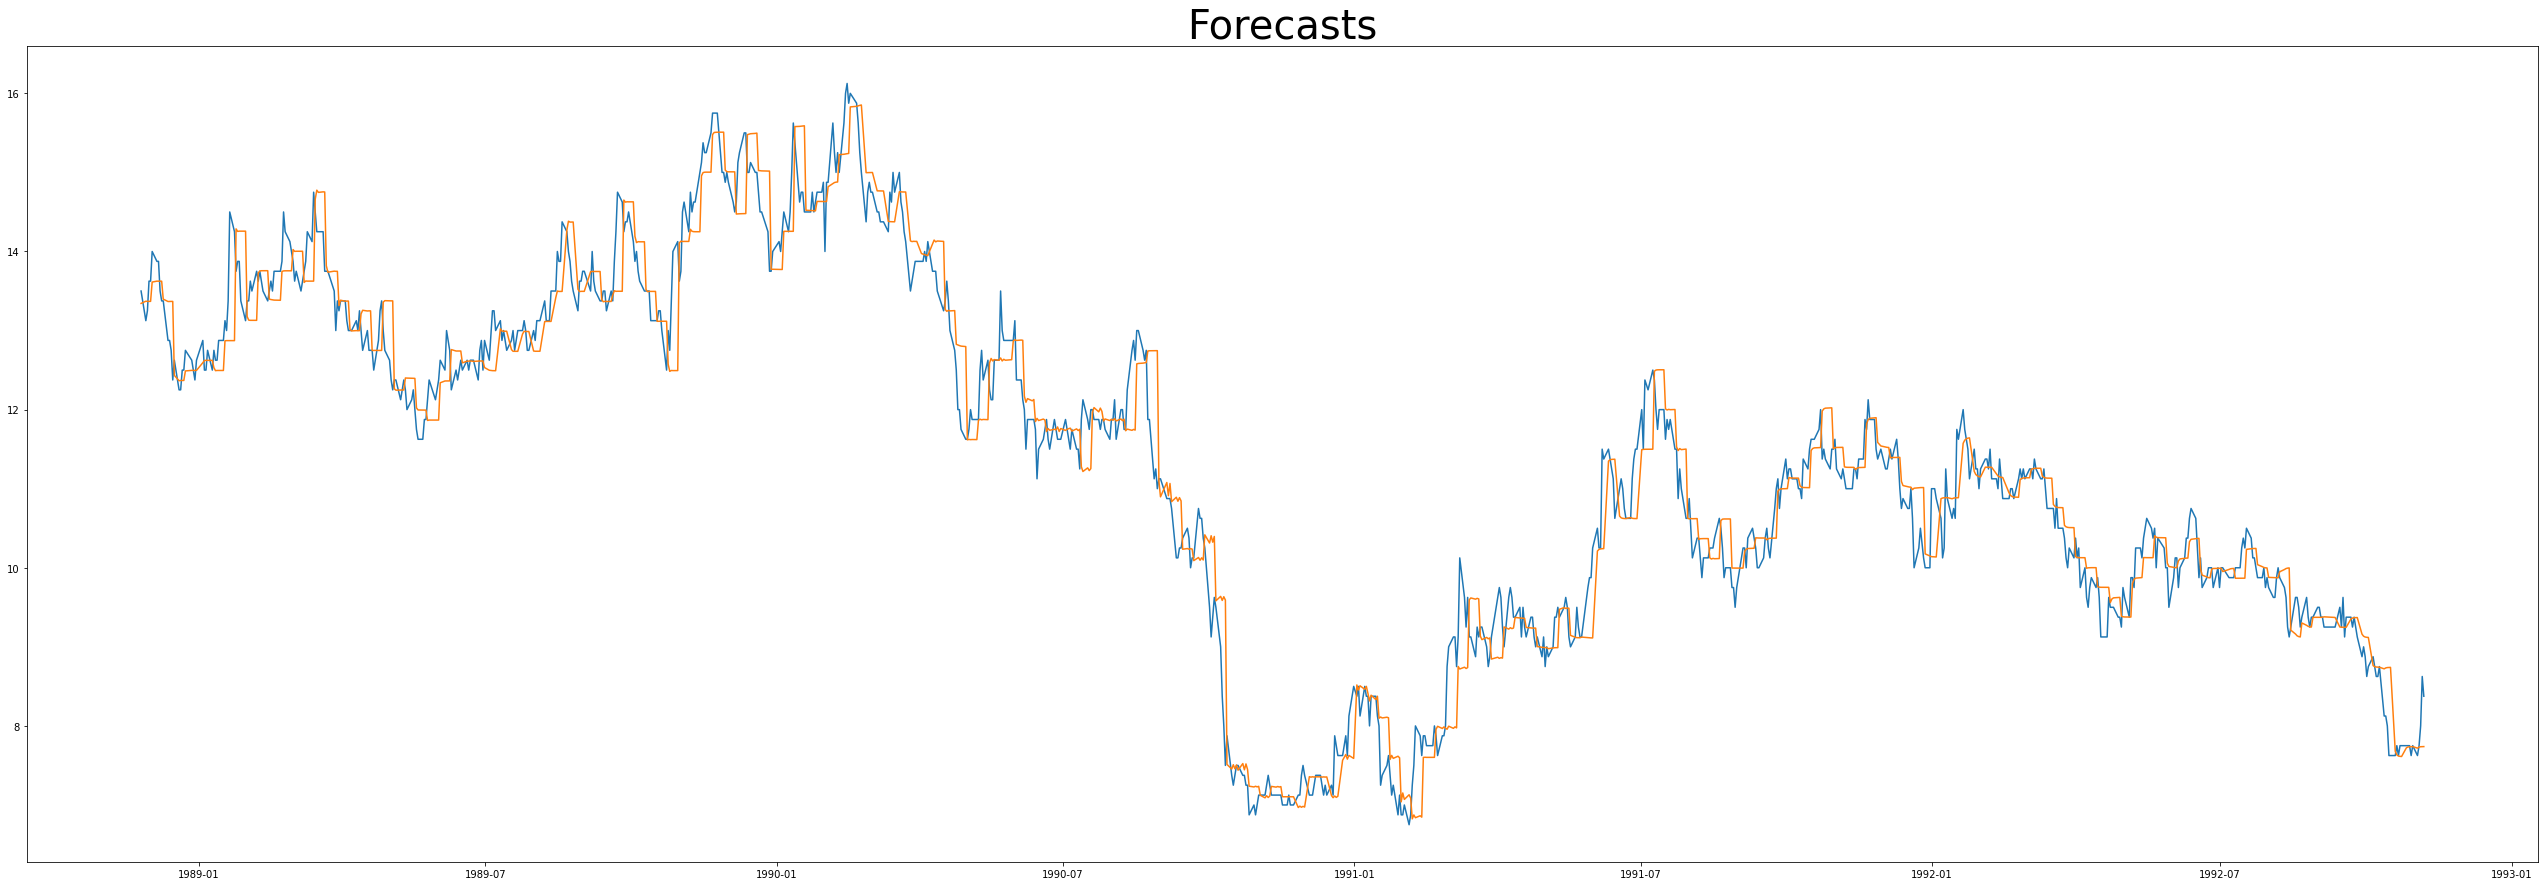

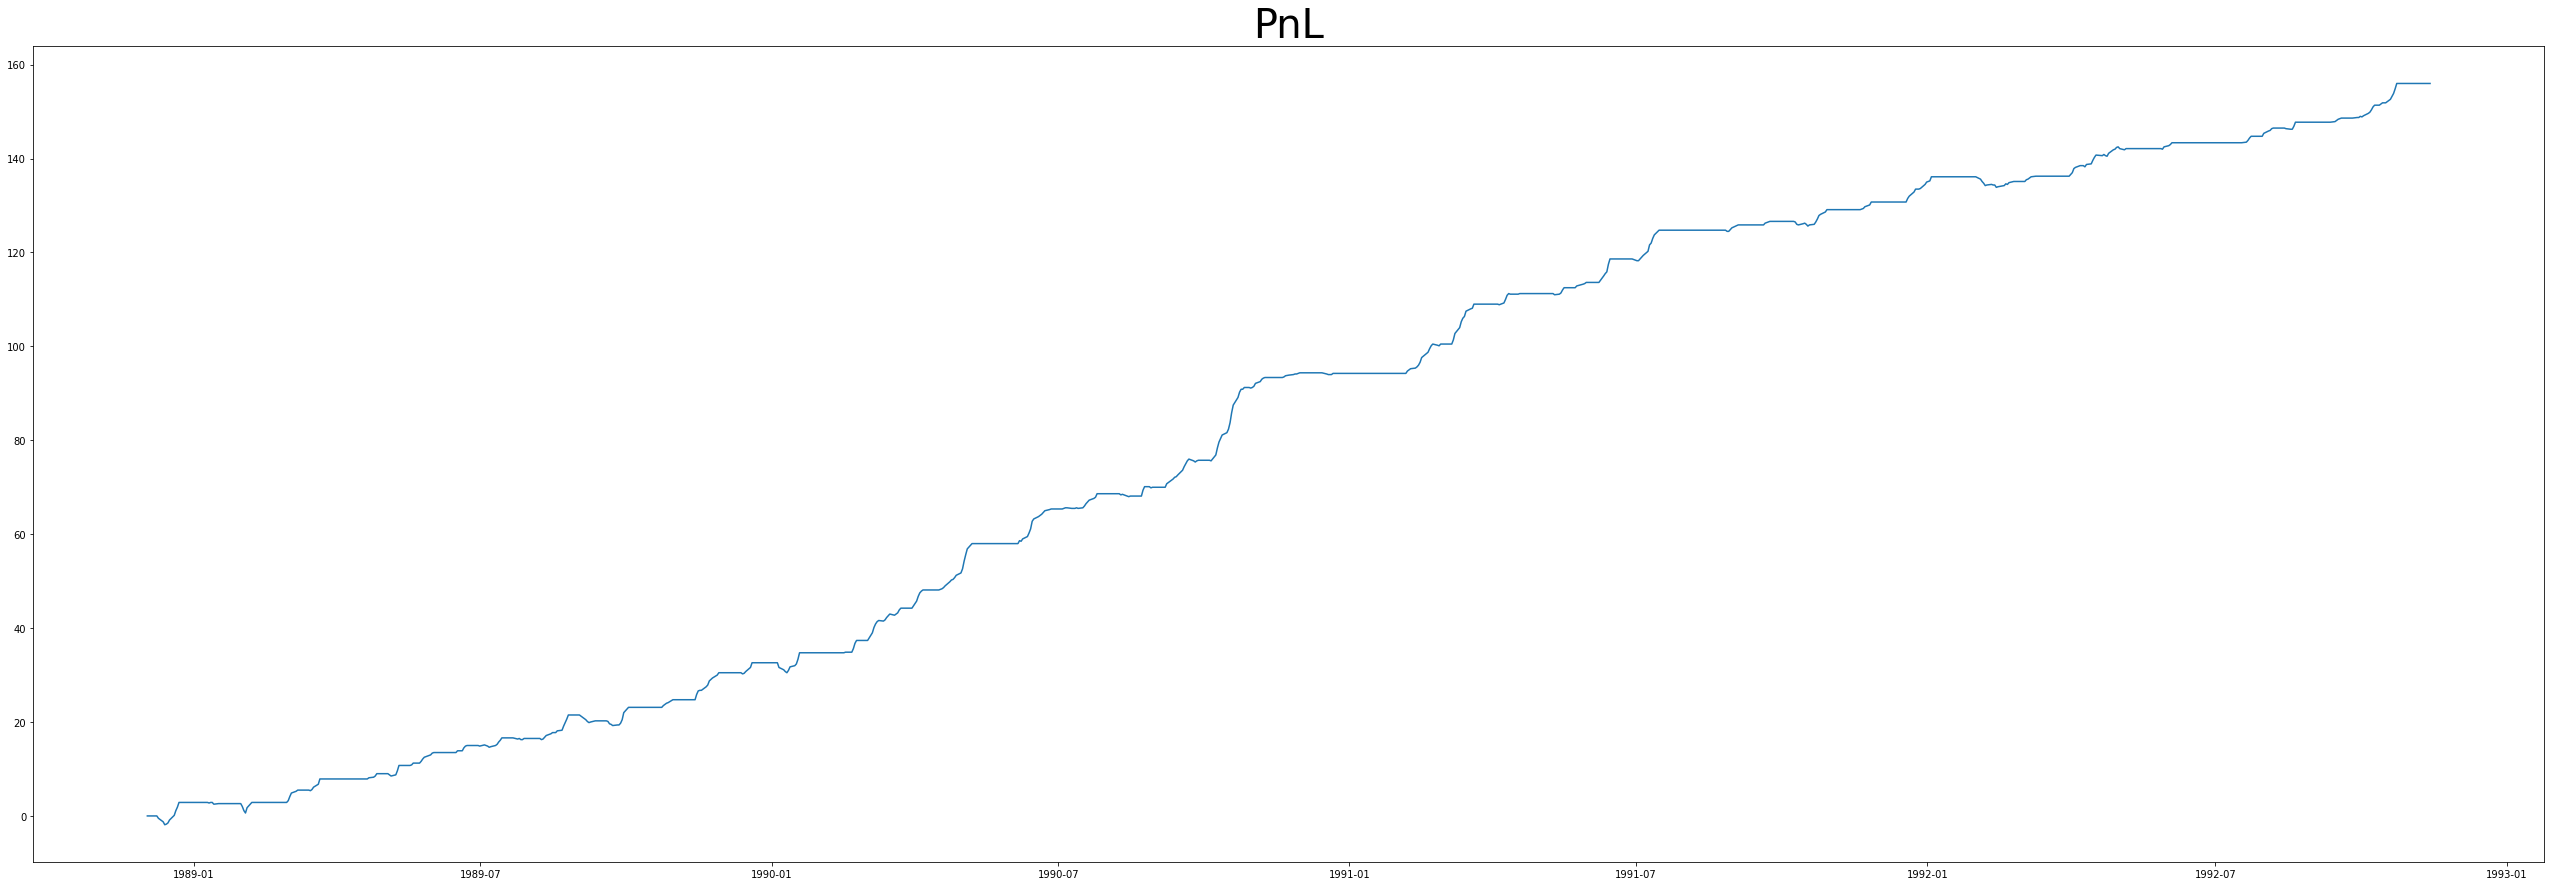

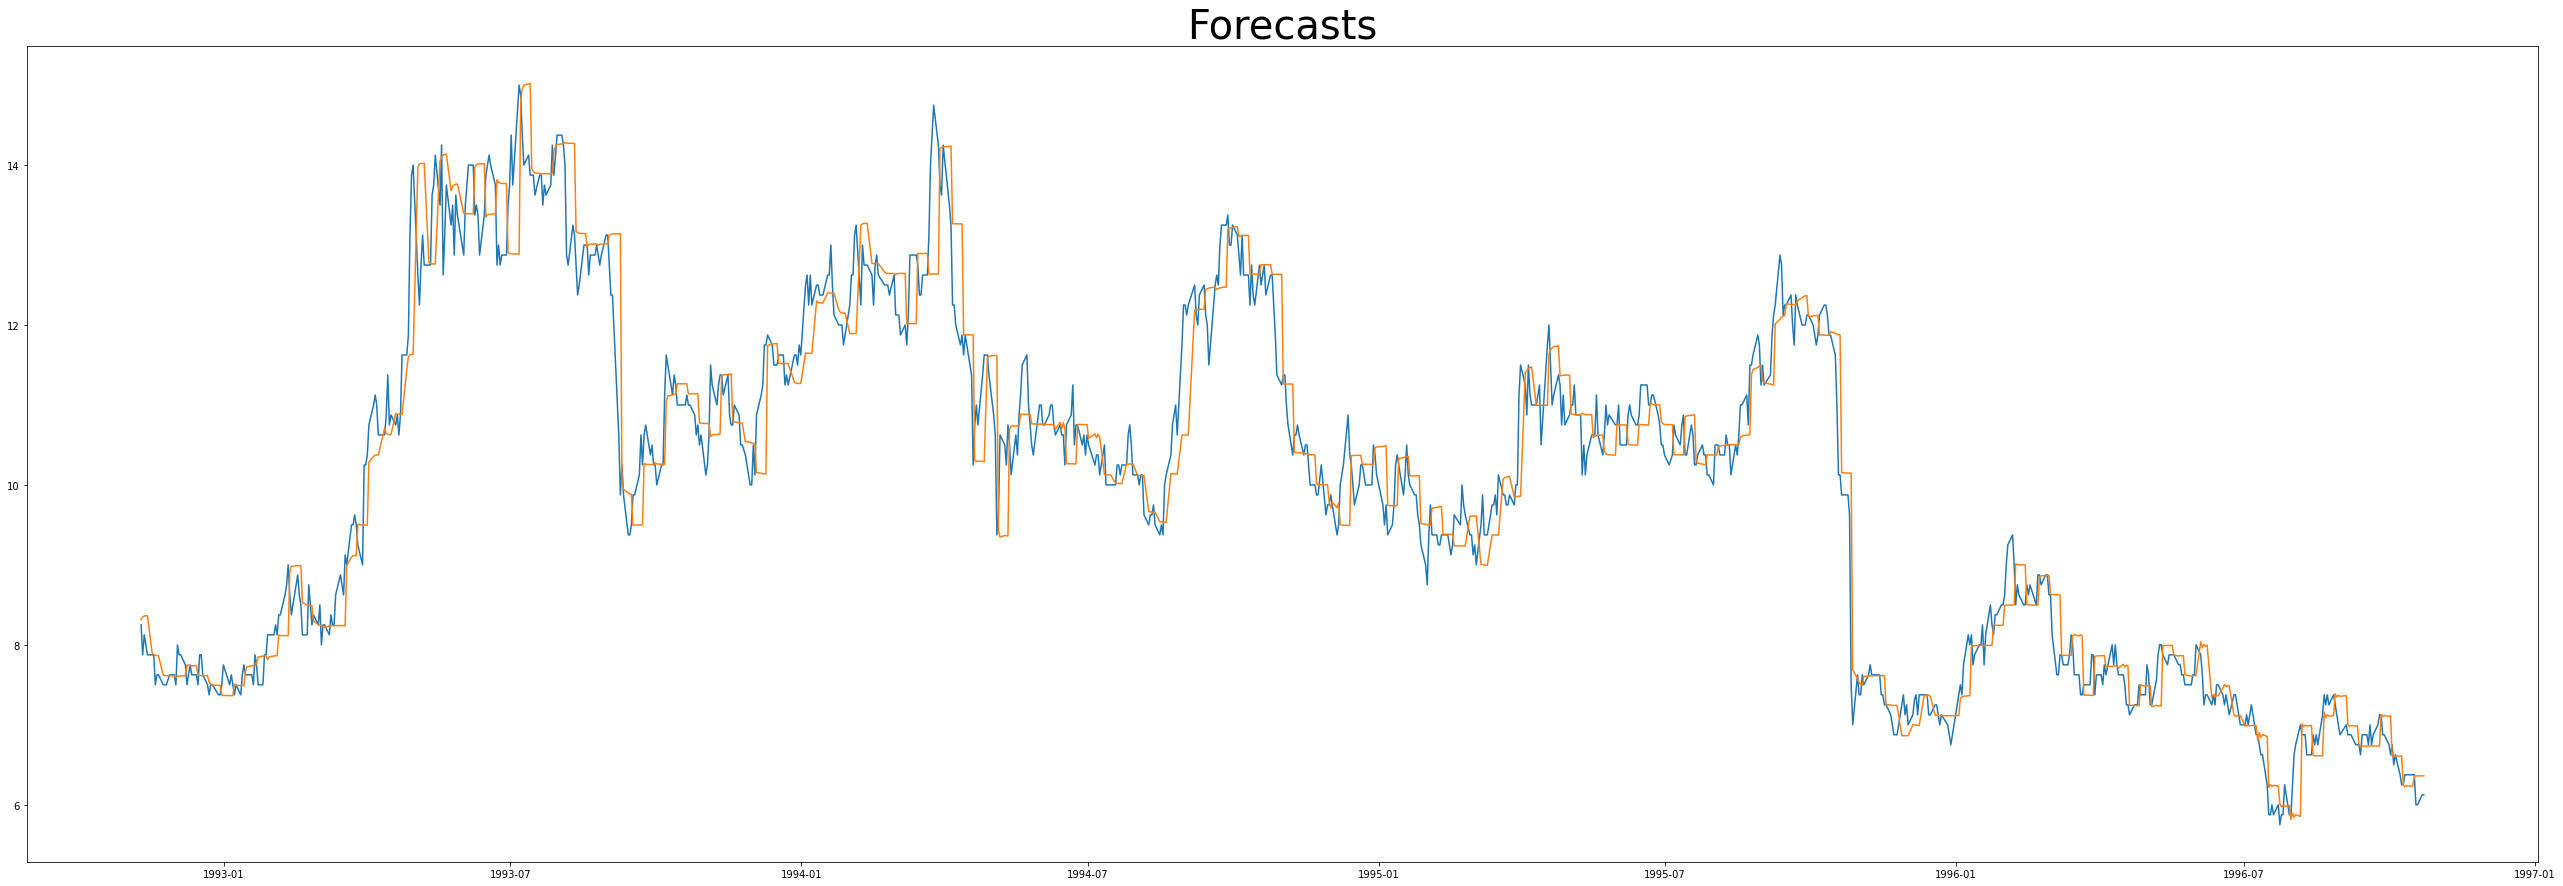

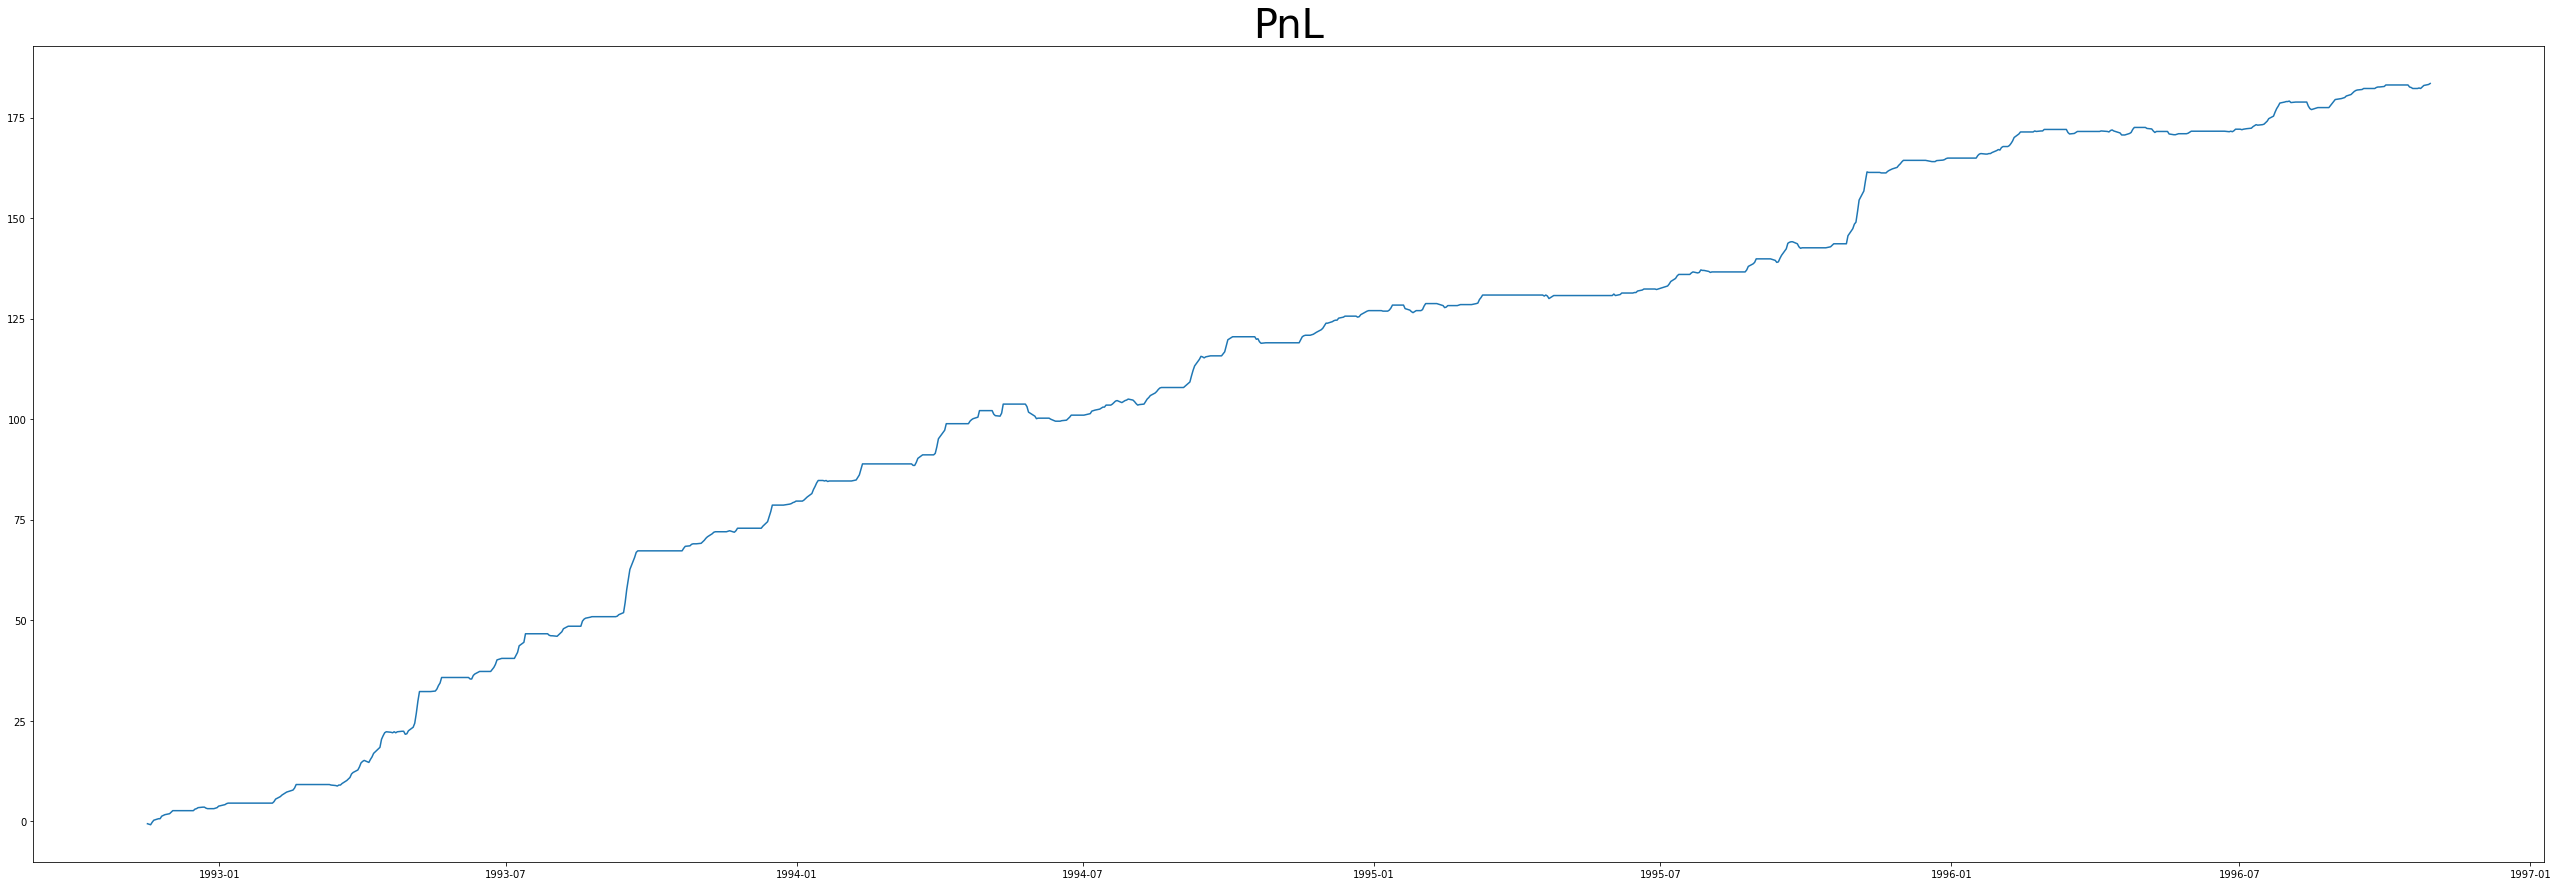

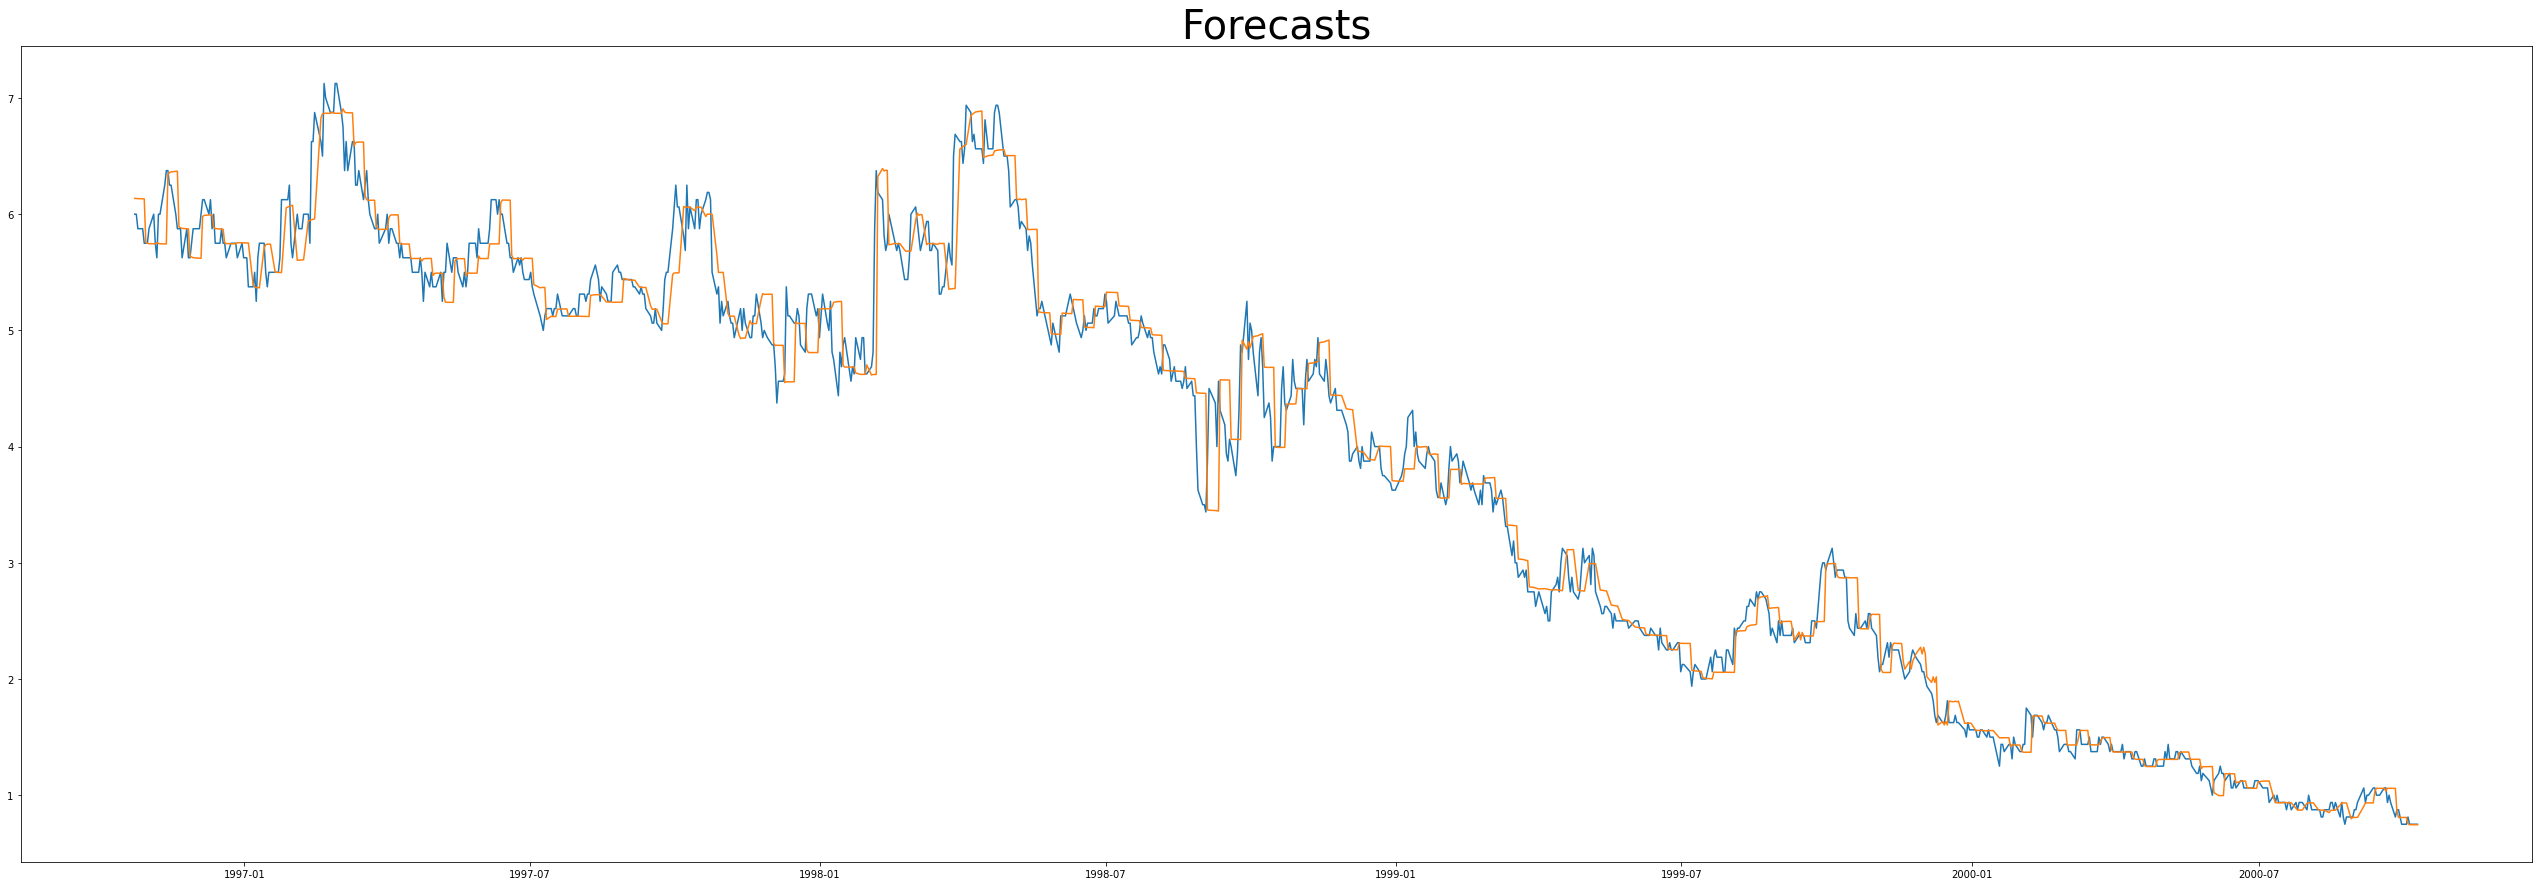

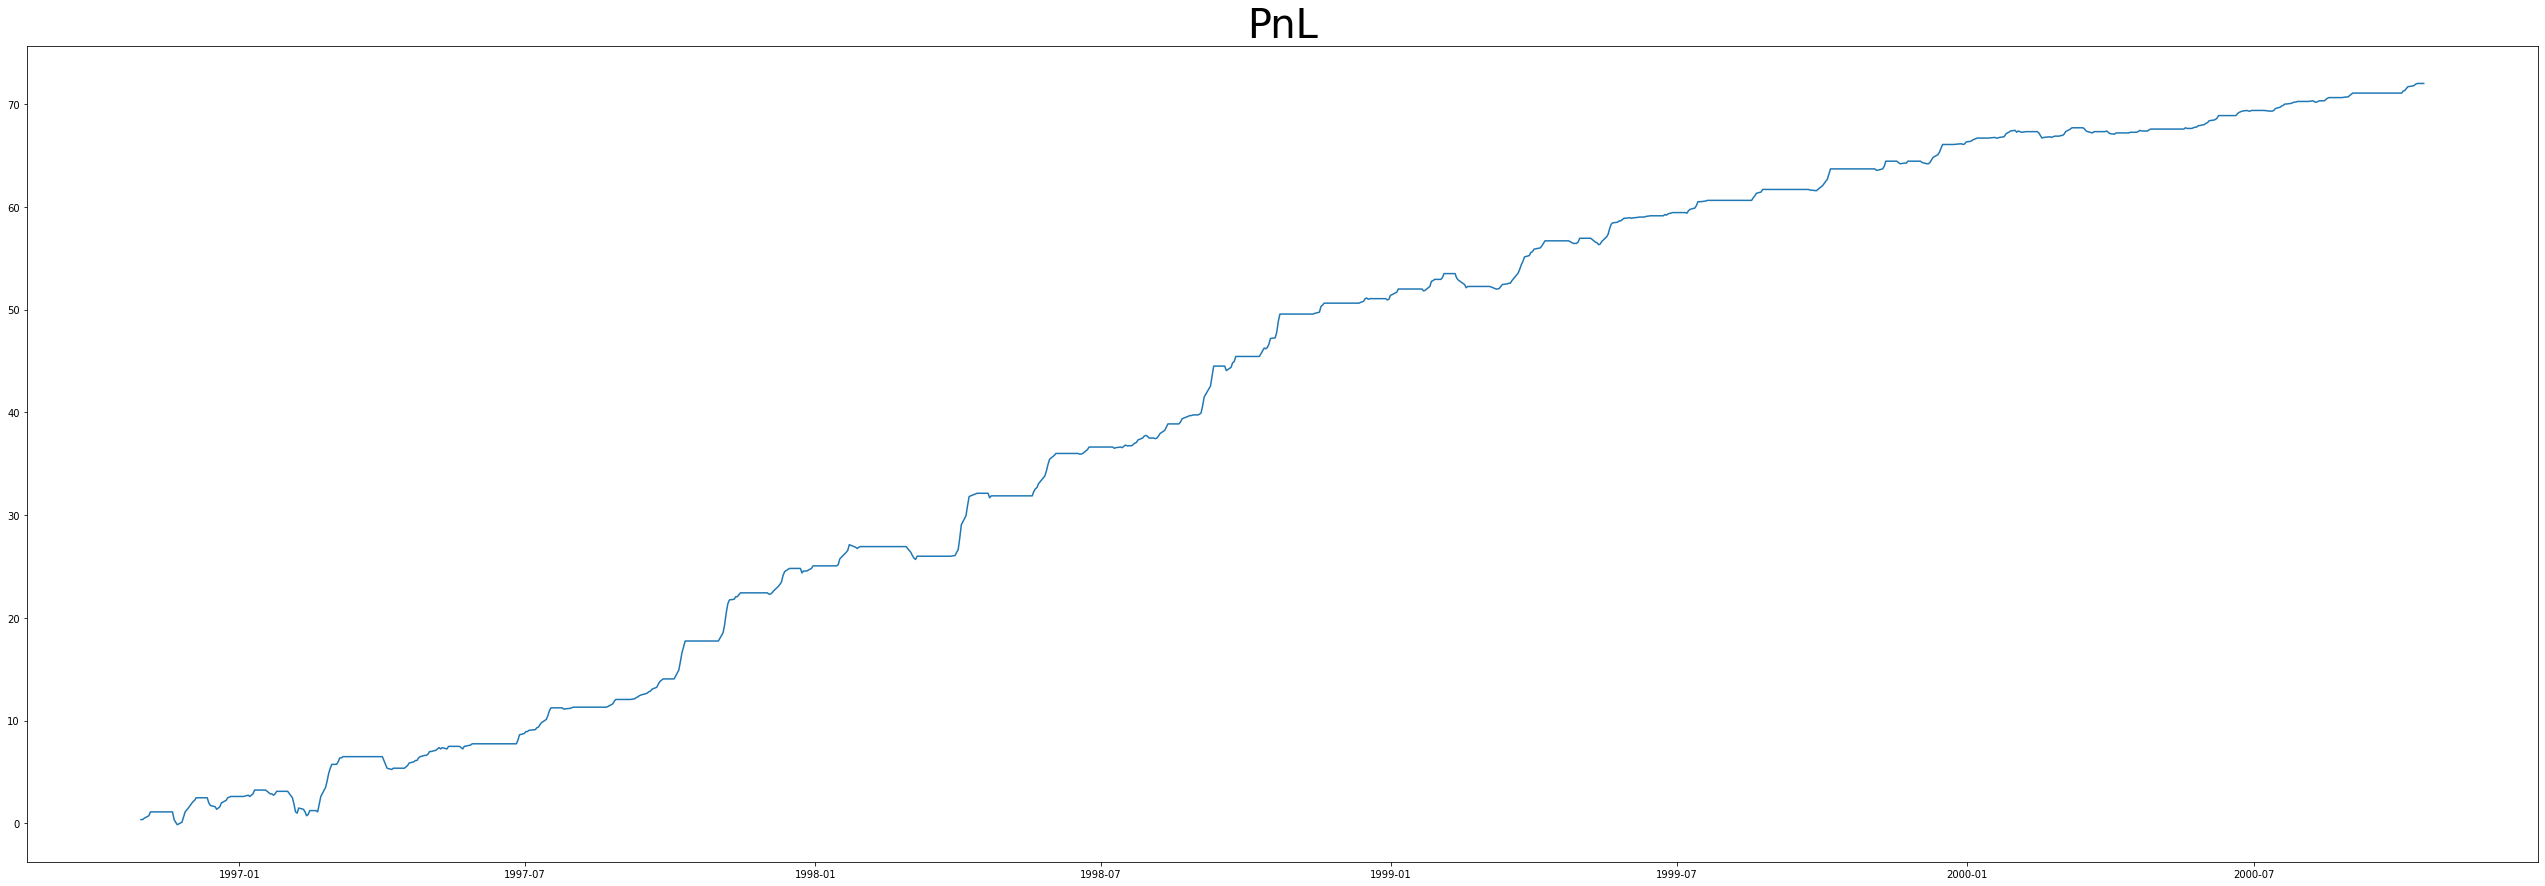

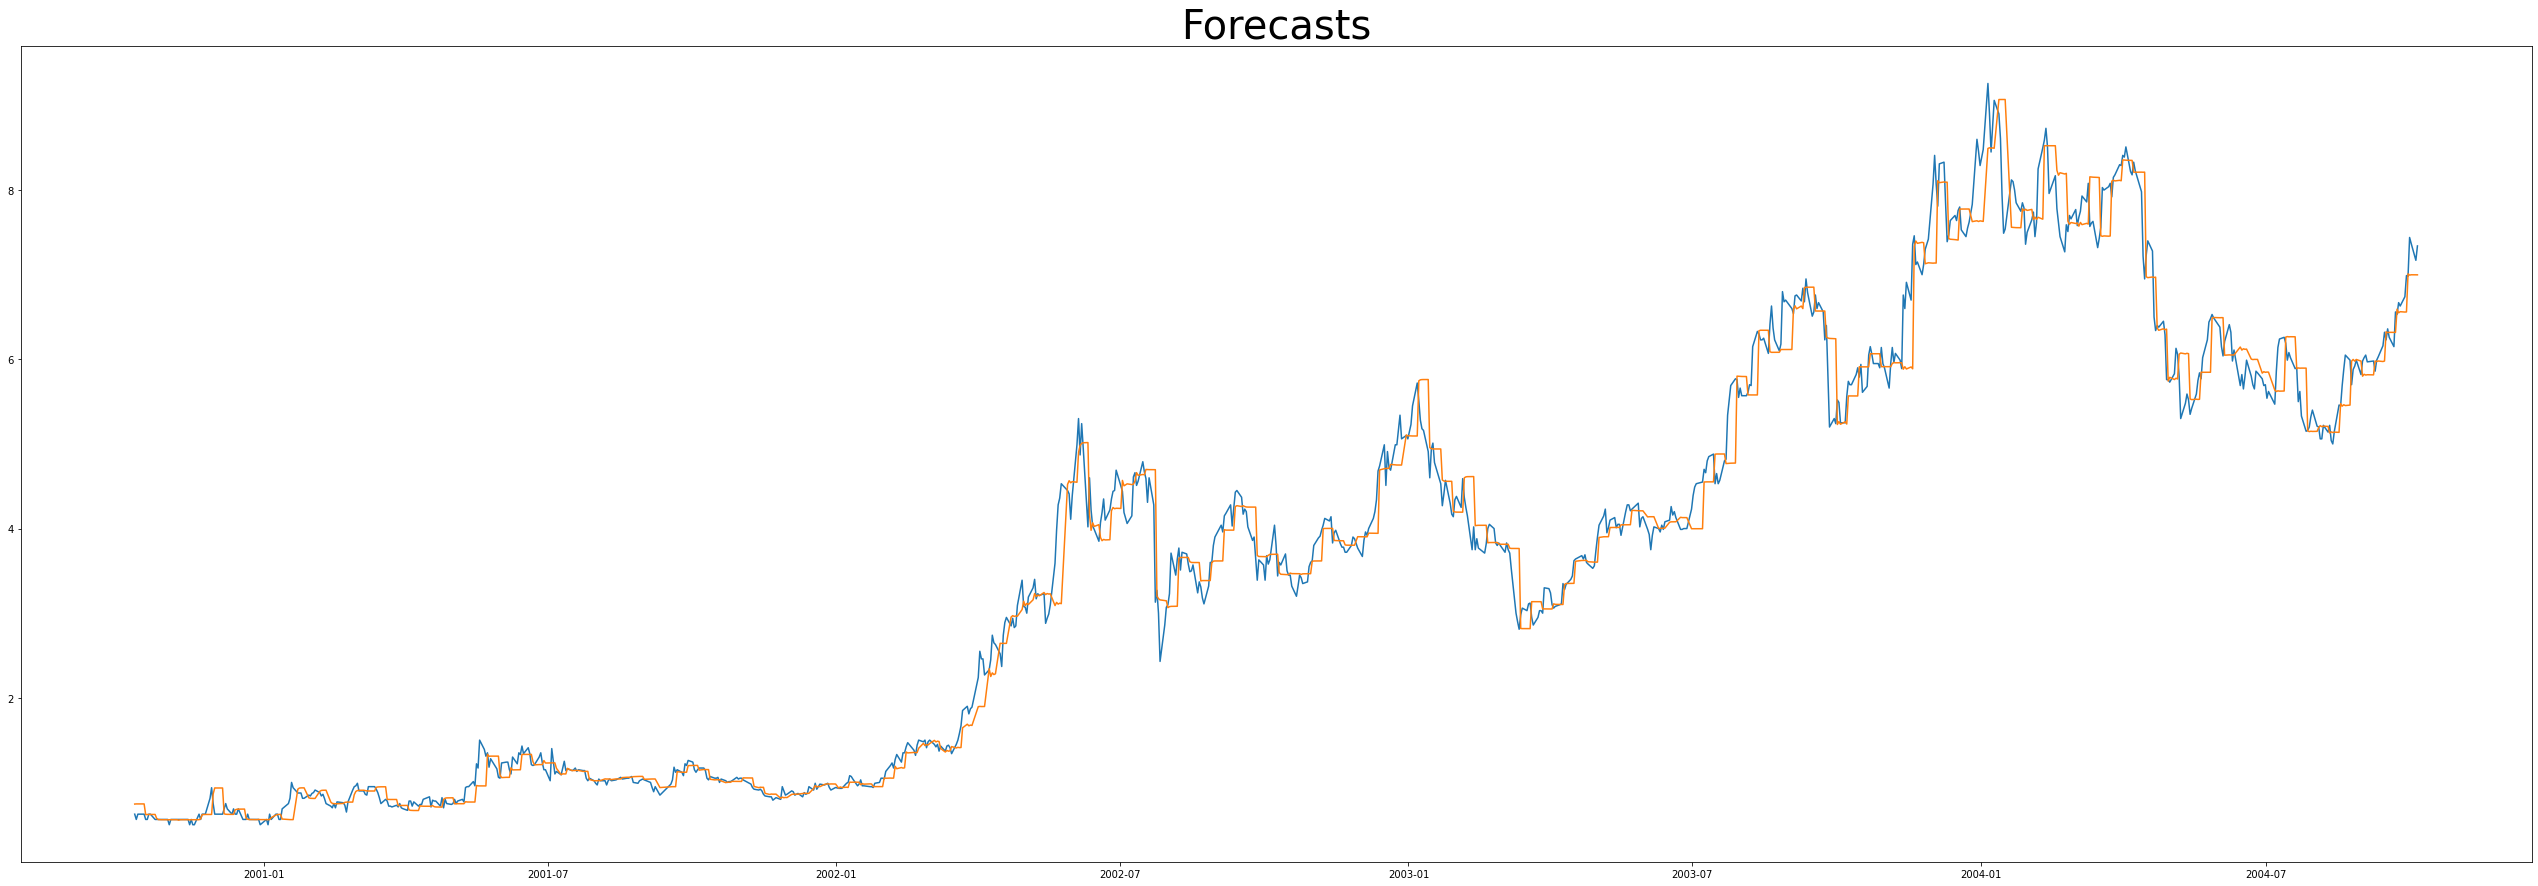

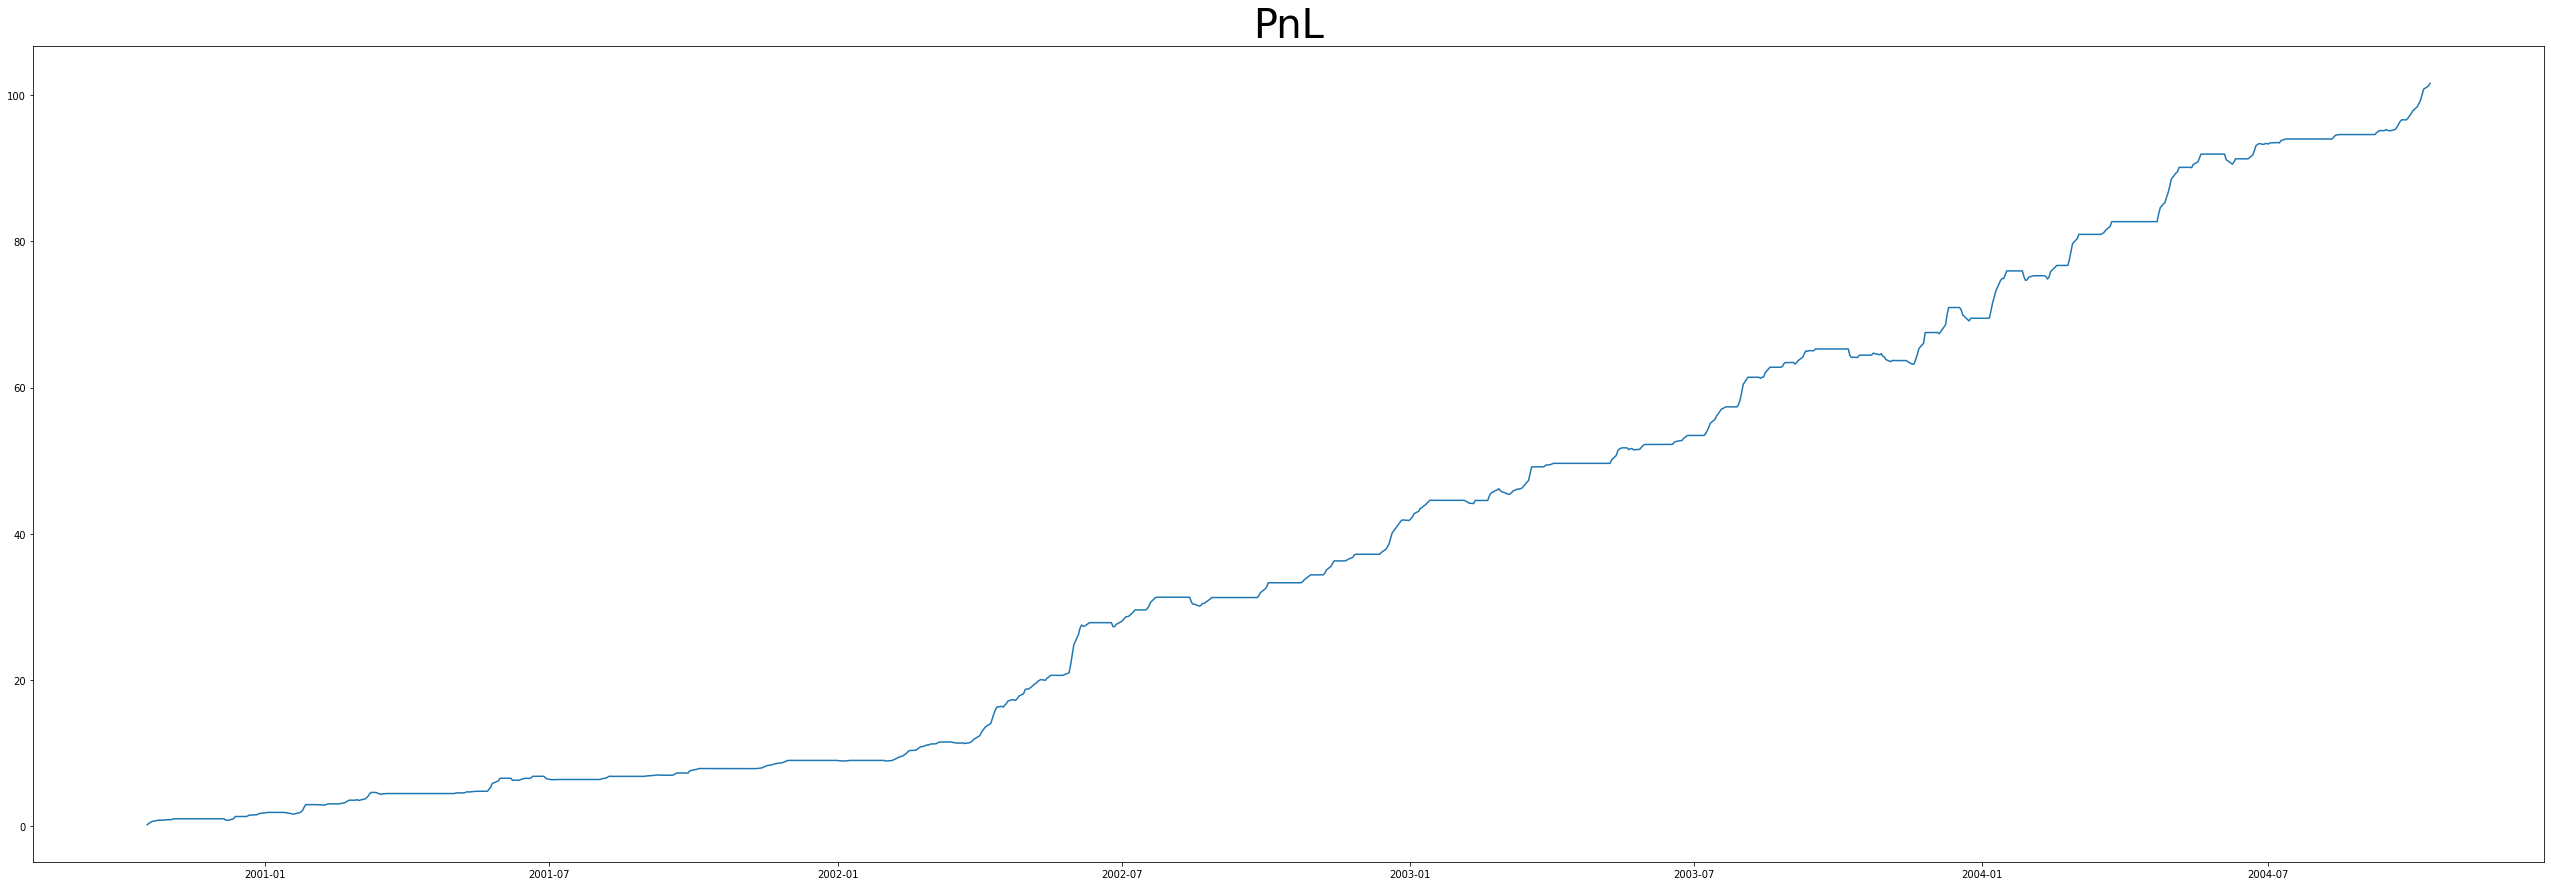

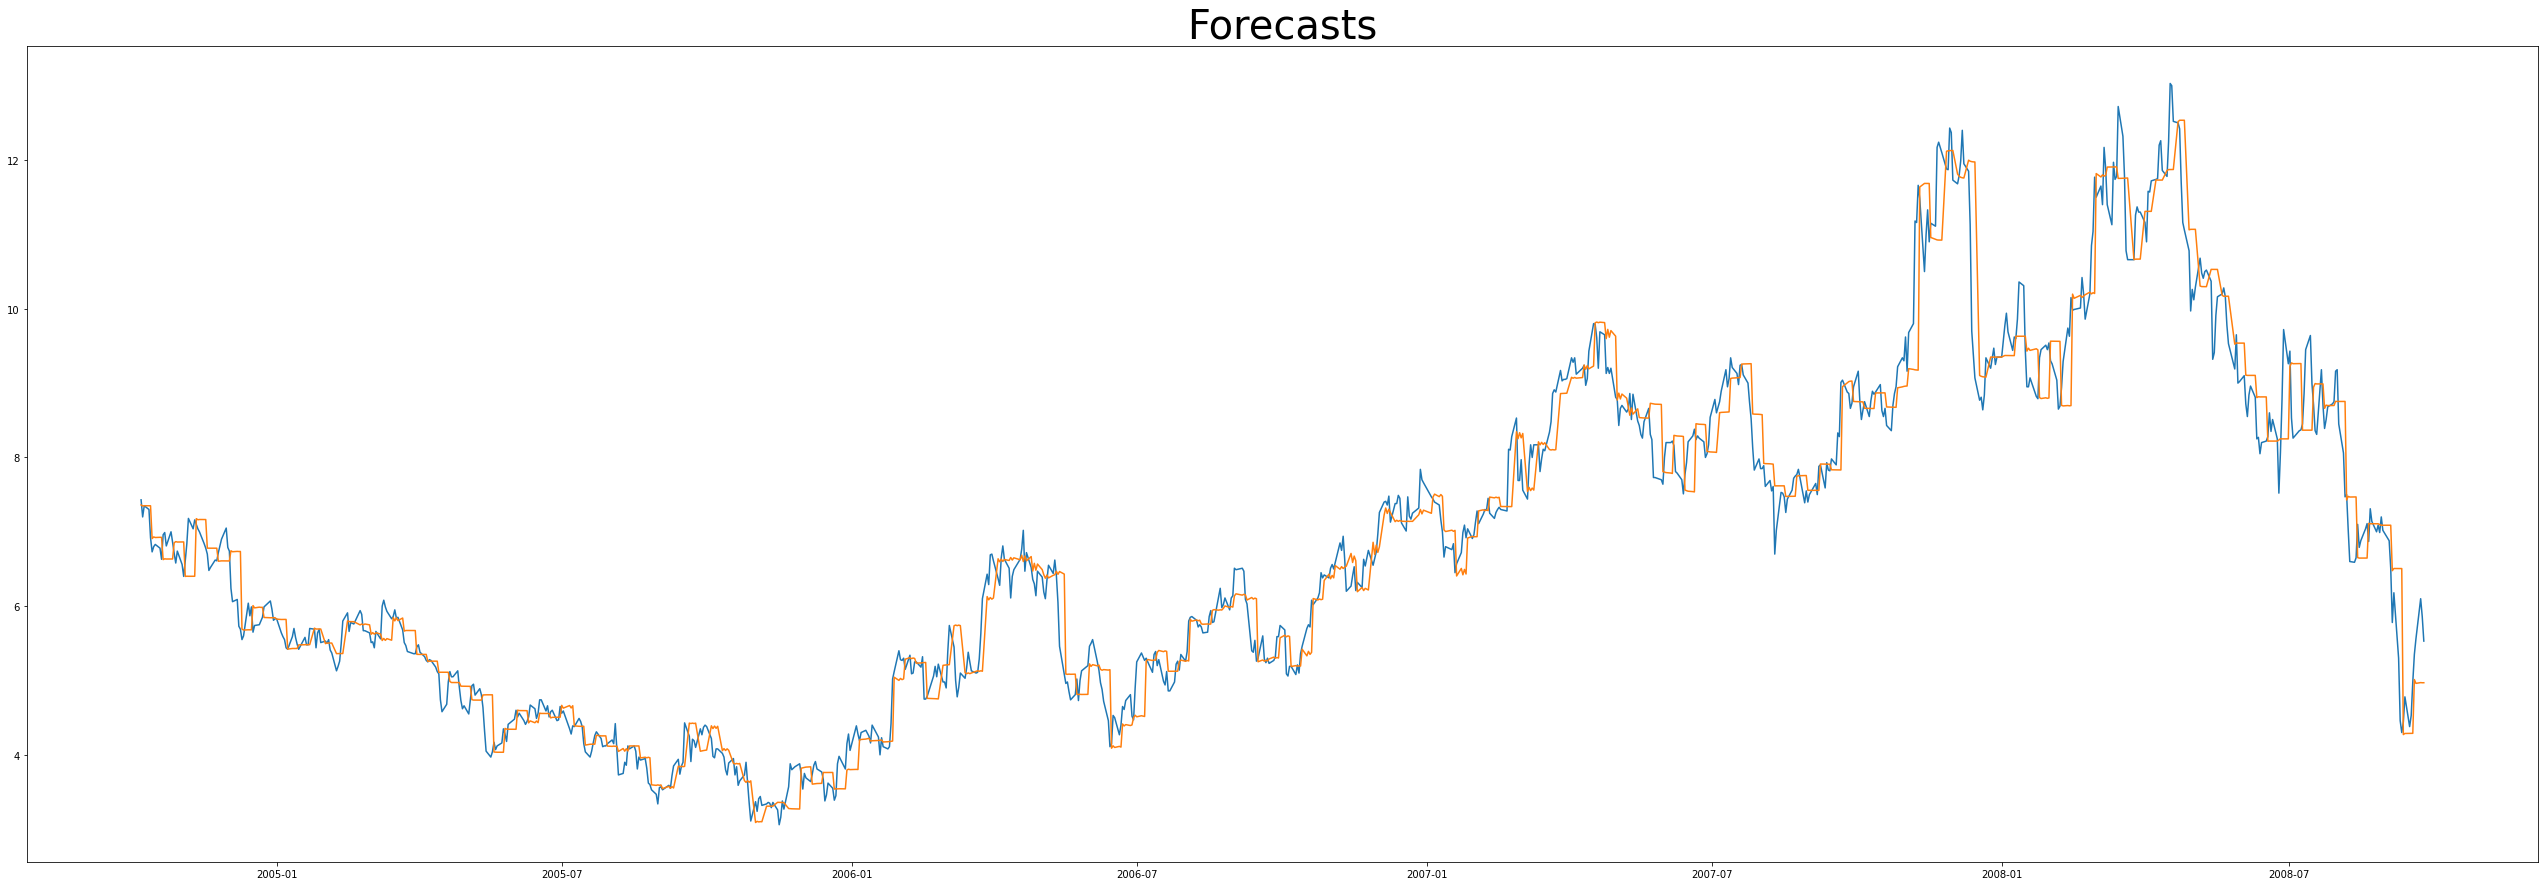

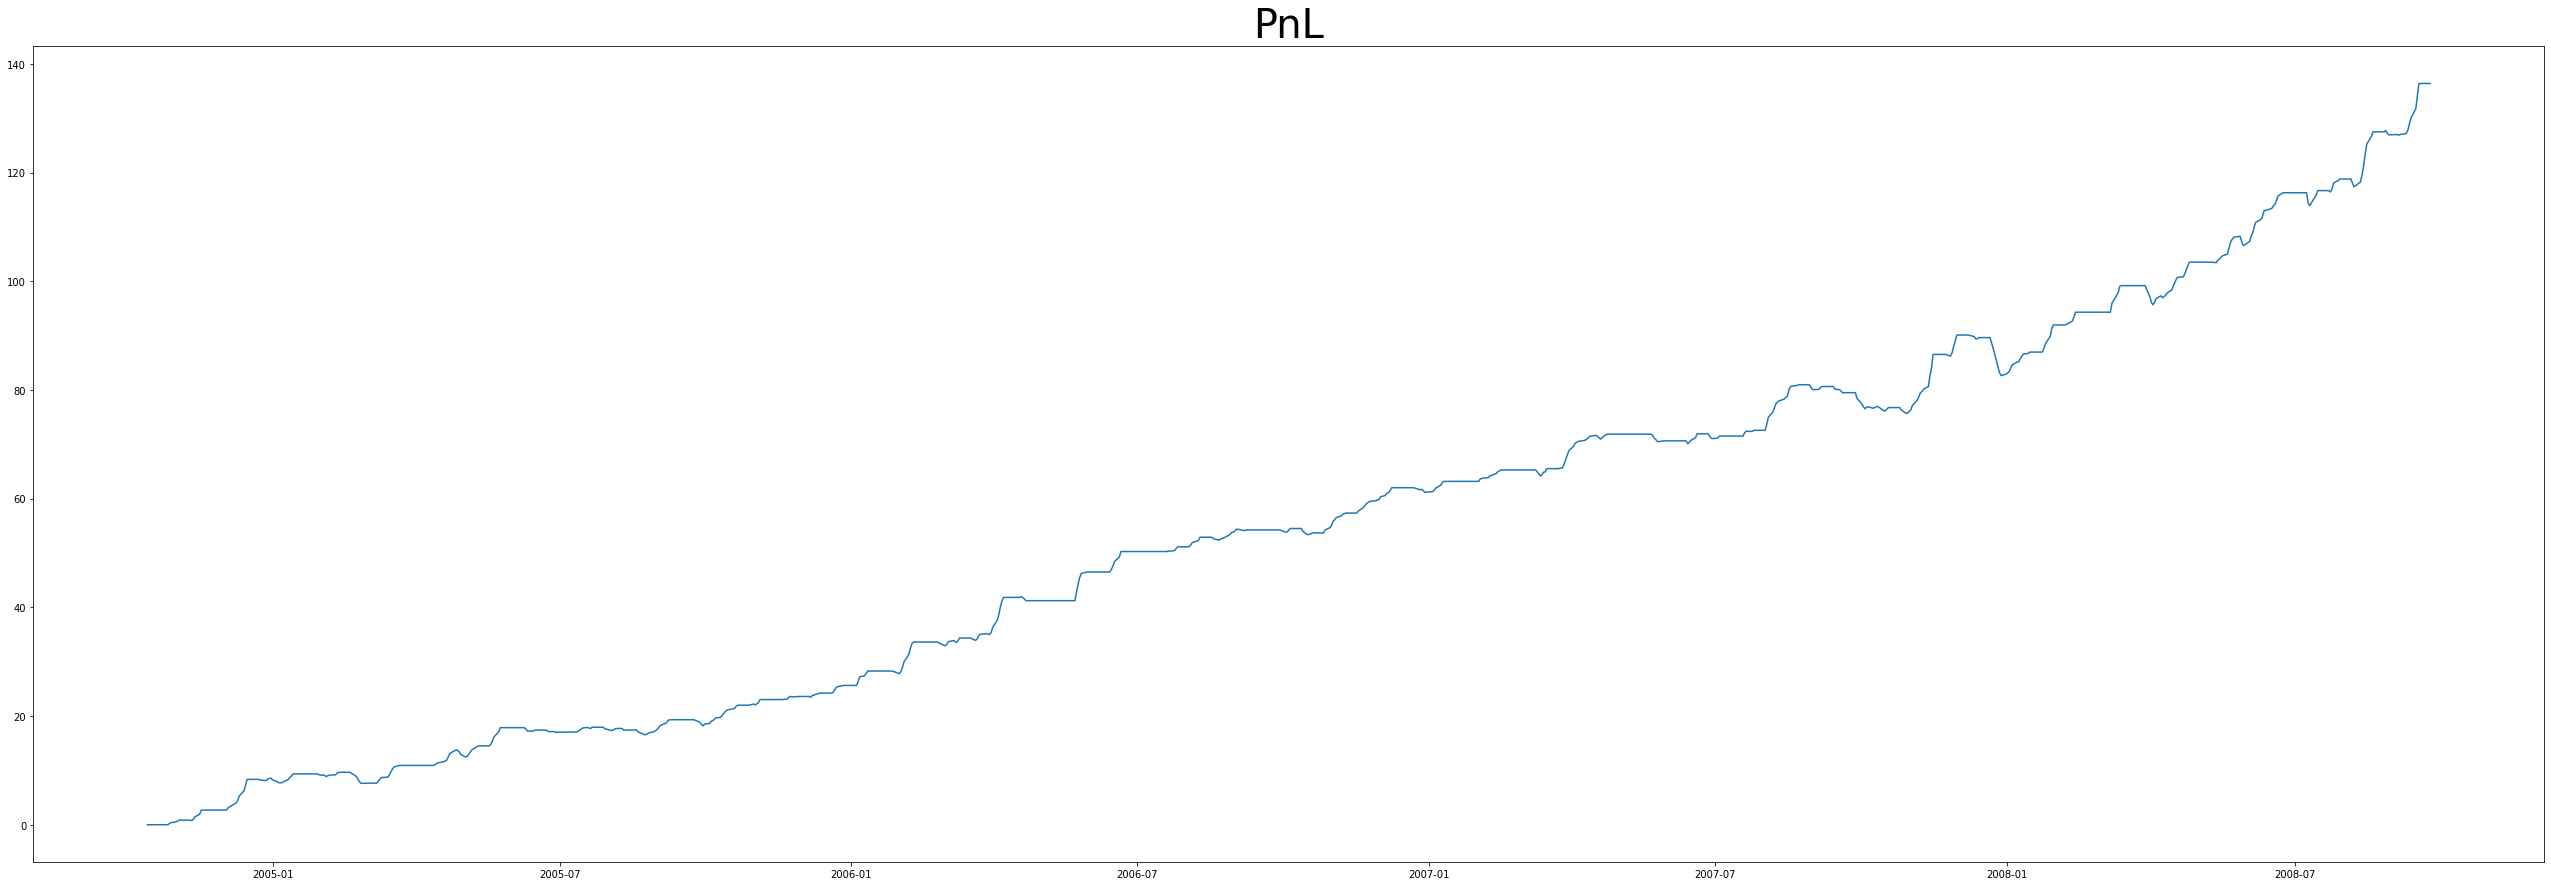

In [13]:
for i in range(10):
    plt.figure(figsize=(45,15))

    plt.plot(forecast_df['close'][i*1000:(i+1)*1000])
    plt.plot(forecast_df['pointForecast'][i*1000:(i+1)*1000])
    plt.title('Forecasts',fontsize=40)
    plt.show()

    plt.figure(figsize=(45,15))

    plt.plot(pnl_df['pnl'][i*1000:(i+1)*1000].cumsum())
    plt.title('PnL',fontsize=40)
    plt.show()


# Positions


In [14]:
# Retrieve dataframe of positions
merge_df  = pnl_df.merge(forecast_df, left_on='asofdate', right_on='asofdate')
positions = merge_df[(merge_df['forecastday'] == 5)][['pnl','pointForecast','forecastday','product_name']]


positions[positions['pnl']!=0]
volatility = (np.log(positions['pnl'].cumsum()/positions['pnl'].cumsum().shift(1))).dropna(axis=0).rolling(window=30).std(ddof=0)*np.sqrt(252)


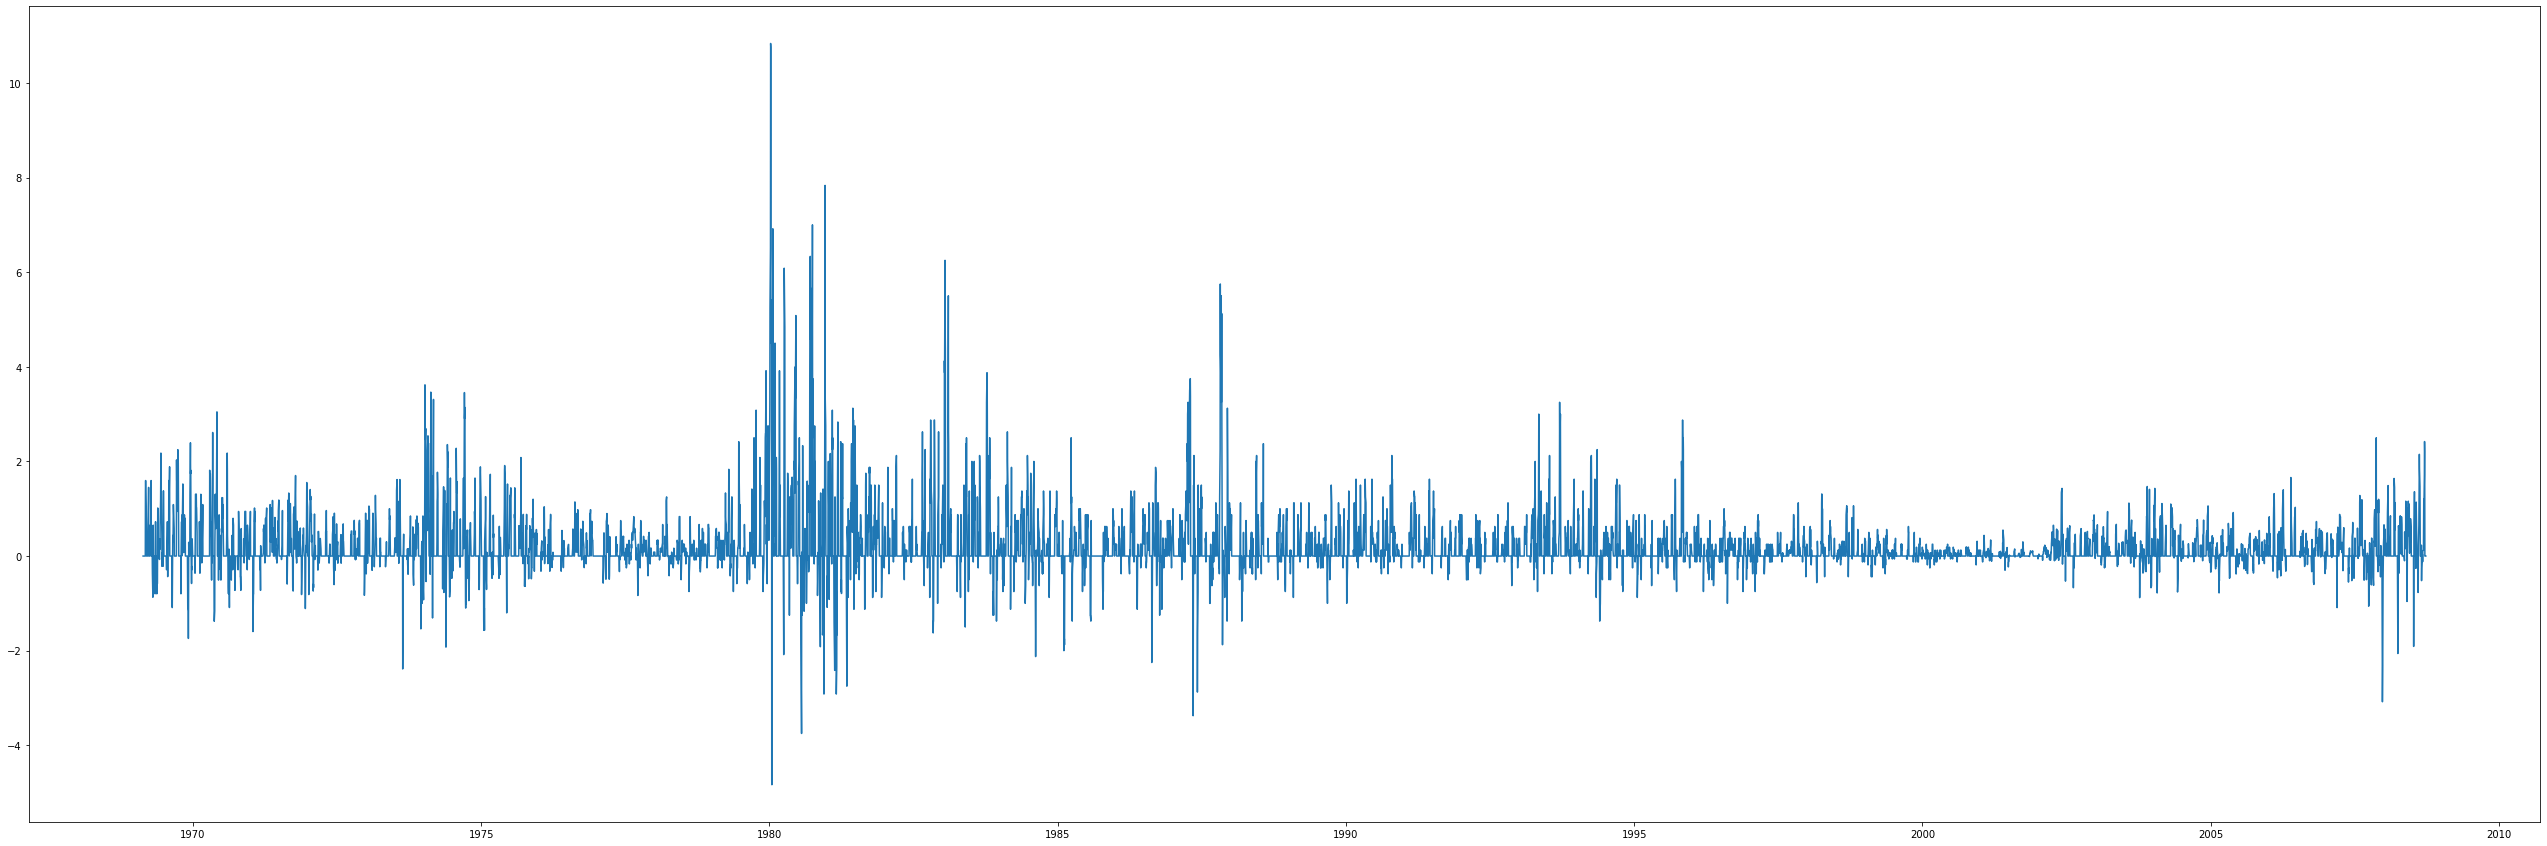

In [15]:
plt.figure(figsize=(45,15))

plt.plot(pnl_df['pnl'])

plt.show()

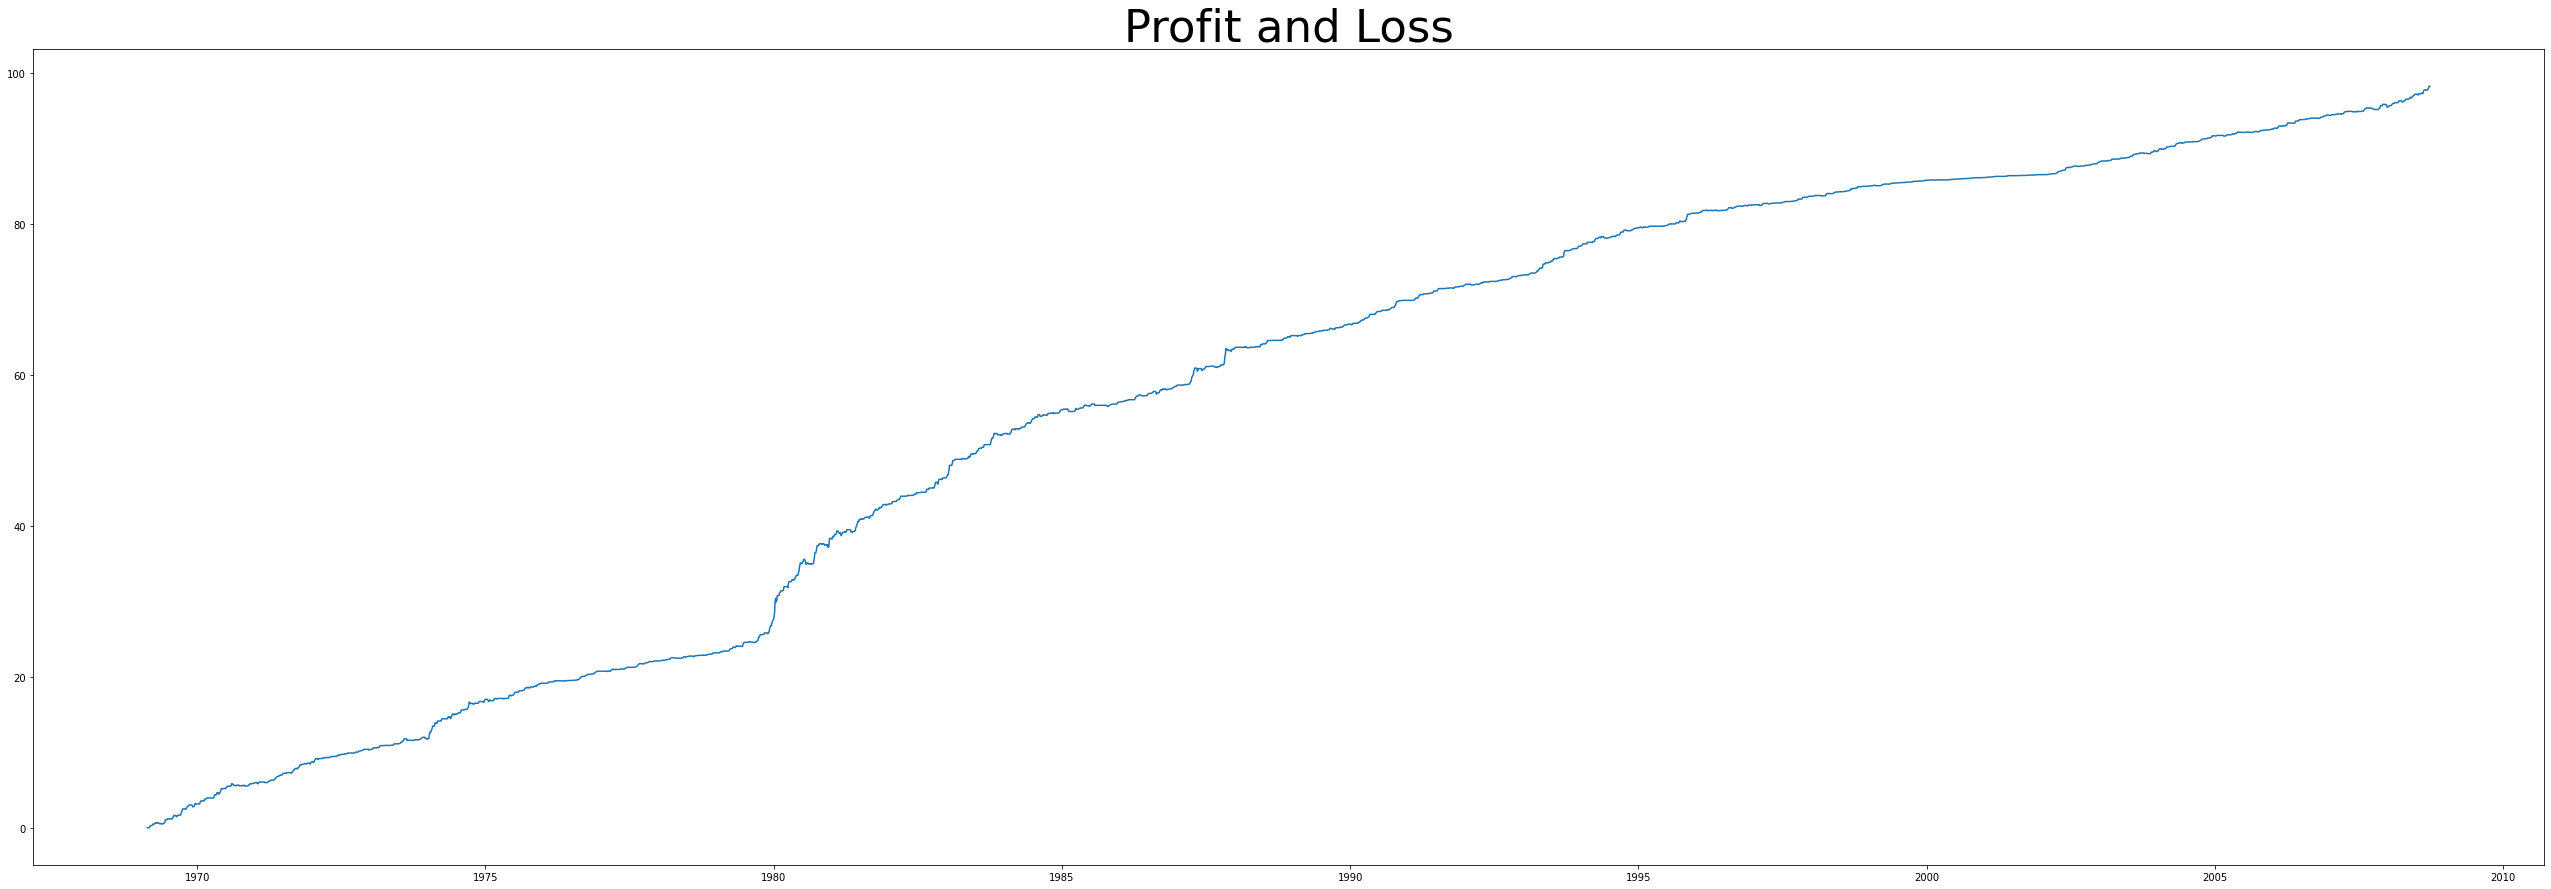

In [16]:
# Cumulative PnL
cumulative_pnl=pnl_df['pnl'].cumsum()/forecast_df['close'][0]

plt.figure(figsize=(45,15))

plt.title('Profit and Loss',fontsize=45)
plt.plot(cumulative_pnl)
plt.show()

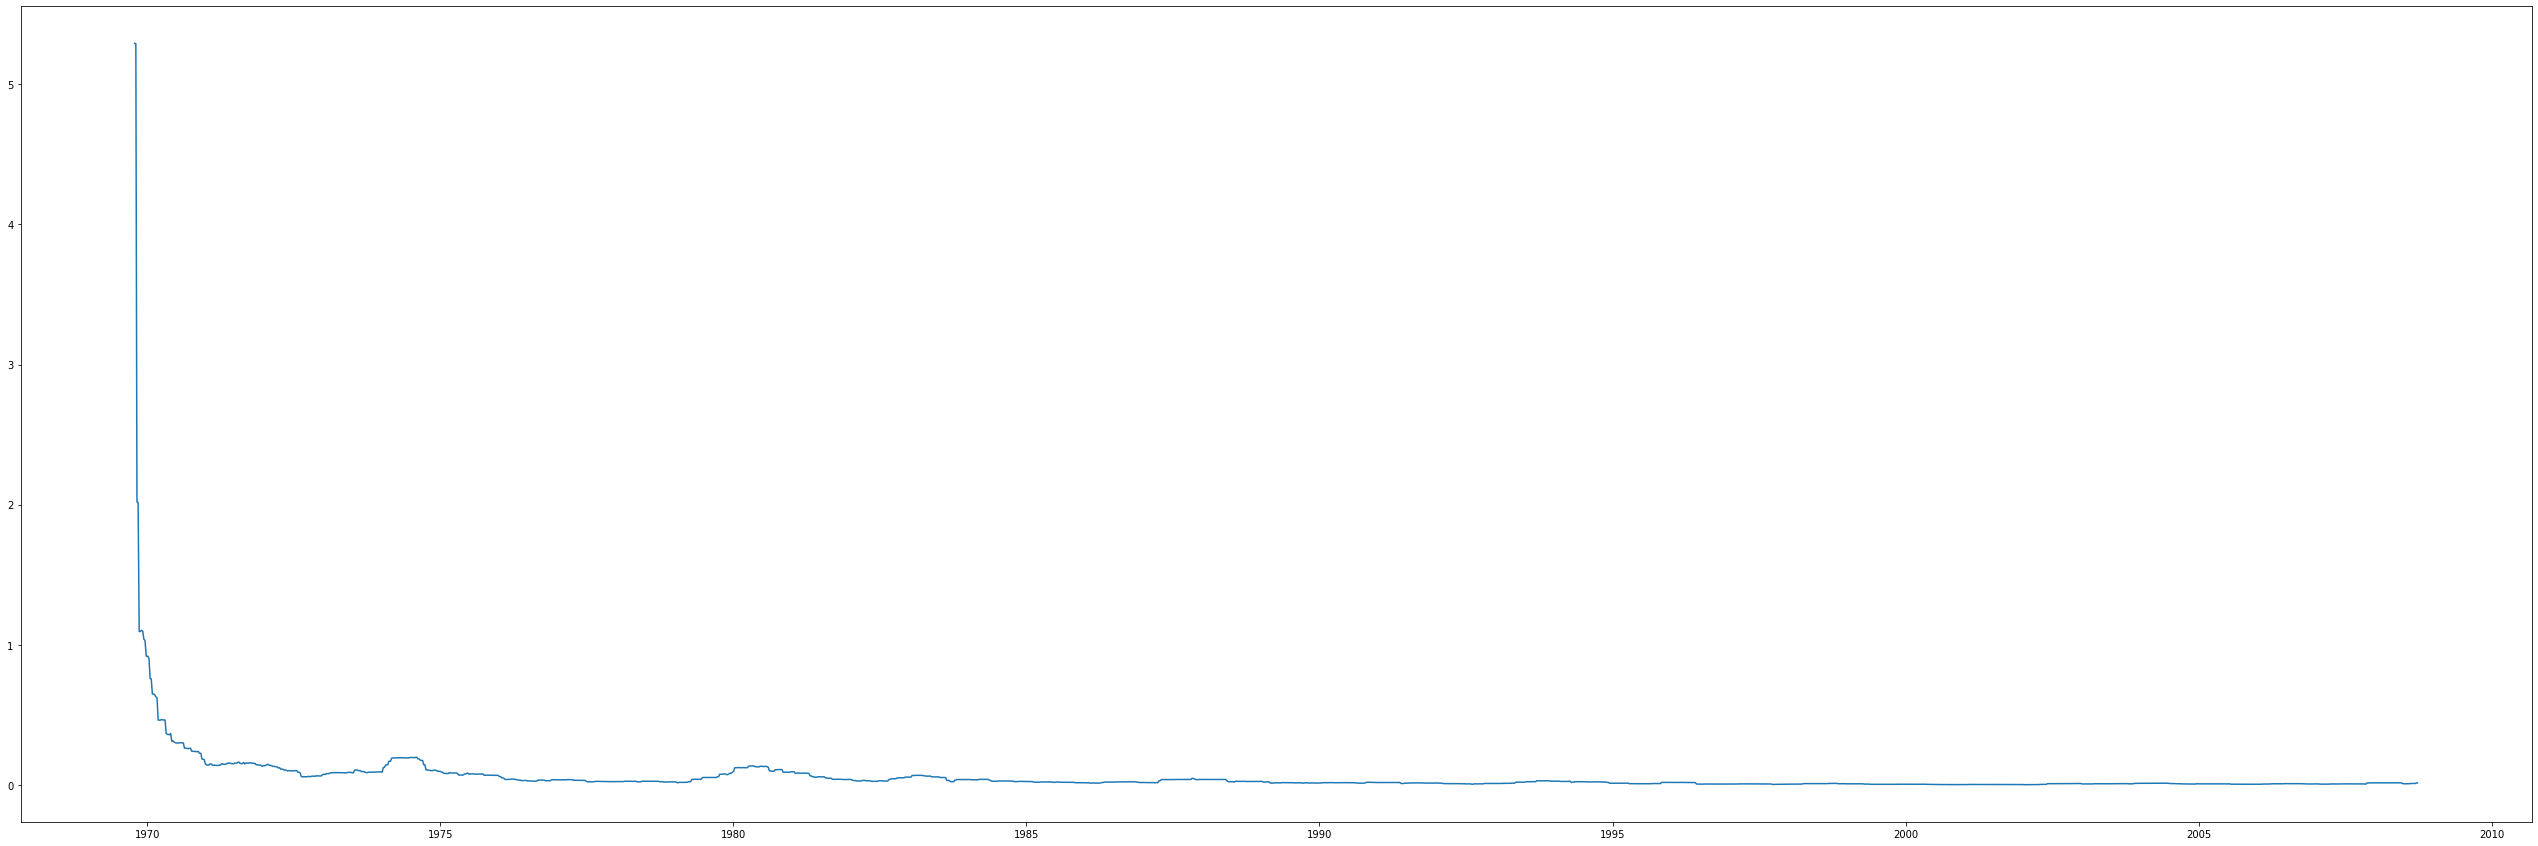

In [17]:
plt.figure(figsize=(45,15))
plt.plot(volatility)
plt.show()

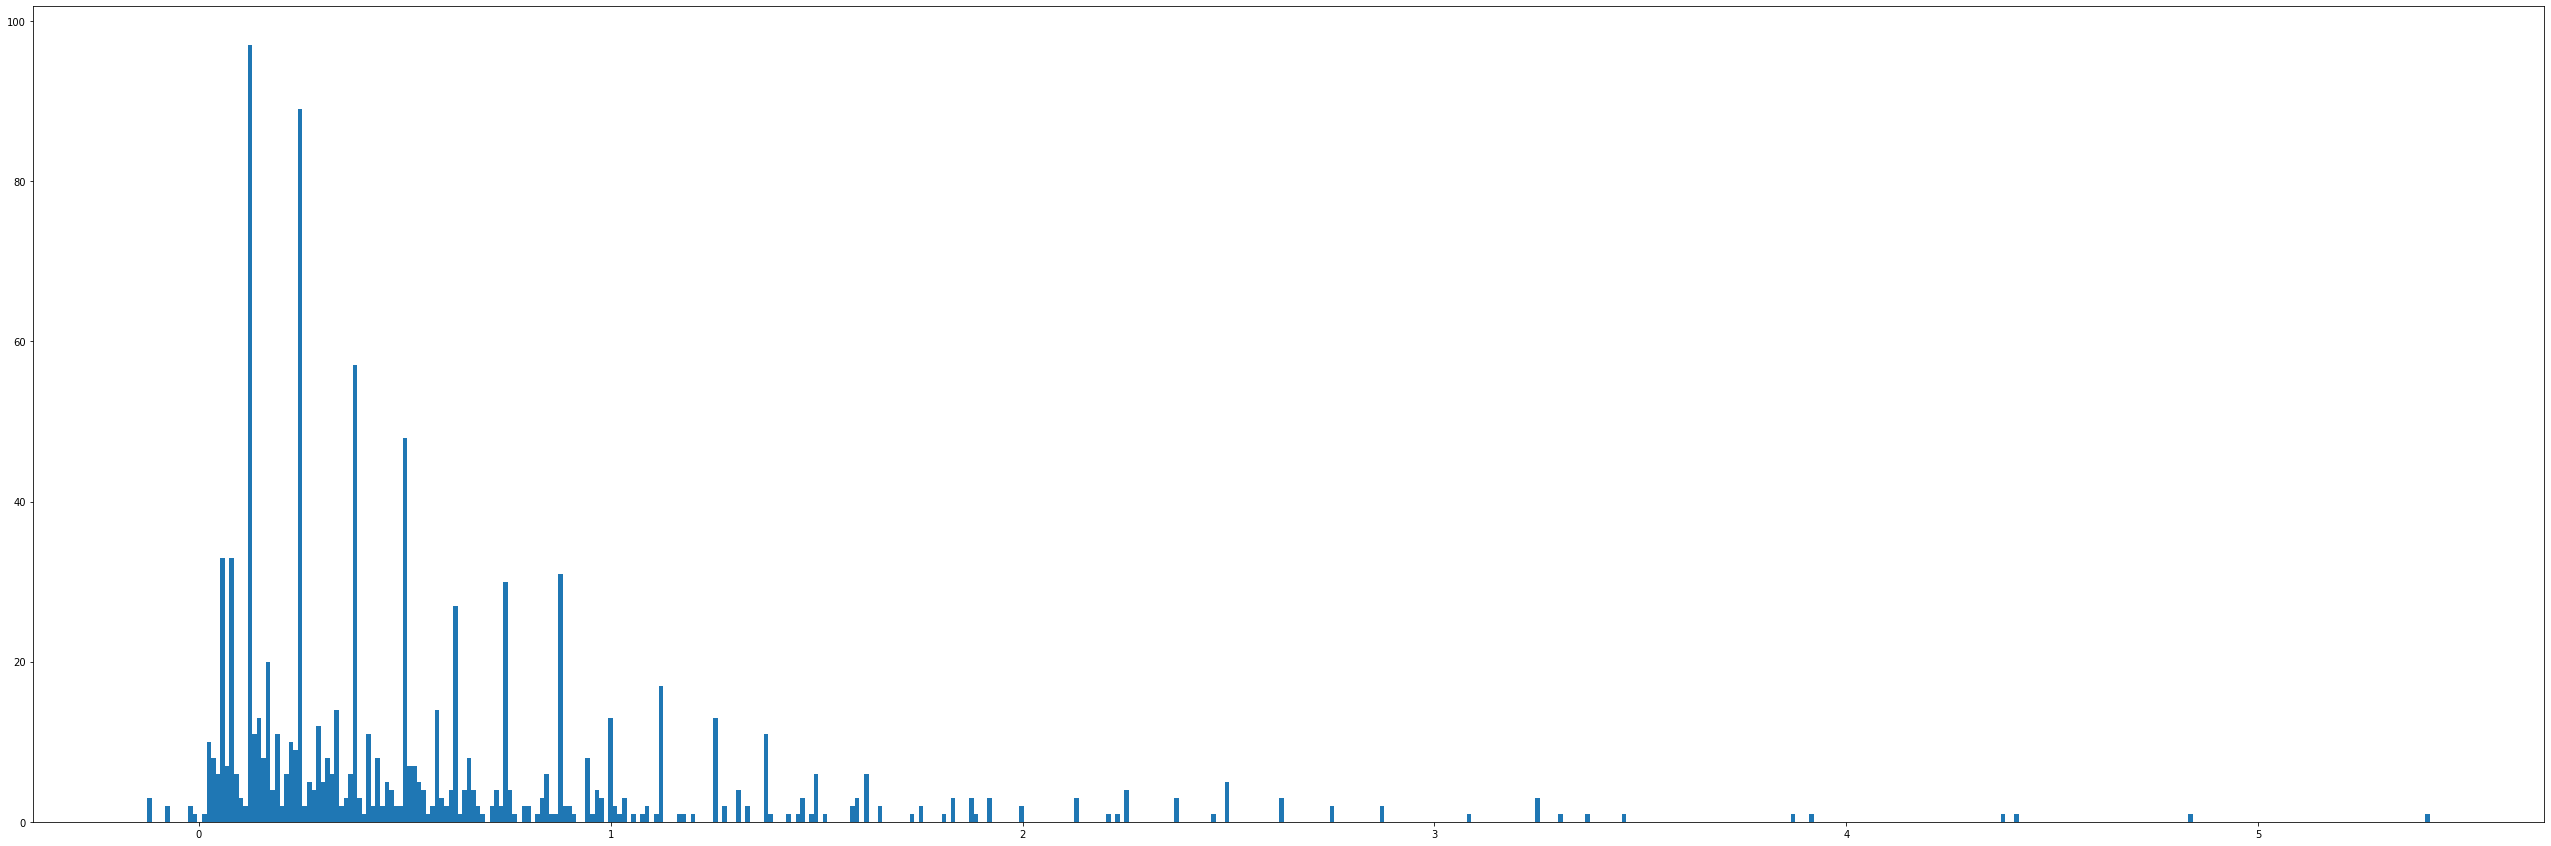

In [18]:
plt.figure(figsize=(45,15))

plt.hist(positions['pnl'][positions['pnl'] != 0],bins=500)

plt.show()

# Compare MA, predictions & actual price

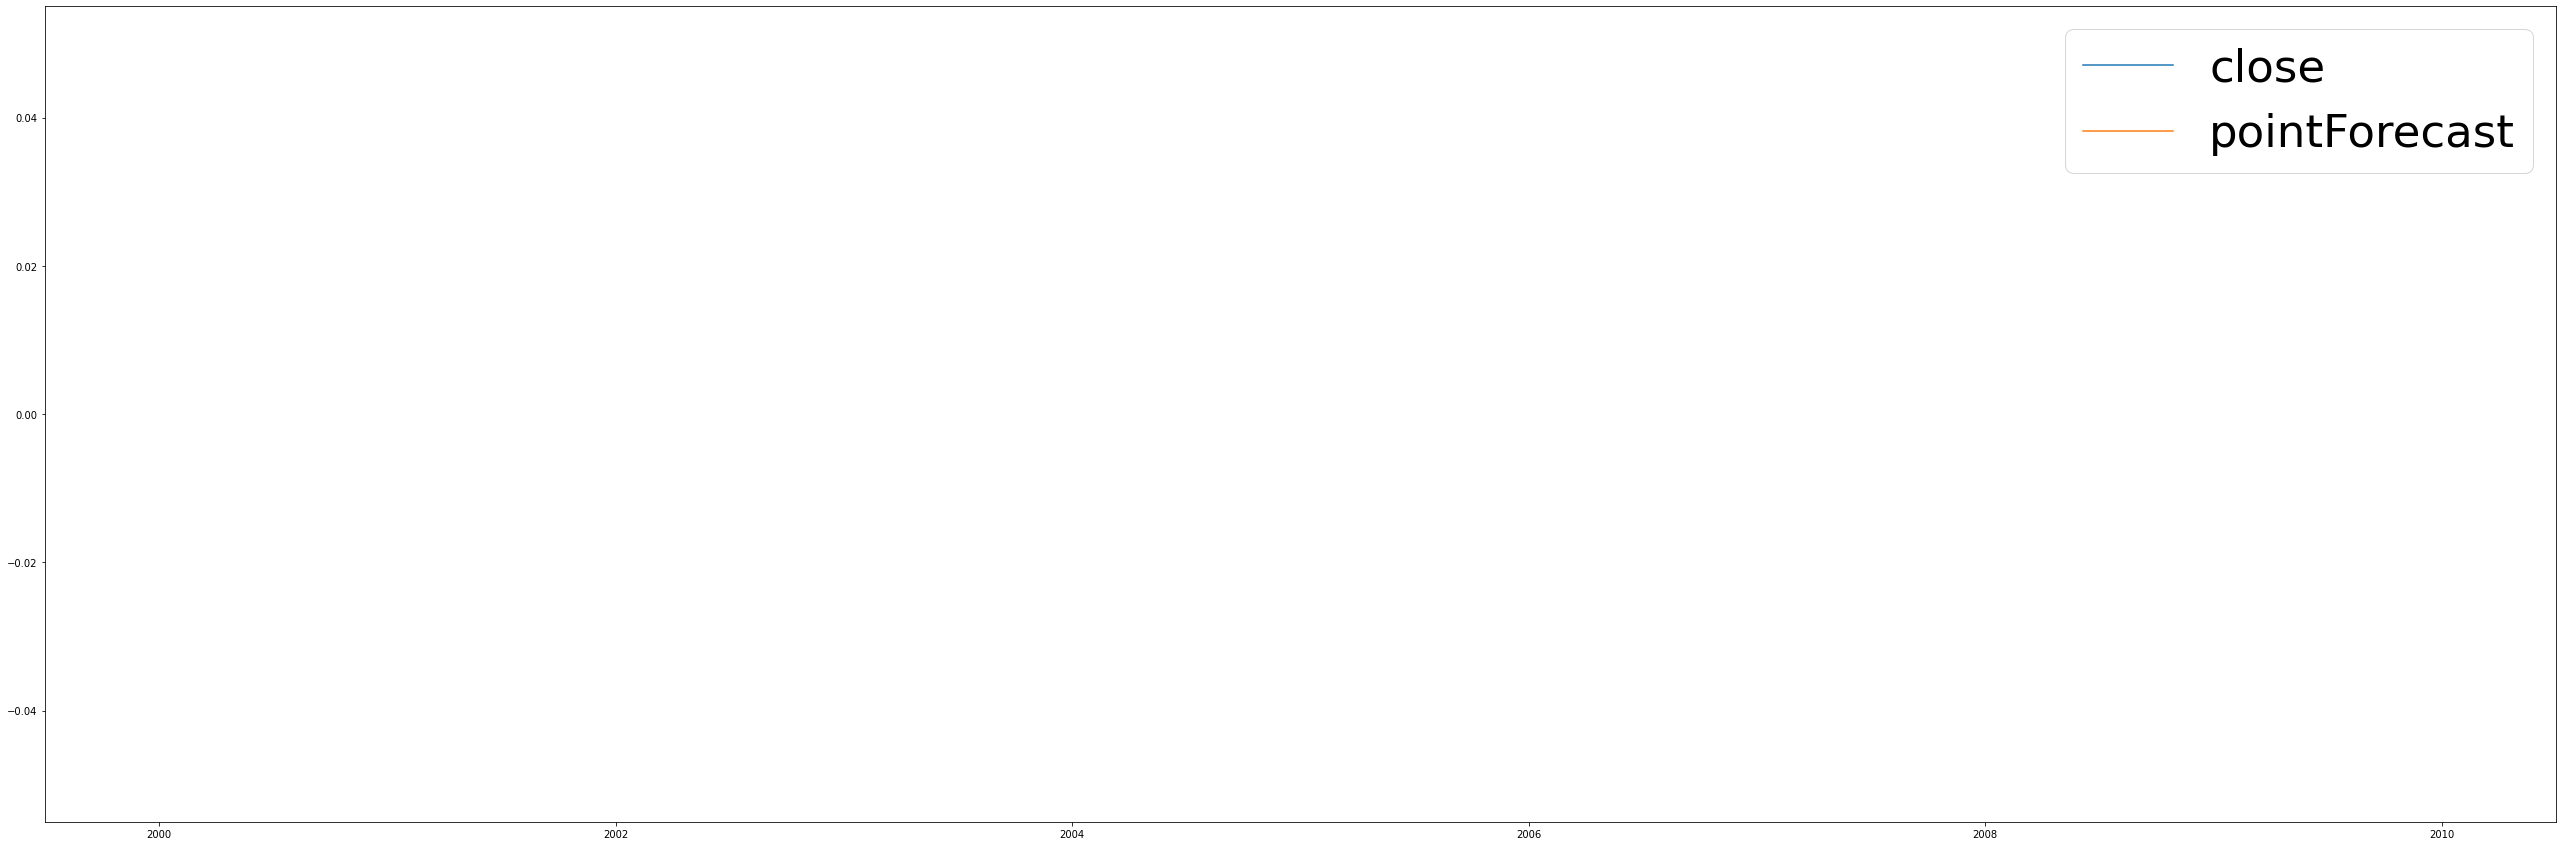

In [19]:
plt.figure(figsize=(45,15))

plt.plot(forecast_df['close'][10000:12000])
plt.plot(forecast_df['pointForecast'][10000:12000])
plt.plot(forecast_df['MA_50'][10000:12000])

plt.legend(['close','pointForecast'],fontsize=45)

plt.savefig(r'pnl.jpg')

plt.show()

# Trade Analytics

In [20]:
# print("No. Trades:   ",len(positions['pnl']))
# print("relative Pnl: ", relativepnl(positions['pnl']))
# print("Hit Rate:     ", hitrate(positions['pnl']))
# print("Minimum:      ",np.min(positions['pnl']))
# print("Maximum:      ",np.max(positions['pnl']))
# print("Mean:         ",np.mean(positions['pnl']))
# print("Variance:     ",np.var(positions['pnl']))
# print("Std. Dev:     ",np.sqrt(np.var(positions['pnl'])))
# print("Skew:         ",skew(positions['pnl']))
# print("Kurtosis:     ",kurtosis(positions['pnl']))

# Metadata

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [23]:
metadata = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\metadata_HECLA_(1, 1)_True_5.csv')

In [24]:
metadata.head()

,Unnamed: 0,asofdate,aic,bic,hqic,mae,mse,forecastHorizon,diff,trainDFLength,num_models,order_p,order_q,time,product_name,ar.L1.close,ma.L1.close
0,0,1969-02-07 14:30:00+00:00,-799.101119,-784.983403,-793.420443,0.020352,0.002380,5,True,252,10000,1,1,0 days 00:00:00.214980,HECLA,0.632045,0.616511
1,1,1969-02-17 14:30:00+00:00,-795.281383,-781.163667,-789.600706,0.020859,0.002416,5,True,252,10000,1,1,0 days 00:00:00.334472,HECLA,0.556637,0.540830
2,2,1969-02-25 14:30:00+00:00,-794.030229,-779.912513,-788.349553,0.021133,0.002428,5,True,252,10000,1,1,0 days 00:00:00.162298,HECLA,0.532123,0.516131
3,3,1969-03-04 14:30:00+00:00,-793.912169,-779.794452,-788.231492,0.021196,0.002429,5,True,252,10000,1,1,0 days 00:00:00.145217,HECLA,0.533725,0.517581
4,4,1969-03-11 14:30:00+00:00,-793.389628,-779.271911,-787.708951,0.021341,0.002434,5,True,252,10000,1,1,0 days 00:00:00.141670,HECLA,0.534988,0.518594


In [25]:
# metadata.mean(axis=0).to_csv(f"""{metadata['product_name'][0]}_arma_({metadata['order_p'][0]},{metadata['order_q'][0]}).csv""")


In [26]:
metadata.var(axis=0)

Unnamed: 0         333166.666667
aic                 24223.145123
bic                 24223.145123
hqic                24223.145123
mae                     0.000073
mse                     0.000001
forecastHorizon         0.000000
diff                    0.000000
trainDFLength           0.000000
num_models              0.000000
order_p                 0.000000
order_q                 0.000000
ar.L1.close             0.297161
ma.L1.close             0.301105
dtype: float64

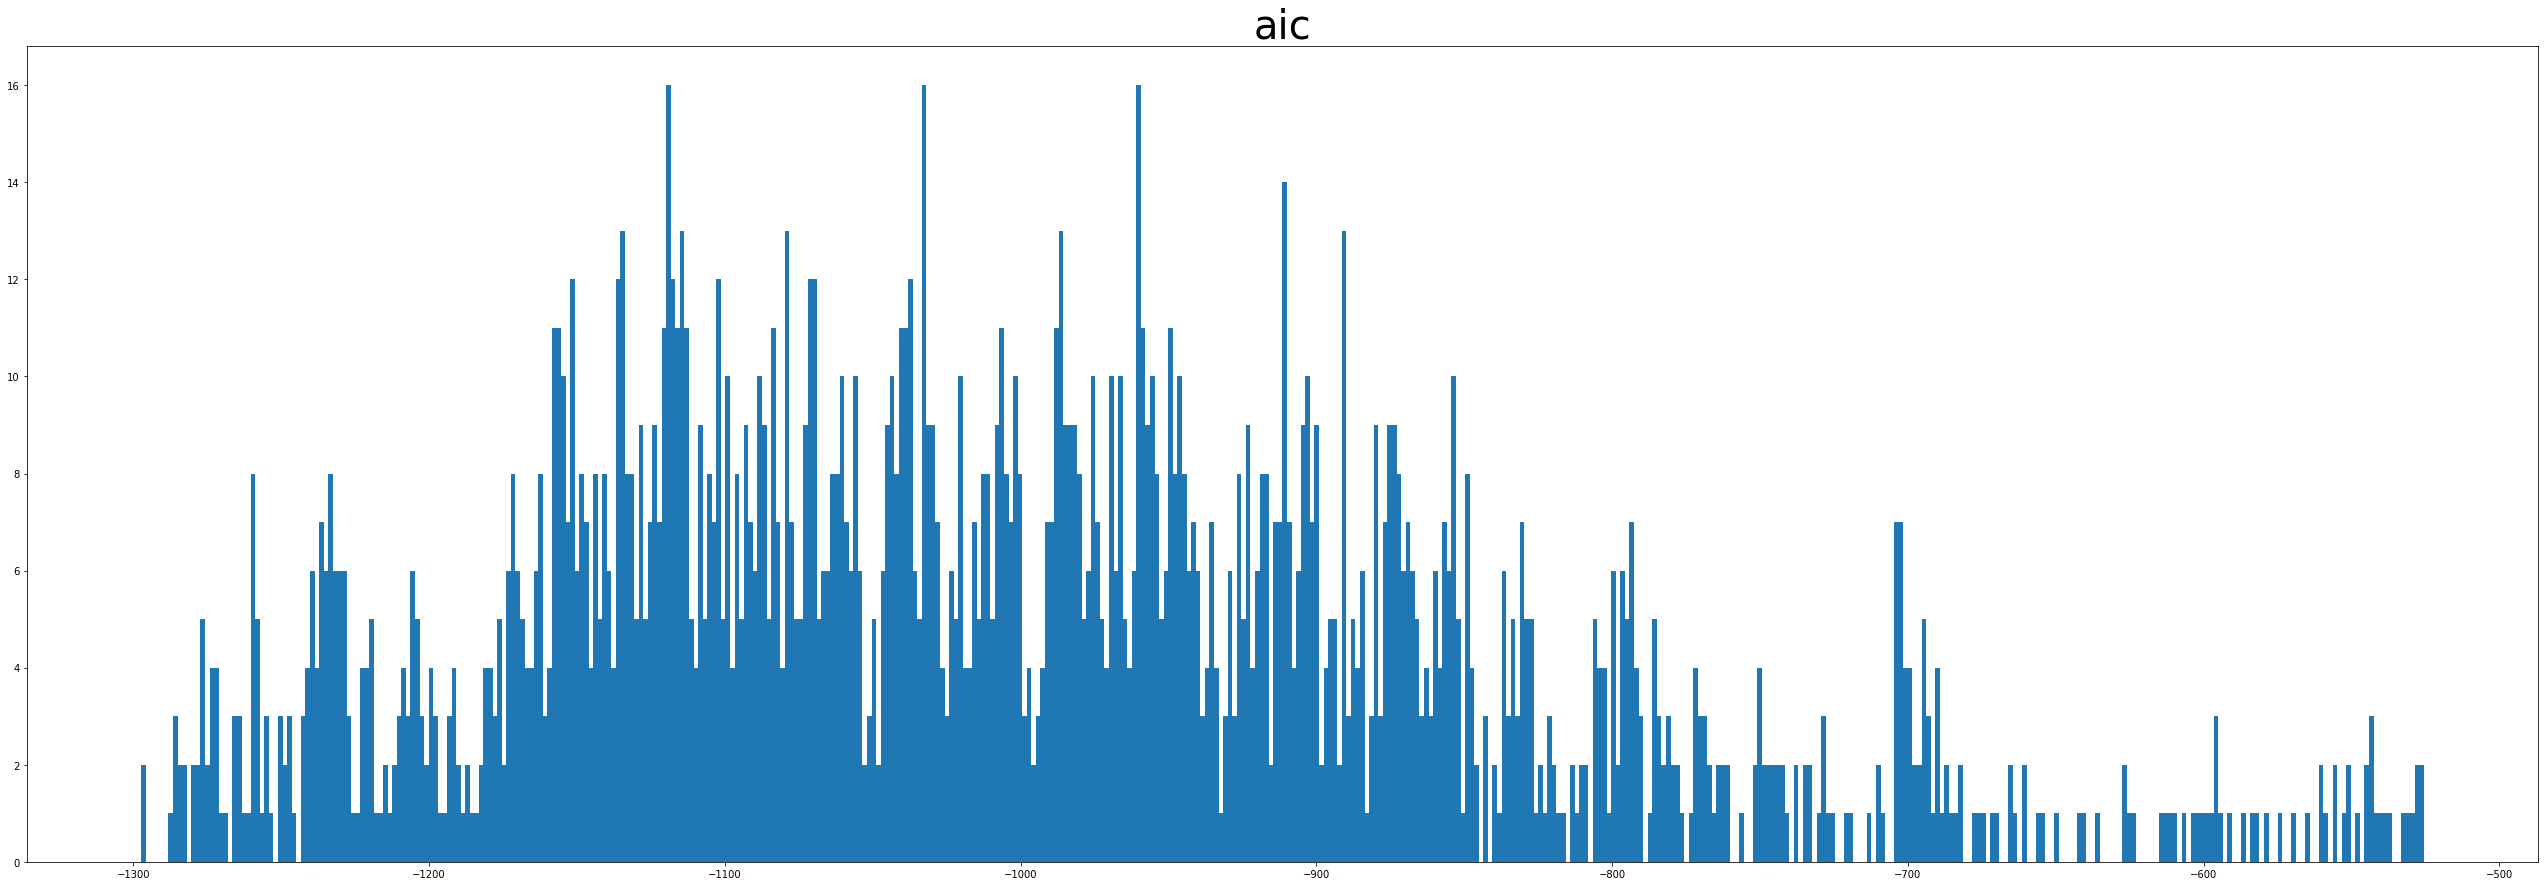

In [27]:
plt.figure(figsize=(45,15))

plt.title('aic',fontsize=40)

plt.hist(metadata['aic'],bins=500)

plt.show()

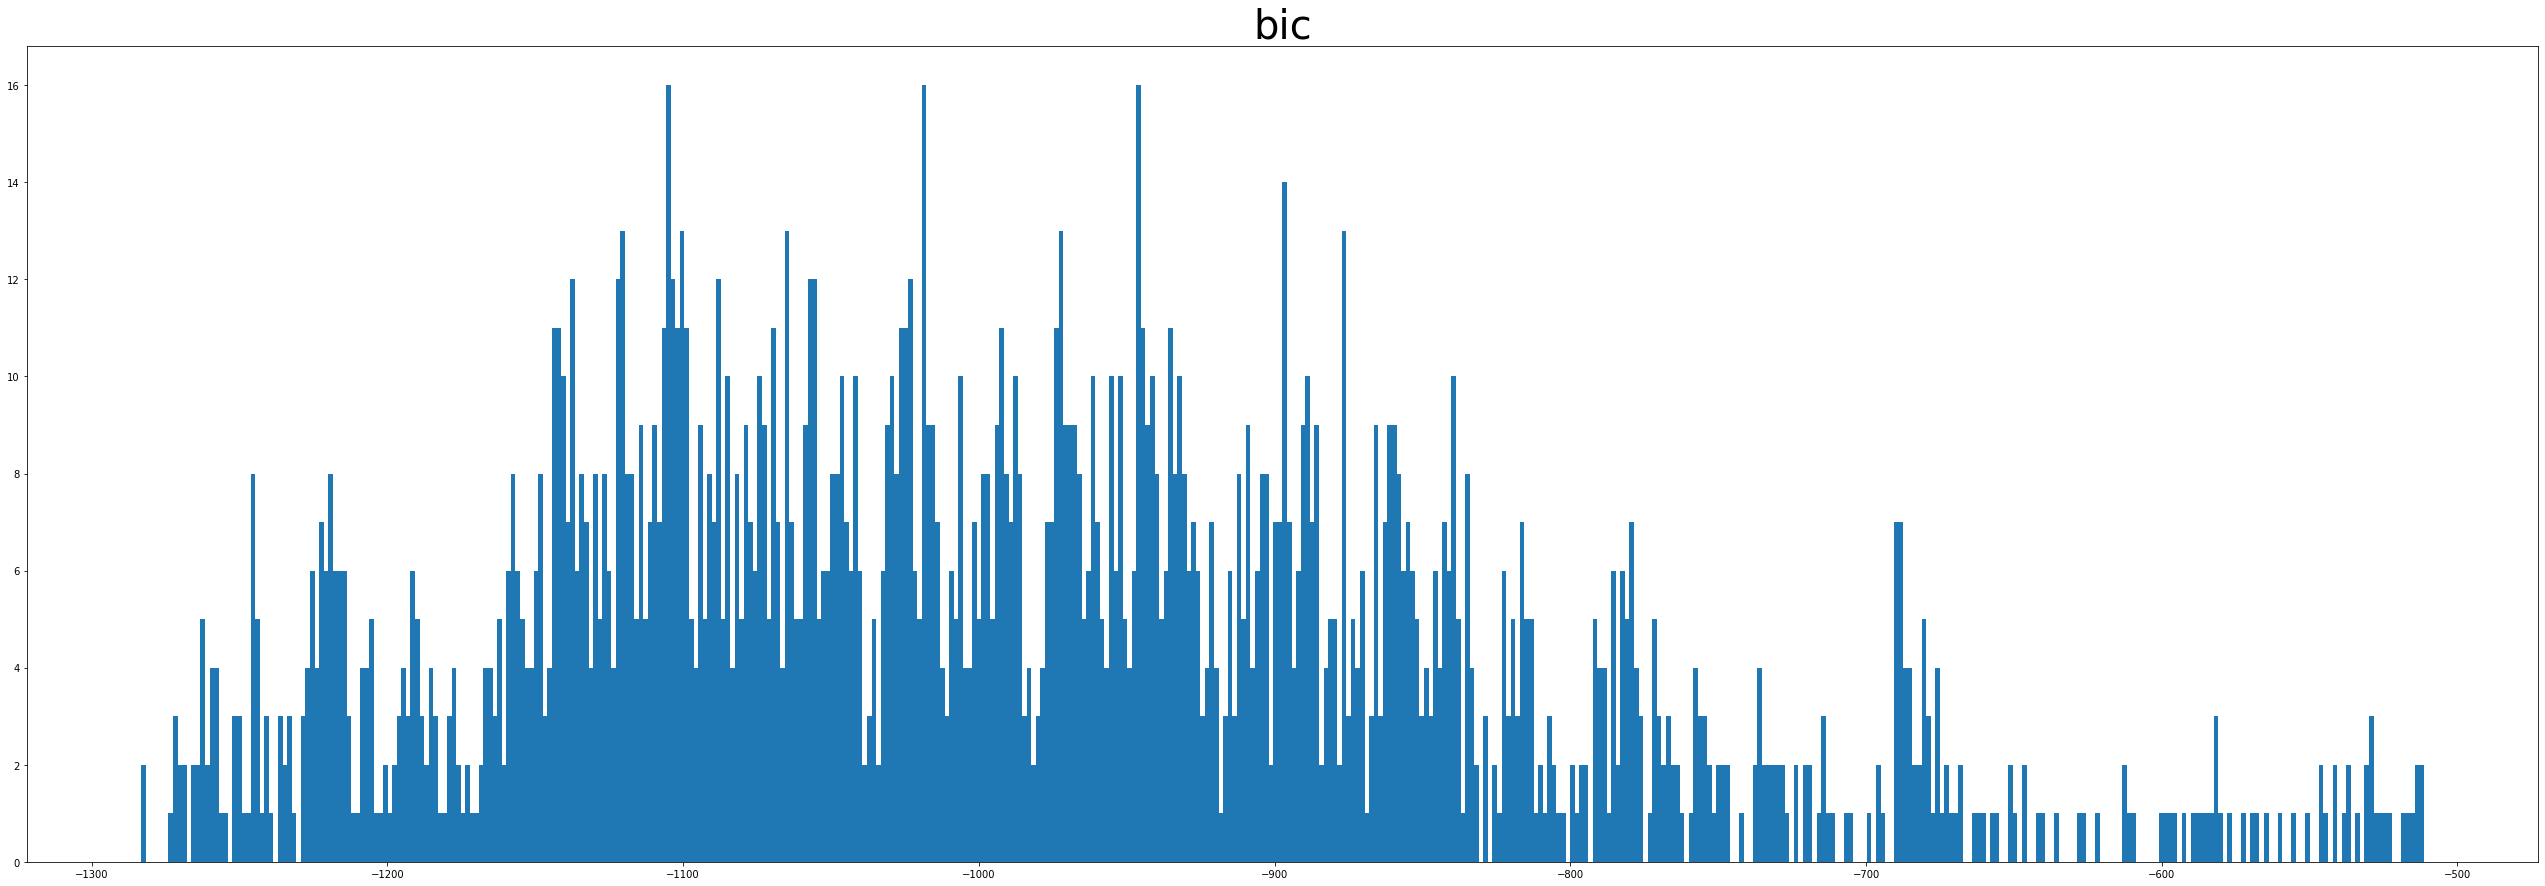

In [28]:
plt.figure(figsize=(45,15))

plt.title('bic',fontsize=40)

plt.hist(metadata['bic'],bins=500)

plt.show()

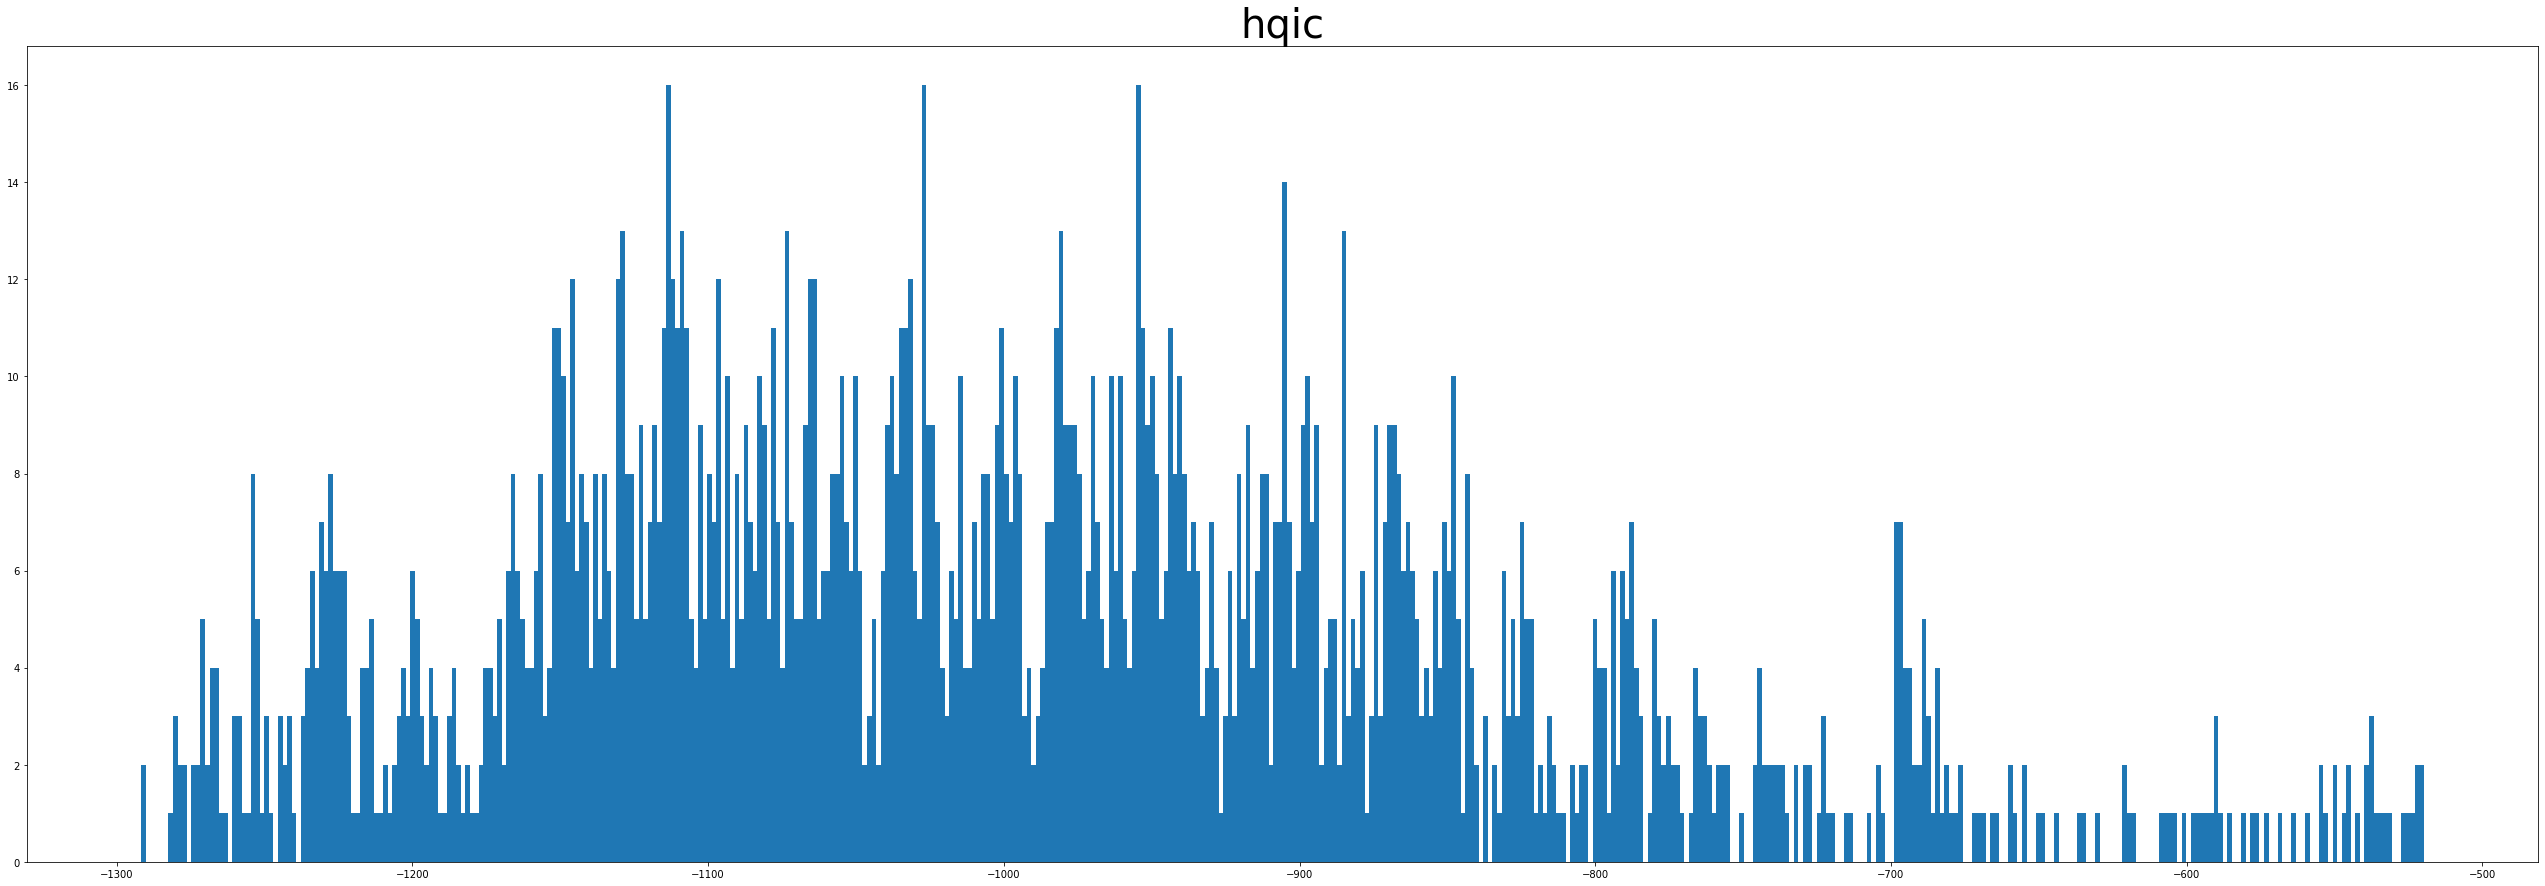

In [29]:
plt.figure(figsize=(45,15))

plt.title('hqic',fontsize=40)

plt.hist(metadata['hqic'],bins=500)

plt.show()

In [30]:
metadata.columns

Index(['Unnamed: 0', 'asofdate', 'aic', 'bic', 'hqic', 'mae', 'mse',
       'forecastHorizon', 'diff', 'trainDFLength', 'num_models', 'order_p',
       'order_q', 'time', 'product_name', 'ar.L1.close', 'ma.L1.close'],
      dtype='object')

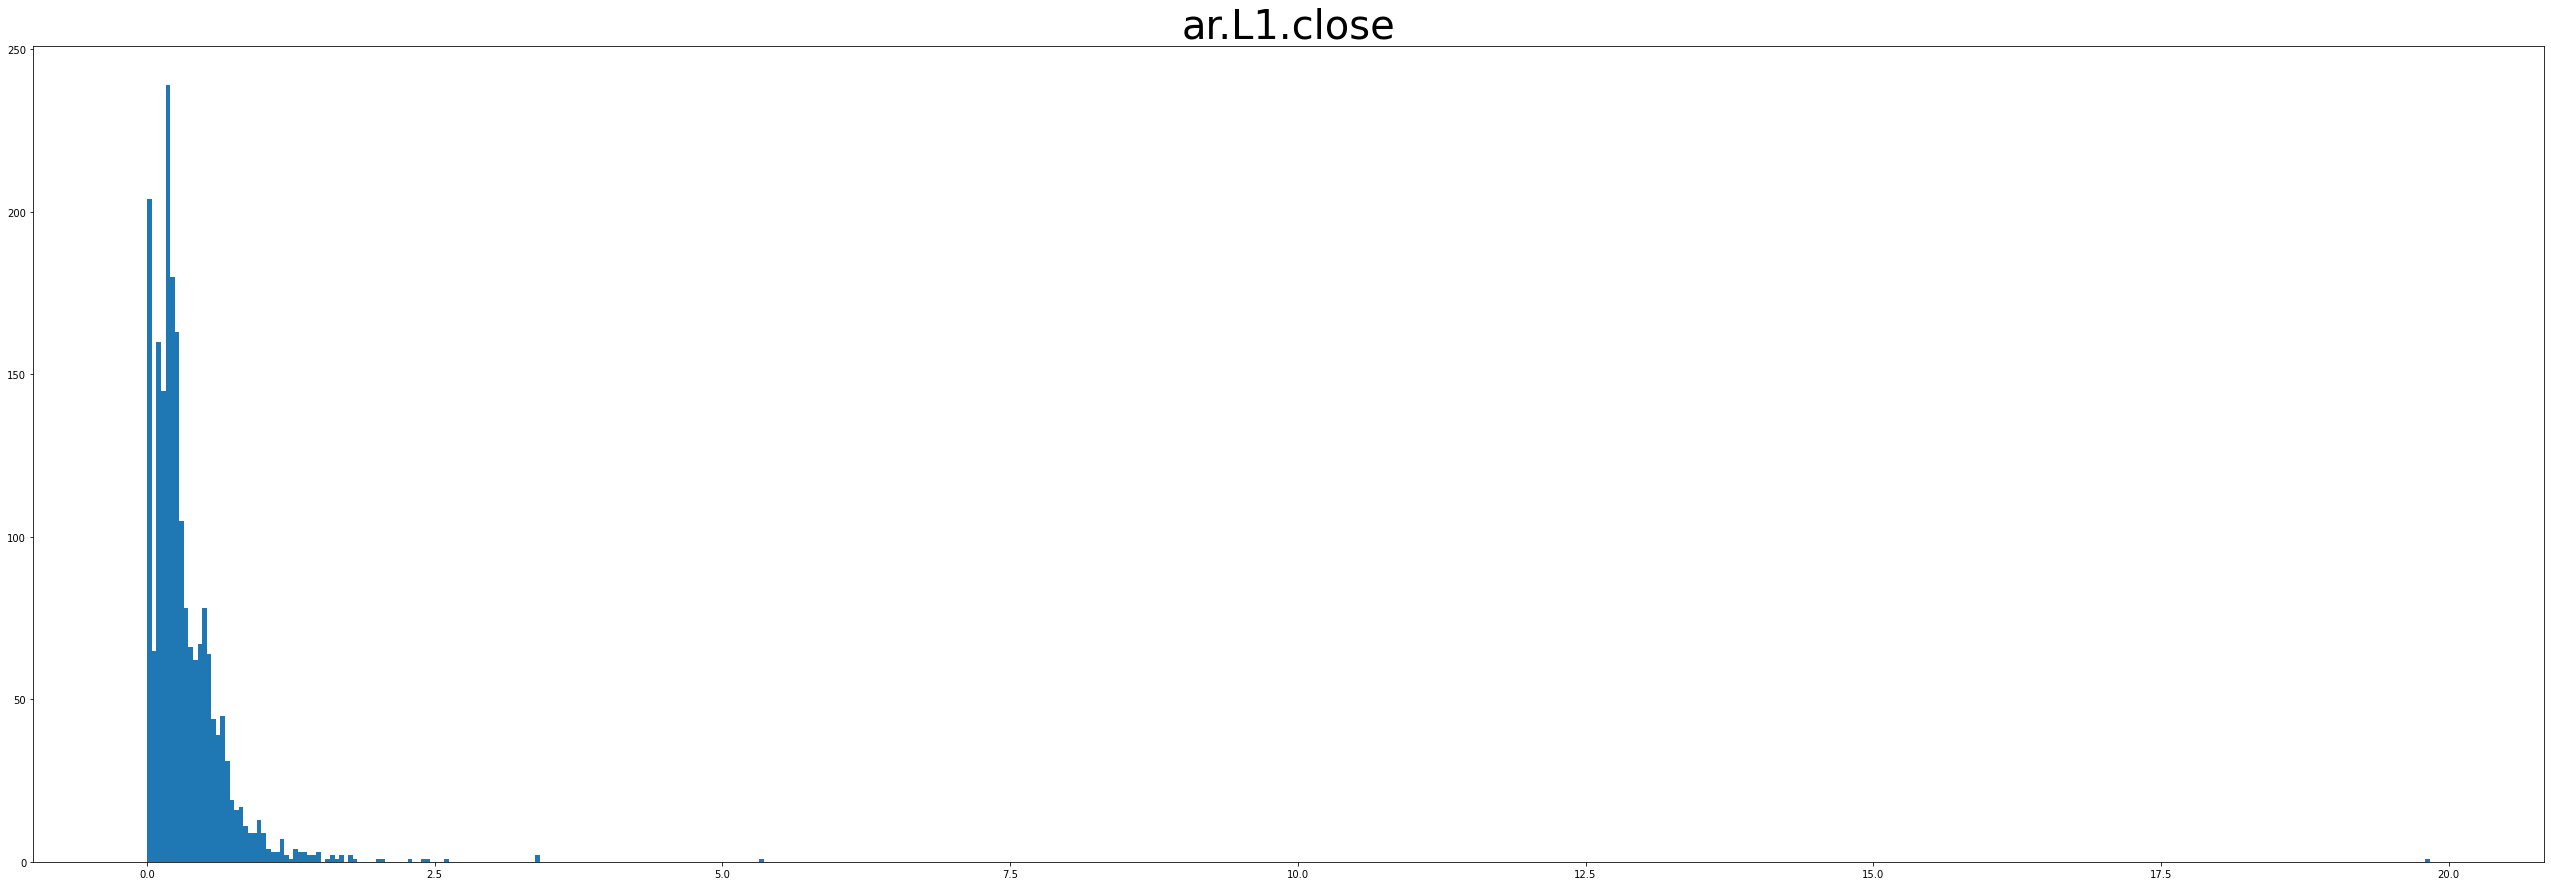

In [31]:
for i in range(1,metadata['order_p'][0]+1):

    plt.figure(figsize=(45,15))

    plt.title(f'ar.L{i}.close',fontsize=40)
    plt.hist(metadata[f'ar.L{i}.close'],bins=500)

    plt.show()

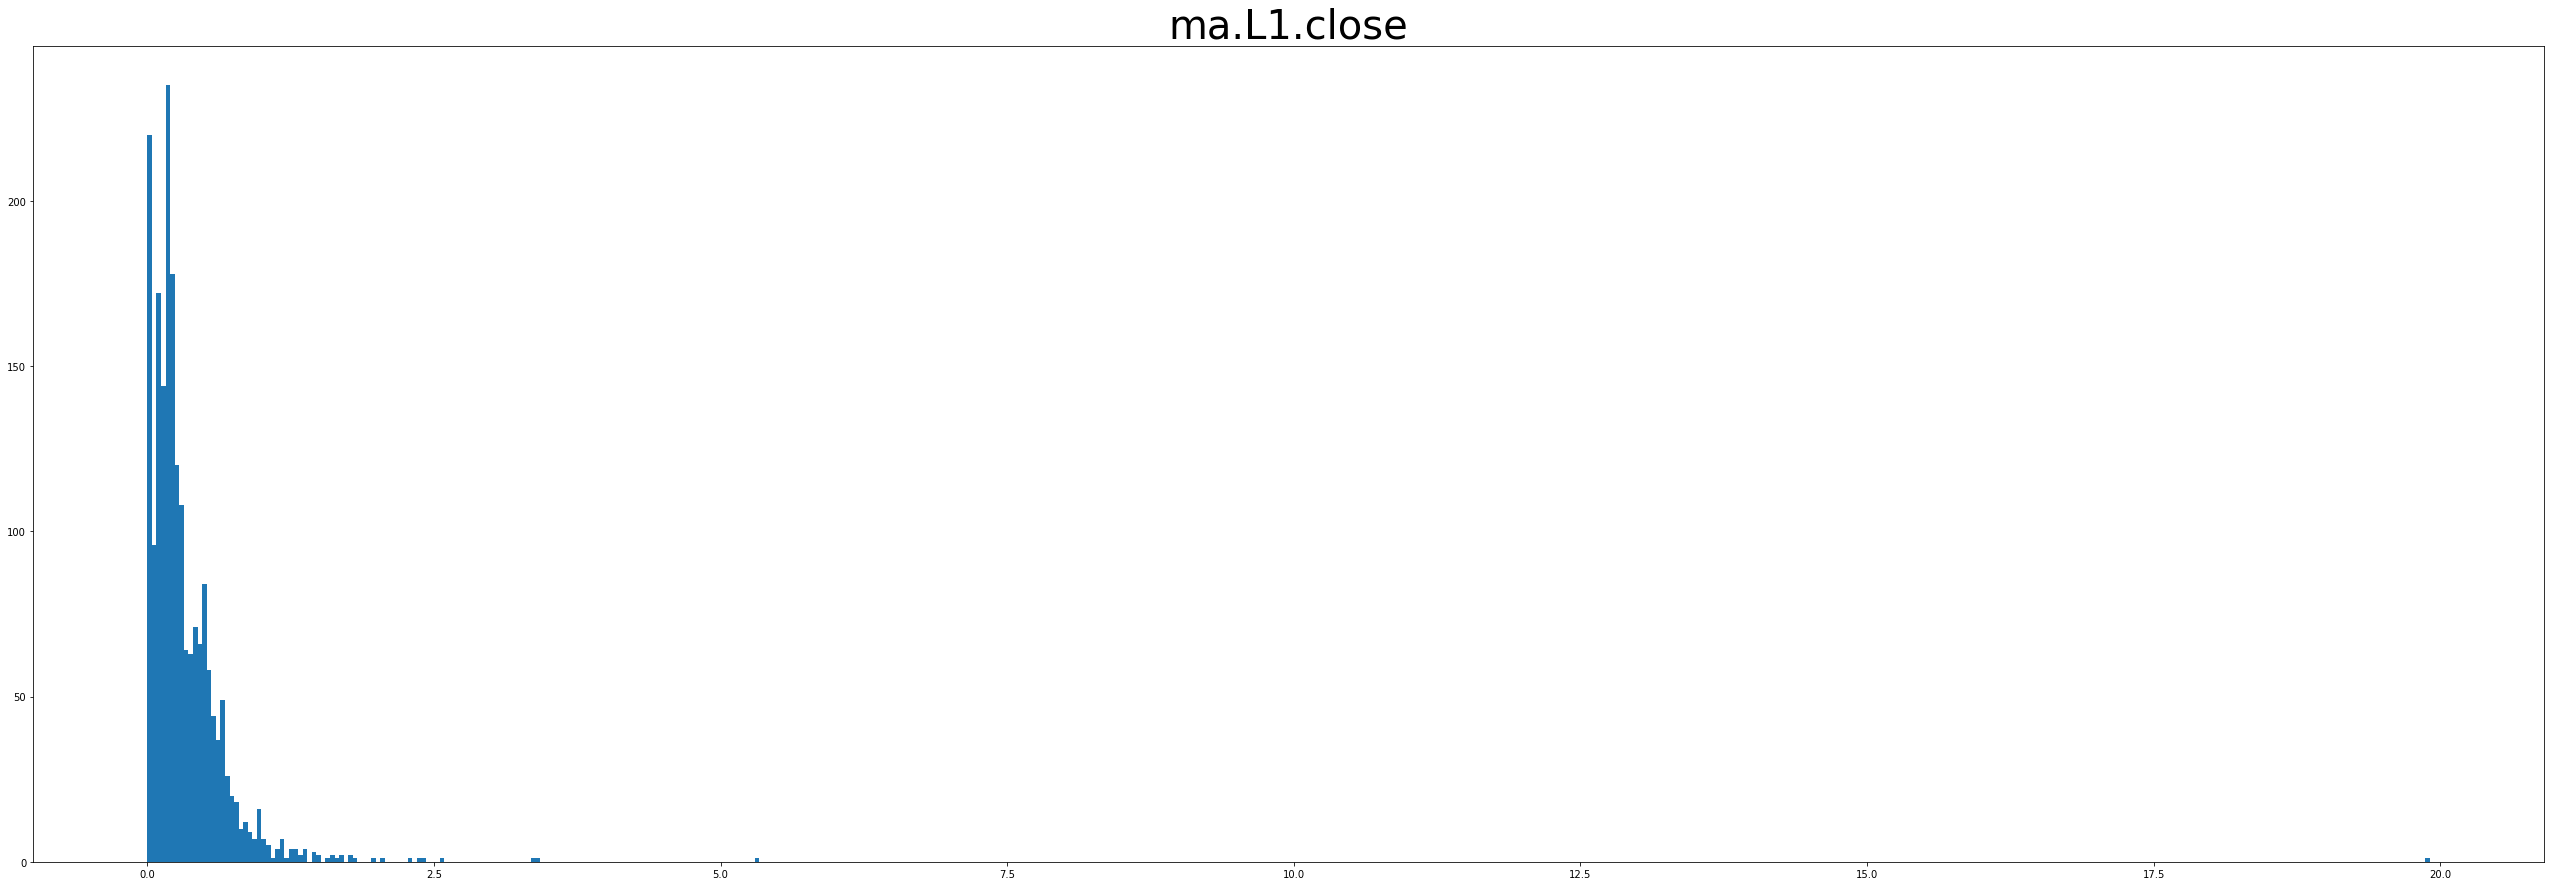

In [32]:
for i in range(1,metadata['order_q'][0]+1):

    plt.figure(figsize=(45,15))

    plt.title(f'ma.L{i}.close',fontsize=40)
    plt.hist(metadata[f'ma.L{i}.close'],bins=500)

    plt.show()

# Forecast Analysis

In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [34]:
def breakdown_forecast_error(forecast_dataframe):
    
    cacheForecastDayError = {

        'forecastday':[],
        'forecasterror':[],
    }

    for l in forecast_dataframe['forecastday'].unique():
        cacheForecastDayError['forecastday'].append(l)
        cacheForecastDayError['forecasterror'].append((forecast_dataframe[forecast_dataframe['forecastday'] == l]['pointForecast']\
                                                     - forecast_dataframe[forecast_dataframe['forecastday'] == l]['close']).mean())

    return pd.DataFrame(cacheForecastDayError).set_index('forecastday')

In [36]:
forecast_error = breakdown_forecast_error(forecast_df)
forecast_error.head()

,forecasterror
forecastday,
1,0.015398
2,0.014994
3,0.009621
4,0.010051
5,0.010302


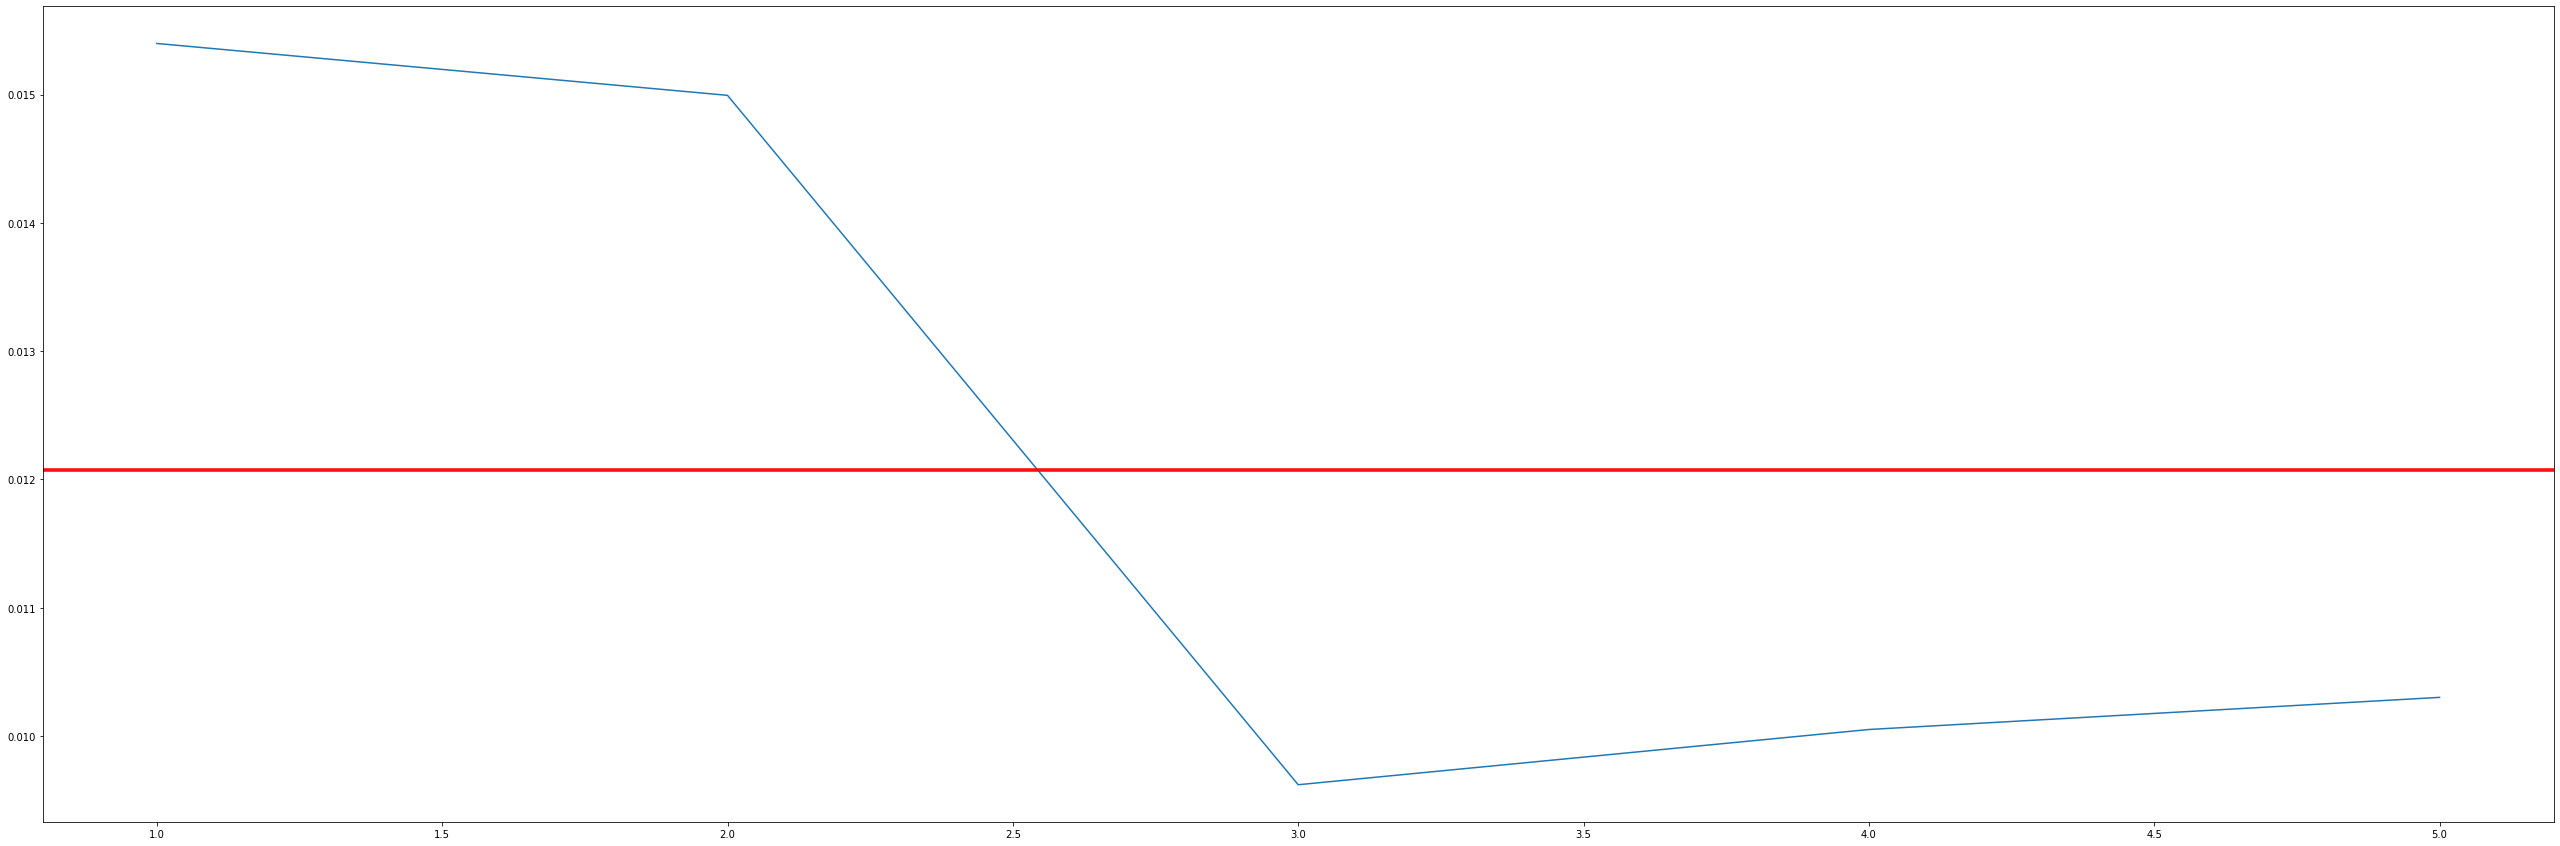

In [37]:
plt.figure(figsize=(45,15))

plt.plot(forecast_error['forecasterror'])

plt.axhline(np.mean(forecast_error['forecasterror']),color = 'red')
plt.axhline(np.mean(forecast_error['forecasterror'])+np.var(forecast_error['forecasterror']),color = 'red')
plt.axhline(np.mean(forecast_error['forecasterror'])-np.var(forecast_error['forecasterror']),color = 'red')

plt.show()